---

# 2023년 데이터분석 경진대회

### ▣ 소속 회사 : JB우리캐피탈

### ▣ 조명 : JB사냥개들

### ▣ 팀원 : 허준 주임, 이창석 주임, 문수진 사원

---

# 목차 

### [1. 데이터 파악](#s-1) 
+ [1.1 데이터 및 패키지 불러오기](#s-1.1)    
+ [1.2 데이터 컬럼 정보](#s-1.2)   
+ [1.3 데이터 결측값 및 이상값 확인](#s-1.3)     
+ [1.4 결측치 표현 통일](#s-1.4)     
+ [1.5 결측치 간 패턴 등 연관성 파악](#s-1.5)   
+ [1.6 결측치 대체 알고리즘 후보 설명 - 단순통계량, ML (KNN, MICE), DL](#s-1.6)    
+ [1.7 결측치 대체(추정통계량대체)](#s-1.7)
+ [1.8 결측치 대체(ML) :KNN, MICE ](#s-1.8)
+ [1.9 결측치 대체(DL)](#s-1.9)
+ [1.10 각 결측 데이터간 비교 - AUC 기준 성능 평가](#s-1.10)


### [2. 데이터 시각화 EDA](#s-2) 
+ [2.1 시각화 전단계 : 컬럼별 유형 탐색](#s-2.1)  
+ [2.2 타겟변수 파악](#s-2.2)  
+ [2.3 연체여부별 범주형 변수 분포 파악](#s-2.3)  
+ [2.4 다범주 변수(ORGANIZATION TYPE)의 연체율 현황 파악](#s-2.4)  
+ [2.5 연체여부별 수치형 변수 분포 파악](#s-2.5)  
+ [2.6 근로 유형을 유추할 수 있는 변수들간 연관성 파악](#s-2.6)  
    + [2.6,1 -Grouped_ORGANIZATION_TYPE(파생변수)와  NAME_INCOME_TYPE(소득 유형)간 연관성 파악](#s-2.6.1)  
    + [2.6.2 -Grouped_ORGANIZATION_TYPE(파생변수)과 AMT_INCOME_TOTAL(소득금액) 연관성 파악](#s-2.6.2)  
+ [2.7 근로 유형 X 자산 수준을 조합해 연체율과 연관성 파악](#s-2.7)  
+ [2.8 대출요일 X 대출신청시간대 조합해 연체율과 연관성 파악](#s-2.8)  
+ [2.9 거주지표준화('REGION_POPULATION_RELATIVE') 변수 EDA](#s-2.9)  
+ [2.10 거주지표준화 변수와 거주지등급간 연관성 EDA](#s-2.10)  
+ [2.11 이상치 탐색 EDA](#s-2.11)  
+ [2.12 변수간 상관관계 파악을 통한 파생변수 Insight 얻기](#s-2.12)  

### [3. Feature Enginnering](#s-3)
+ [3.1 파생변수 설명](#s-3.1)  
+ [3.2 파생변수 생성 함수](#s-3.2)

### [4. Modeling](#s-4)
+ [4.0 최종 데이터 load](#s-4.0)  
+ [4.1 후보 알고리즘 설명 - DNN, LightGBM, GB, XGB, RF](#s-4.1)  
+ [4.2 DNN 딥러닝 방식](#s-4.2)  
    + [4.2.1 DNN Tunning : Target 예측 최적화를 위한 모형 튜닝](#s-4.2.1)  
    + [4.2.2 딥러닝 모델 학습 ; loss](#s-4.2.2)  
    + [4.2.3 딥러닝 모델 학습 ; class 가중치 조정](#s-4.2.3)
+ [4.3 기본 ML 모형들에 대한 성능 평가](#s-4.3)  
    + [4.3.1 ML 알고리즘(LightGBM, GB, XGB, RF)에 대한 기본 성능 평가](#s-4.3.1)      
+ [4.4 LightGBM 방식](#s-4.4)  
    + [4.4.1 LightGBM Tunning : Random Search을 사용한 Best Parameter 탐색 ](#s-4.4.1)  
    + [4.4.2 LightGBM Tunning : Bayesian Optimization을 사용한 Best Parameter 탐색 ](#s-4.4.2)  
    + [4.4.3 최종 auc 확인](#s-4.4.3)
+ [4.5 Grandient Boosting(GB) 방식](#s-4.5)  
    + [4.5.1 GB Tunning : Random Search을 사용한 Best Parameter 탐색 ](#s-4.5.1)  
    + [4.5.2 GB Tunning : Bayesian Optimization을 사용한 Best Parameter 탐색](#s-4.5.2)  
    + [4.5.3 최종 auc 확인](#s-4.5.3)
+ [4.6 XG Boosing(XGB) 방식](#s-4.6)  
    + [4.6.1 XGB Tunning : Random Search을 사용한 Best Parameter 탐색 ](#s-4.6.1)  
    + [4.6.2 XGB Tunning : Bayesian Optimization을 사용한 Best Parameter 탐색 ](#s-4.6.2)  
    + [4.6.3 최종 auc 확인](#s-4.6.3)
+ [4.7 Random Forest(RF) 방식](#s-4.7)  
    + [4.7.1 RF Tunning : Random Search을 사용한 Best Parameter 탐색 ](#s-4.7.1)  
    + [4.7.2 RF Tunning : Bayesian Optimization을 사용한 Best Parameter 탐색](#s-4.7.2)  
    + [4.7.3 최종 auc 확인](#s-4.7.3)
    
### [5. 최종 선택 모형 결과 해석](#s-5)
    
    

---

## 1. 데이터 파악  <a id="s-1">

### 1-1. 데이터 및 패키지 불러오기 <a id="s-1.1">

- #### 필요한 Package import

In [13]:
import os
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import chi2, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

- #### 한글명을 기재한 시각화를 위해 *Font* 사전 세팅

In [14]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic' 

- #### Data import

In [15]:
df = pd.read_csv('loan_customer.csv')

In [16]:
pd.set_option('display.max_columns',None)
df.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002         Cash loans           M               Y             0   
1      100004    Revolving loans         NaN             NaN             0   
2      100020         Cash loans           M               N             0   
3      100029         Cash loans           M               N             2   
4      100048         Cash loans         NaN               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
0          202500.0         NaN          Working   
1           67500.0    135000.0          Working   
2          108000.0    509602.5          Working   
3          135000.0         NaN          Working   
4          202500.0    604152.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special               Married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                         NaN    -19046.0            NaN            -4260.0   
2                    0.018634    -12931.0            NaN                NaN   
3                    0.026392    -11286.0         -746.0             -108.0   
4                    0.009175         NaN         -475.0                NaN   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0          -2120.0           1               1                0           1   
1          -2531.0           1               1                1           1   
2          -3866.0           1               1                0           0   
3              NaN           1               1                0           0   
4           -513.0           1               1                0           1   

   FLAG_EMAIL  REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  \
0           0                     2                  WEDNESDAY   
1           0                     2                     MONDAY   
2           0                     2                   THURSDAY   
3           0                     2                   THURSDAY   
4           0                     2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                       10                       0                       0   
1                        9                       0                       0   
2                       12                       1                       1   
3                       14                       0                       1   
4                       12                       0                       1   

   LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
0                        0  Business Entity Type 3                0   
1                        0              Government                0   
2                        0              Government                0   
3                        1  Business Entity Type 3                0   
4                        1        Industry: type 1                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  CB_SCORE_1  CB_SCORE_2  CB_SCORE_3  \
0                1                0         NaN         NaN   58.349224   
1                0                0   26.499494   57.600542   46.433666   
2                1                0         NaN   63.496369         NaN   
3                1                0   82.376245   45.996152   68.694333   
4                1                0   66.199985         NaN         NaN   

   TARGET  
0       1  
1       0  
2       0  
3       0  
4   

### 1-2. 데이터 컬럼 정보 <a id="s-1.2">

- #### 원활한 데이터 처리를 위해 컬럼정보(한글명) 활용    *※ 지주 제공 ppt 참고*

In [17]:
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [18]:
df_colinfo = df.copy() 
for col in df_colinfo.columns : 
    df_colinfo.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+' 컬럼명을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR 컬럼명을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE 컬럼명을 계약유형로 수정했습니다 
CODE_GENDER 컬럼명을 성별로 수정했습니다 
FLAG_OWN_REALTY 컬럼명을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN 컬럼명을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL 컬럼명을 소득금액(USD)로 수정했습니다 
AMT_CREDIT 컬럼명을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE 컬럼명을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE 컬럼명을 학력로 수정했습니다 
NAME_FAMILY_STATUS 컬럼명을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE 컬럼명을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE 컬럼명을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH 컬럼명을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED 컬럼명을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION 컬럼명을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH 컬럼명을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL 컬럼명을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE 컬럼명을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE 컬럼명을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE 컬럼명을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL 컬럼명을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT 컬럼명을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START 컬럼명을 대출신청요일로 수정했습니다 
HOUR_APPR_PROCESS_STAR

### 1-3. 데이터 결측값 및  이상값 확인  <a id="s-1.3">

- #### 각 컬럼별 데이터 유형 및 결측치 확인 

In [9]:
df_colinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   대출식별번호                                   24000 non-null  int64  
 1   계약유형                                     24000 non-null  object 
 2   성별                                       16906 non-null  object 
 3   자가부동산보유여부                                14429 non-null  object 
 4   자녀수                                      24000 non-null  int64  
 5   소득금액(USD)                                24000 non-null  float64
 6   신용대출금액(USD)                              16700 non-null  float64
 7   소득유형                                     24000 non-null  object 
 8   학력                                       24000 non-null  object 
 9   결혼상태                                     24000 non-null  object 
 10  주거형태                                     24000

> #### <font color = blue> 데이터 유형 확인(Dtype) : 수치형 변수는 float/int, 범주형 변수는 object로 적용되어있음 </font>
> #### <font color = blue> 결측값 확인(Non-null Count) : 35개 컬럼 중 11개 컬럼에 대해 결측치 존재함을 확인 </font>
> #### <font color = red> 적정한 결측치 대체 방법들을 고려해, **적용 후 성능을 비교해 최적의 결측치 대체 방법** 선정 예정  </font>

- #### SK_ID_CURR(대출식별번호)에 중복여부 체크 진행 ▶ SK_ID_CURR(대출식별번호) 기준으로 그룹화하고 counting

In [10]:
grouped = df.groupby('SK_ID_CURR').size()

# counting이 1 넘어간 것들만 필터링
filtered_grouped = grouped[grouped > 1]

print(filtered_grouped)

Series([], dtype: int64)


> #### <font>  SK_ID_CURR(key)에 중복된 데이터 없는 것으로 확인되어, 각 행(row)를 하나의 고유 대출로 판단해 분석 진행 </font>

- #### 데이터 오류 건 존재 여부 확인 ▶ 각 컬럼별 유효값 확인

In [11]:
for column in df.columns:
    unique_values = df[column].drop_duplicates().dropna()
    value_counts = df[column].value_counts(dropna=False)
    
    # 숫자형 열은 상위 30개 값만 표시하고, 그렇지 않은 열은 상위 60개 값만 표시
    if df[column].dtype in ['int64', 'float64']:
        truncated_value_counts = value_counts.head(30)
    else:
        truncated_value_counts = value_counts.head(60)

    print("-----------------------------------------------------------")
    print(f"Value counts for {column}")
    print(f"{column_info.get(column, 'No information')}")
    print(f"{truncated_value_counts} Unique valid values count: {len(unique_values)}")

-----------------------------------------------------------
Value counts for SK_ID_CURR
대출식별번호
100002    1
337229    1
337317    1
337293    1
337288    1
337287    1
337262    1
337261    1
337245    1
337242    1
337231    1
337226    1
337079    1
337217    1
337216    1
337211    1
337206    1
337164    1
337154    1
337134    1
337126    1
337101    1
337318    1
337323    1
337327    1
337345    1
337579    1
337578    1
337564    1
337550    1
Name: SK_ID_CURR, dtype: int64 Unique valid values count: 24000
-----------------------------------------------------------
Value counts for NAME_CONTRACT_TYPE
계약유형
Cash loans         21733
Revolving loans     2267
Name: NAME_CONTRACT_TYPE, dtype: int64 Unique valid values count: 2
-----------------------------------------------------------
Value counts for CODE_GENDER
성별
F      11211
NaN     7094
M       5694
XNA        1
Name: CODE_GENDER, dtype: int64 Unique valid values count: 3
---------------------------------------------------------

> #### <font> 결론 1. 오기값 및 결측값 종류 </font>  
> #### <font color = blue> [Insight 1] 'NaN', 'nan', 'XNA', 'Unknown'  ▶ np.nan로 통일 </font>  

> #### <font> 결론 2. DAYS_EMPLOYED 변수 탐색 '대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)’</font> 
> #### <font color = blue> 결측치를 제외한 나머지 유효값들 중 365243.0이라는 특정 유효값에서 2,999건이라는 최다 빈도를 발생시킴. </font>
> #### <font color = blue> ▶ [Insight 2]  이상치 유무 재확인 후 결측치로 처리하여 대체 진행예정 </font>


> #### <font> 결론 3. FLAG_MOBIL 변수 탐색 '휴대폰번호등록여부' </font> 
> #### <font color = blue> ▶ 모두 휴대폰을 등록한 것으로 나와있어 단일값인 1을 지님. 해당 컬럼은 변별력이 없으므로 drop 시킴 </font> 


- #### REGION_POPULATION_RELATIVE (거주지역의표준화된인구) 
    #### 컬럼명을 봤을 때 동일 유효값을 가지면 동일 지역 거주자일 것이라 추정됨. 유효값 개수를 지역 개수로 가정하고, 유효값 개수 counting 

In [12]:
df['REGION_POPULATION_RELATIVE'].value_counts() 

0.035792    893
0.046220    734
0.030755    656
0.026392    641
0.025164    632
           ... 
0.001417     26
0.001333     11
0.000938      2
0.000533      1
0.000290      1
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

> #### <font> 유효값 개수가 81개로 해당 컬럼의 동일 유효값을 가지면 동일 지역(도/시)에 거주함을 가정할 수 있음 </font> 
> #### <font> ▶ 추후 데이터 시각화(EDA)에서 변수 탐색 </font> 

### 1.4 결측치 표현 통일 <a id="s-1.4">

- #### <font color = blue> [Insight 1]</font> 에 따라 해당 결측값(오기값)을 모두 결측치로 통일하여 처리 ▶ DataFrame명 : __'df_adj_mv'__

In [15]:
df_adj_mv = df.copy()
df_adj_mv = df_adj_mv.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

- #### 수치형 데이터에 대한 이상치 확인 
    #### <font color = blue> [Insight 2] (DAYS_EMPLOYED) </font>의 경우와 같이 [1]각 컬럼 내 의심스러운 단일값과 </font> 
    #### <font> [2]수치형 데이터에 존재하는 이상치도 확인하고자 함 (IQR기반 이상치 탐지 진행) </font> 

- #### 각 컬럼 내 의심스러운 단일값 확인

In [16]:
def count_outliers_ratio(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    # 범주형 변수와 바이너리 변수 제외
    exclude_cols = [col for col in df.columns if df[col].dtype == object] + \
                   [col for col in numeric_cols if set(df[col].unique()) == {0, 1}] + \
                   [col for col in numeric_cols if set(df[col].unique()) == {1, 2, 3}] + \
                   ['SK_ID_CURR','CNT_CHILDREN','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START']
    numeric_cols = list(set(numeric_cols) - set(exclude_cols))
    result = []
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # 이상치의 조건 정의 (IQR * 1.5 범위 밖의 값)
        outlier_condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        # 해당 컬럼의 이상치 건수 계산
        num_outliers = outlier_condition.sum()
        # 전체 행 대비 이상치 비율 계산
        ratio_outliers = num_outliers / len(df)
        result.append({'Column': col,
                       '# Outliers': num_outliers,
                       '% Outliers': ratio_outliers})
    result_df = pd.DataFrame(result).sort_values('# Outliers', ascending=False).reset_index(drop=True)
    return result_df

In [17]:
outlier_counts_df = count_outliers_ratio(df_adj_mv)
print(outlier_counts_df)

              Column  # Outliers  % Outliers
0      DAYS_EMPLOYED        3919    0.163292
1   AMT_INCOME_TOTAL        1123    0.046792
2         AMT_CREDIT         357    0.014875
3         CB_SCORE_2         132    0.005500
4         CB_SCORE_1         113    0.004708
5         CB_SCORE_3         107    0.004458
6  DAYS_REGISTRATION          40    0.001667
7         FLAG_MOBIL           0    0.000000
8    DAYS_ID_PUBLISH           0    0.000000
9         DAYS_BIRTH           0    0.000000


- #### 수치형 데이터에 존재하는 이상치 확인

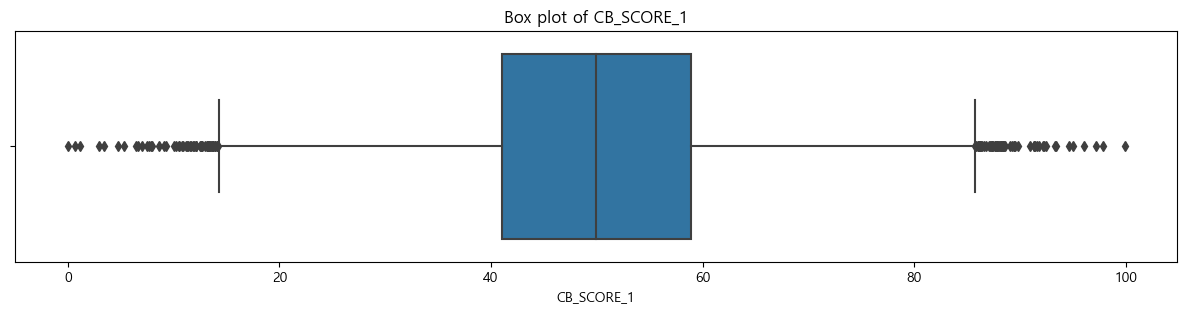

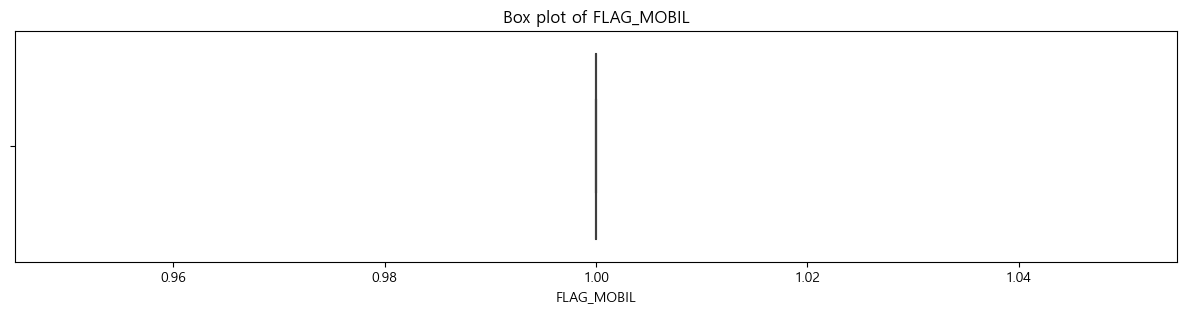

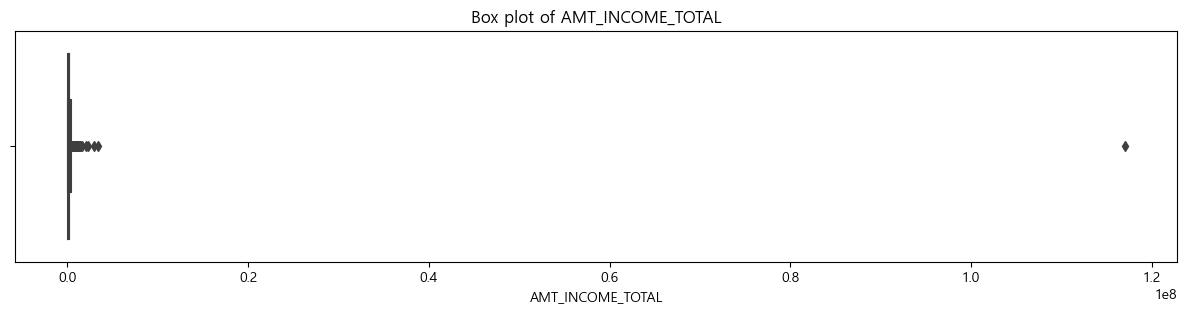

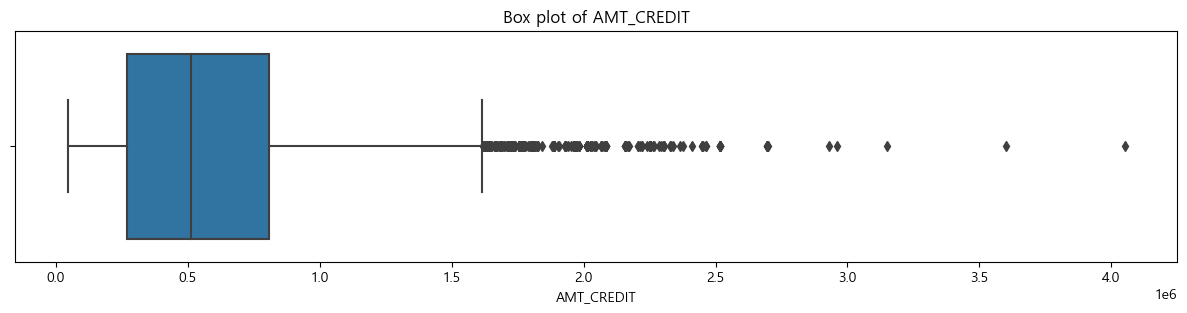

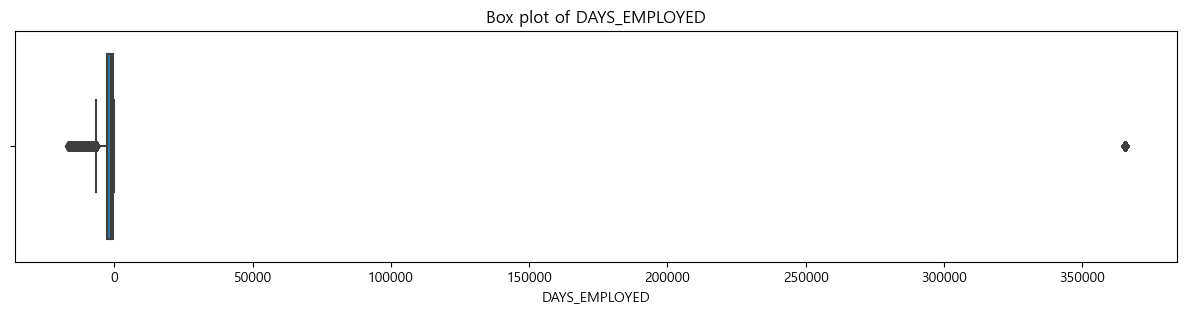

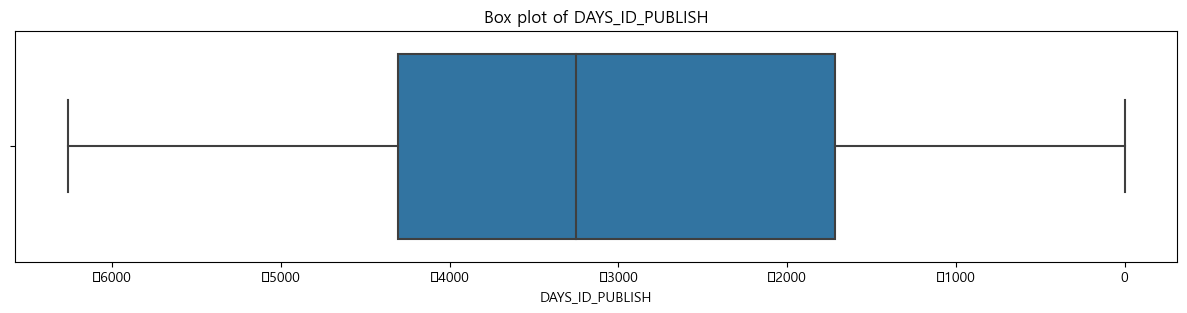

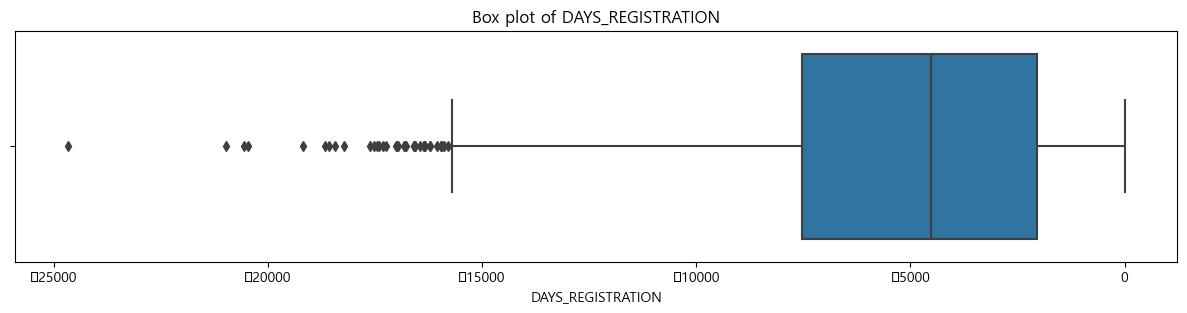

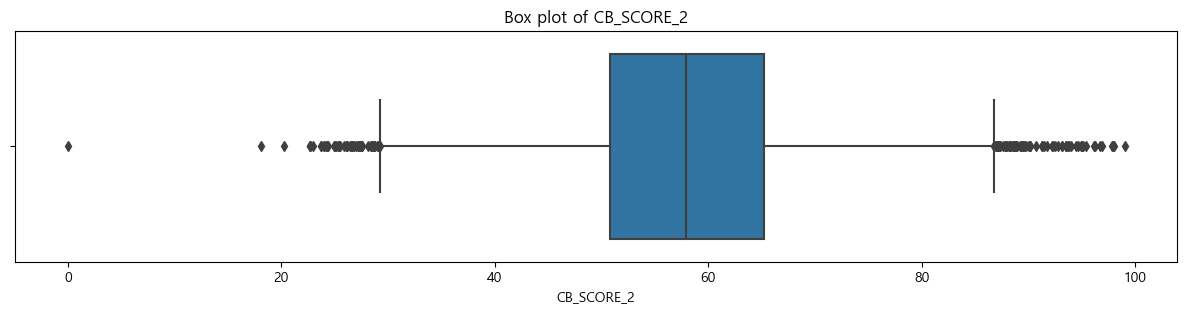

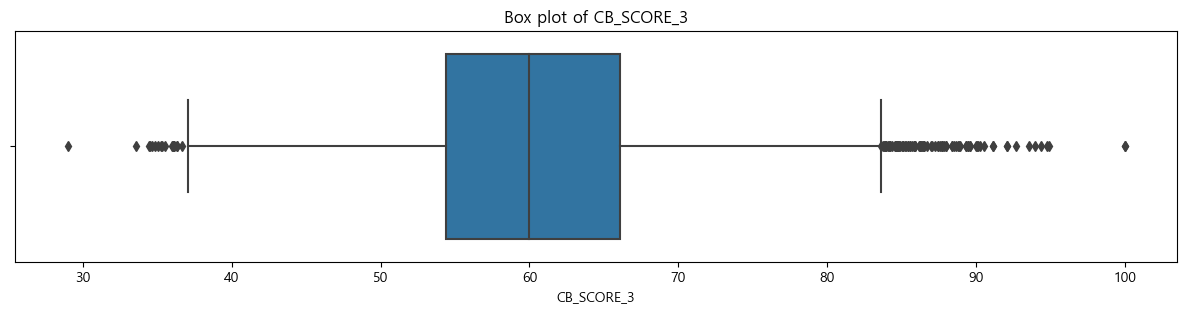

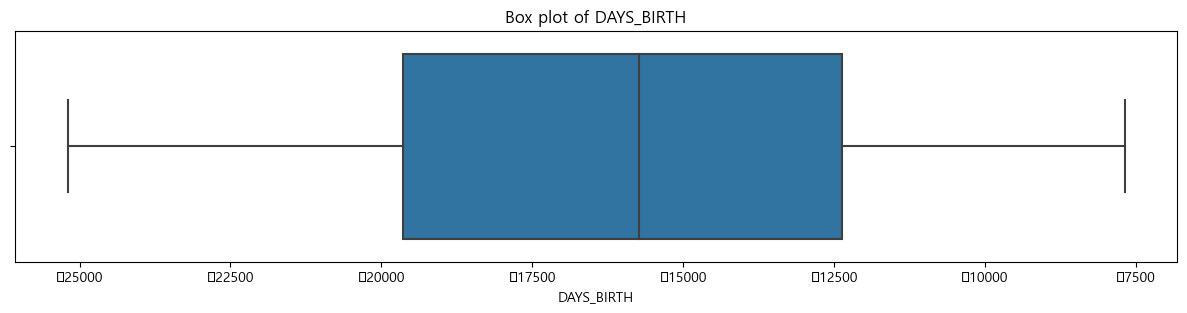

In [19]:
numeric_cols = df_adj_mv.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = [col for col in df_adj_mv.columns if df_adj_mv[col].dtype == object] + \
               [col for col in numeric_cols if set(df_adj_mv[col].unique()) == {0, 1}] + \
               [col for col in numeric_cols if set(df_adj_mv[col].unique()) == {1, 2, 3}] + \
               ['SK_ID_CURR','CNT_CHILDREN','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START']
numeric_cols = list(set(numeric_cols) - set(exclude_cols))

for col in numeric_cols:
    plt.figure(figsize=(15, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

> #### 결론 1. boxplot에서 AMT_INCOME_TOTAL의 boxplot은 이상치로 인해 분포 확인이 힘듬  
    > #### ▶ 해당 이상치를 가지는 row(행)이 몇 개인지 확인 

In [20]:
# AMT_INCOME_TOTAL 열의 최대값 찾기
max_value = df['AMT_INCOME_TOTAL'].max()

# 최대값의 빈도 찾기
max_value_count = df[df['AMT_INCOME_TOTAL'] == max_value].shape[0]

print(f"AMT_INCOME_TOTAL의 최대값은 {max_value}이며, 이 값이 중복되는 건수는 {max_value_count}개입니다.")

AMT_INCOME_TOTAL의 최대값은 117000000.0이며, 이 값이 중복되는 건수는 1개입니다.


> #### <font> 결론 2. DAYS_EMPLOYED 변수 탐색 '대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)’</font> 
> #### <font> 결측치를 제외한 나머지 유효값들 중 365243.0이라는 특정 유효값에서 2,999건을 가지며 IQR통해 이상치로 확인됨(IQR기반 이상치 탐지 진행) </font>
> #### <font color = red> ▶ [Insight 3] 비상식적인 유효값이고 차지비중이 크므로, 365243.0은 np.nan으로 처리 </font>

> #### <font> 결론 3. CB스코어, 신용대출금액, 소득금액의 이상치로 나오는 항목 변수 탐색 </font> 
> #### <font> 각 컬럼별 유효값들의 빈도 수가 현저히 적으며 DAYS_EMPLOYED와 같이 특정 값에 지나치게 쏠림(2,999건)이 없을뿐더러 이상치 값 자체가 중요한 특성을 반영할 수 있다고 판단됨  </font>
> #### <font color = blue> ▶ 현재 결측치가 상당히 많기때문에 결측치 대체 후 이상치에 대해 처리 여부 검토 진행 </font>

> #### <font> 결론 4. 'AMT_INCOME_TOTAL의':'소득금액(USD)' 변수 탐색 </font> 
> #### <font color = red> ▶ [Insight 4] 상당한 간극을 보여주는 117000000은 극단값으로 판단하여 결측값으로 진행 </font>

- #### [Insight 1~4]을 참고해 최종적으로 Null값으로 처리할 유효값들 정리

In [23]:
df_adj_mv = df.copy()
df_adj_mv = df_adj_mv.replace(['NaN', 'nan', 'XNA', 'Unknown', 365243.0, 117000000.0], np.nan)

In [24]:
for column in df_adj_mv.columns:
    value_counts = df_adj_mv[column].value_counts(dropna = False)

###  1.5 결측치 간 패턴 등 연관성 파악 <a id="s-1.5">

- #### 최종 결측치가 있는 컬럼 파악

In [25]:
# 결측값이 있는 행 선택하기
col_mv_list = df_adj_mv.columns[df_adj_mv.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_INCOME_TOTAL 소득금액(USD)
- AMT_CREDIT 신용대출금액(USD)
- NAME_FAMILY_STATUS 결혼상태
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- ORGANIZATION_TYPE 근무회사유형
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


- #### 최종 결측치가 있는 row(행) 파악

In [26]:
df_adj_mv2 = df_adj_mv[df_adj_mv.isnull().any(axis=1)]
df_adj_mv2.shape

(23636, 35)

In [27]:
# 결측치 확인
print("결측치가 있는 행의 수는",len(df_adj_mv),"중",len(df_adj_mv[df_adj_mv.isnull().any(axis=1)]))

# 대부분의 행이 결측치가 있음
missing_values = df_adj_mv.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23636


CODE_GENDER                    7095
FLAG_OWN_REALTY                9571
AMT_INCOME_TOTAL                  1
AMT_CREDIT                     7300
NAME_FAMILY_STATUS                1
REGION_POPULATION_RELATIVE     7149
DAYS_BIRTH                     4749
DAYS_EMPLOYED                 10148
DAYS_REGISTRATION              9733
DAYS_ID_PUBLISH                4741
ORGANIZATION_TYPE              4294
CB_SCORE_1                     6146
CB_SCORE_2                     8274
CB_SCORE_3                     7108
dtype: int64

- #### 컬럼별 결측률  파악

In [28]:
def missing_ratio(df):
    return (df.isnull().mean() * 100).round(4).astype(str) + '%'

print(missing_ratio(df_adj_mv))

SK_ID_CURR                        0.0%
NAME_CONTRACT_TYPE                0.0%
CODE_GENDER                   29.5625%
FLAG_OWN_REALTY               39.8792%
CNT_CHILDREN                      0.0%
AMT_INCOME_TOTAL               0.0042%
AMT_CREDIT                    30.4167%
NAME_INCOME_TYPE                  0.0%
NAME_EDUCATION_TYPE               0.0%
NAME_FAMILY_STATUS             0.0042%
NAME_HOUSING_TYPE                 0.0%
REGION_POPULATION_RELATIVE    29.7875%
DAYS_BIRTH                    19.7875%
DAYS_EMPLOYED                 42.2833%
DAYS_REGISTRATION             40.5542%
DAYS_ID_PUBLISH               19.7542%
FLAG_MOBIL                        0.0%
FLAG_EMP_PHONE                    0.0%
FLAG_WORK_PHONE                   0.0%
FLAG_PHONE                        0.0%
FLAG_EMAIL                        0.0%
REGION_RATING_CLIENT              0.0%
WEEKDAY_APPR_PROCESS_START        0.0%
HOUR_APPR_PROCESS_START           0.0%
REG_CITY_NOT_LIVE_CITY            0.0%
REG_CITY_NOT_WORK_CITY   

> #### <font> 상당한 컬럼들에 결측치가 있음을 확인. </font>
> #### <font> 대부분 결측치가 있는 컬럼별로 결측치는 약 4,000 ~ 10,000개가 있으므로 20~40% 를 차지함 </font>
> #### <font color = red> ▶ 주어진 유효값들에 패턴에 의해 결측치가 발생된건지</font>
> #### <font color = red> 무작위 패턴으로 결측치가 있는 것인지 탐색적 데이터 분석을 통해 파악 </font>

- #### 결측치 유형 파악(MAR / MCAR / MNAR)에 앞서  <font color = blue> 결측치가 존재하는 컬럼별 결측행(ROW)에 대해 비결측치가 없는 컬럼들의 유효값 빈도수 파악 </font> 

In [29]:
def most_frequent_values(df, columns_with_null):
    result = pd.DataFrame()
    for col in columns_with_null:
        mask = df[col].isnull()
        null_count = mask.sum()
        df_null = df.loc[mask].dropna(axis=1)

        if not df_null.empty:
            res_list = []
            for c in df_null.columns:
                try:
                    mode_value, count_value = df_null[c].mode()[0], df_null[c].value_counts().iloc[0]
                    res_list.append((c, mode_value, count_value))
                except Exception as e:
                    print(f"An exception occurred for column {c}: {str(e)}")                    
            res_df = pd.DataFrame(res_list, columns=['Column', 'Most Frequent Value', 'Count'])
            result = pd.concat([result, res_df.set_index([pd.Index([f"{col} (Nulls: {null_count})"]*len(res_df)), 'Column'])])
    return result

In [30]:
columns_with_null = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE',
                    'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','ORGANIZATION_TYPE','CB_SCORE_1','CB_SCORE_2','CB_SCORE_3']  # Add more columns as needed

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

result_df = most_frequent_values(df_adj_mv, columns_with_null)
print(result_df.to_string())

                                                                               Most Frequent Value  Count
                                         Column                                                          
CODE_GENDER (Nulls: 7095)                SK_ID_CURR                                         100004      1
                                         NAME_CONTRACT_TYPE                             Cash loans   6424
                                         CNT_CHILDREN                                            0   4974
                                         AMT_INCOME_TOTAL                                 135000.0    808
                                         NAME_INCOME_TYPE                                  Working   3617
                                         NAME_EDUCATION_TYPE         Secondary / secondary special   5057
                                         NAME_FAMILY_STATUS                                Married   4559
                                         NAME_

> #### <font> 해석 1.CNT_CHILDREN이 0인 경우, FLAG_MOBIL이 1인 경우 </font> 
> #### <font> NAME_HOUSING_TYPE이 "House / apartment"인 경우 등이 주요 패턴으로 보임. </font>

> #### <font> 해석 2. DAYS_EMPLOYED 컬럼의 경우, "Pensioner"라는 값이 주목할 만한 패턴으로 나타남 </font> 
> #### <font> 이는 해당 컬럼의 결측치가 퇴직자들에게서 주로 발생했을 수 있음을 의미하는것으로 판단 </font>

> #### <font> 해석 3. Pensioner로 분류된 경우에는 조직 유형이 제공되지 않은 경향이 있음 </font>

> #### <font color = blue> ▶ 해석 1~3 에 따라 각 컬럼의 결측치가 특정 컬럼의 영향을 받는지 확실한 파악을 위해서 결측치 유형을 판단하는 Test 진행 </font>

### 1.6 결측치 유형별 대체 방법 설명 <a id="s-1.6">

- #### <font color = blue> 결측치 유형 종류 </font>
 
    #### <B> 1.완전 무작위 결측(MCAR: Missing Completely At Random)</B>  
     #### X1, X2, X3라는 특성이 있다고 가정시 이 때, X2열의 결측치가 X1, X2, X3열의 다른 값들과 아무런 상관관계가 없는 경우    


    #### <B> 2.무작위 결측(MAR: Missing At Random)</B>   
     #### X1, X2, X3라는 특성이 있다고 가정, 이 때, X1이 True인 경우, X2는 결측치를 갖고, X1이 False인 경우, X2는 값을 가진다면, 
     #### 다시 말해 다른 특성의 값에 따라 결측치의 발생 확률이 계산될 경우. 그러나 값자체의 상관관계는 알 수 없는 경우.

    #### <B> 3.비무작위 결측(NMAR: Not Missing At Random)</B>   
     #### 위의 두가지 유형이 아닐 때, 비무작위 결측. 이 경우 결측치가 일어난 특성(X2)의 값이 다른 특성(X1)의 값과 상관관계가 있음.  
     #### *참고문헌 Little, R.J.A., & Rubin, D.B. (2002). Statistical Analysis with Missing Data (2nd ed.). Wiley.*

- #### <font color = blue> 결측치 처리 방법 </font>

    #### 1. 굉장히 적은 수의 결측치 : (예: 약 5%미만) 제거 또는 보간법으로 처리(평균, 중앙, 최빈값)

    #### 2. 단순히 평균값 등으로 대체하는 방법보다 다중 대체법의 우월성을 강조함. 이는 상당히 높은 비율의 결손값(예를 들어 20~40%)에 대해서도 유효

    #### *참고문헌 "Multiple Imputation for Nonresponse in Surveys" by Donald B. Rubin*

### 1.7 결측치 대체(추정통계량대체) <a id="s-1.7">

- #### <font color = blue>NAME_FAMILY_STATUS</font> 컬럼
    #### ▶ 결측행이 1개인 범주형 컬럼이므로 <font color = blue> 최빈값 대체 </font> </font>

- #### <font color = blue>AMT_INCOME_TOTAL</font> 컬럼
    #### ▶ 결측행이 1개인 수치형 컬럼이므로  <font color = blue> 중앙값 대체 </font></font>

- #### <font>  이외 결측률이 높은 컬럼들은 결측치 유형 파악 후 처리 </font>

- #### 추정 통계량 대체 함수 정의 

In [32]:
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            fill_value = df[col].mode()[0]
        elif fill_method == 'median':
            fill_value = df[col].median()
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
        df[col] = df[col].fillna(fill_value)
    return df

fill_methods = {    
    'NAME_FAMILY_STATUS': 'mode',
    'AMT_INCOME_TOTAL':'median'
}

In [33]:
df_adj_mv_2 = replace_missing_values(df_adj_mv,fill_methods)
missing_values = df_adj_mv_2.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'ORGANIZATION_TYPE',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

- #### <font> 결측치 유형(MAR/MCAR/MNAR) 파악을 위한 Heatmap 시각화 </font> 

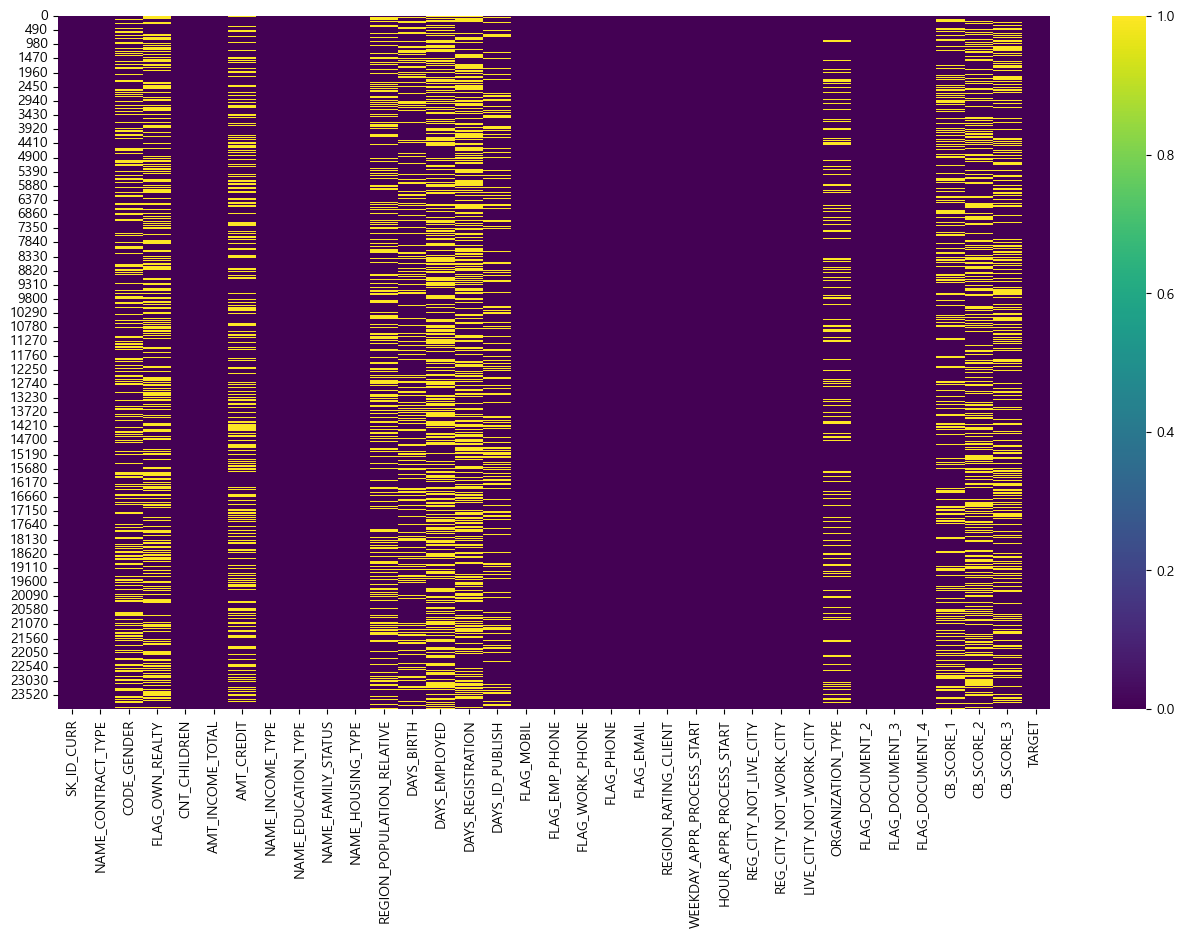

In [34]:
plt.figure(figsize=(16, 9))  # 가로 세로 비율 조정
sns.heatmap(df_adj_mv_2.isnull(), cmap='viridis')
plt.xticks(np.arange(df_adj_mv_2.shape[1])+0.5, df_adj_mv_2.columns.tolist(), rotation=90) # x축 레이블 설정
plt.show()

> #### <font> 단순히 Heatmap만을 보고서는 결측치를 가진 컬럼들간 연관성이 없어보여 MCAR로 보임 </font>
> #### <font color = blue> ▶ 정확한 연관성은 통계적 검정 방법 (Little's MCAR Test, Chisq test)등을 통해 판단 </font>

- #### Missing Indicator Method  
    #### 이 방법은 각 변수(열)에 대해 결측값이 있는지 여부를 나타내는 새로운 이진 변수(binary variable)를 생성 
    #### 각 변수의 결측치 패턴을 빠르게 파악하거나 어떤 변수가 결측치 발생과 가장 큰 관련성을 가지는지 확인하는데 유용하게 사용

In [37]:
# 결측치가 있는 컬럼들로만 구성된 데이터프레임
missing_cols = df_adj_mv_2.columns[df_adj_mv_2.isnull().any()].tolist()
df_with_missing_values = df_adj_mv_2[missing_cols]

In [38]:
def missing_indicator_method(df):
    # 각 컬럼별로 결측 여부를 나타내는 새로운 데이터 프레임 생성
    df_nan = df.isnull().astype(int)
    results = {}
    # 각 컬럼별로 다른 모든 변수들과의 상관 계수 계산
    for col in df.columns:
        corr_matrix = df_nan[[c for c in df.columns if c != col]].corrwith(df_nan[col]).abs()
        # 상관 계수가 유의미하게 큰 경우가 있는지 확인
        max_corr = corr_matrix.max()
        results[col] = max_corr < 0.05  # 임곗값은 실험적으로 설정
    return results

In [39]:
results = missing_indicator_method(df_with_missing_values)
for column, is_mcar in results.items():
    if is_mcar:
        print(f"{column} is likely MCAR")
    else:
        print(f"{column} is likely MAR or NMAR")

CODE_GENDER is likely MCAR
FLAG_OWN_REALTY is likely MCAR
AMT_CREDIT is likely MCAR
REGION_POPULATION_RELATIVE is likely MCAR
DAYS_BIRTH is likely MCAR
DAYS_EMPLOYED is likely MAR or NMAR
DAYS_REGISTRATION is likely MCAR
DAYS_ID_PUBLISH is likely MCAR
ORGANIZATION_TYPE is likely MAR or NMAR
CB_SCORE_1 is likely MCAR
CB_SCORE_2 is likely MCAR
CB_SCORE_3 is likely MCAR


In [40]:
column_info

{'SK_ID_CURR': '대출식별번호',
 'NAME_CONTRACT_TYPE': '계약유형',
 'CODE_GENDER': '성별',
 'FLAG_OWN_REALTY': '자가부동산보유여부',
 'CNT_CHILDREN': '자녀수',
 'AMT_INCOME_TOTAL': '소득금액(USD)',
 'AMT_CREDIT': '신용대출금액(USD)',
 'NAME_INCOME_TYPE': '소득유형',
 'NAME_EDUCATION_TYPE': '학력',
 'NAME_FAMILY_STATUS': '결혼상태',
 'NAME_HOUSING_TYPE': '주거형태',
 'REGION_POPULATION_RELATIVE': '거주지역의표준화된인구',
 'DAYS_BIRTH': '대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
 'DAYS_EMPLOYED': '대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
 'DAYS_REGISTRATION': '대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
 'DAYS_ID_PUBLISH': '대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
 'FLAG_MOBIL': '휴대폰번호등록여부',
 'FLAG_EMP_PHONE': '고용주연락처등록여부',
 'FLAG_WORK_PHONE': '직장전화번호등록여부',
 'FLAG_PHONE': '집전화번호등록여부',
 'FLAG_EMAIL': '이메일주소등록여부',
 'REGION_RATING_CLIENT': '거주지등급',
 'WEEKDAY_APPR_PROCESS_START': '대출신청요일',
 'HOUR_APPR_PROCESS_START': '대출신청시간대',
 'REG_CITY_NOT_LIVE_CITY': '고객의등록지주소와실거주지일치여부',
 'REG_CITY_NOT_WORK_CITY': '고객의등록지주소와직장주소일치여부',
 'LIVE_CITY_NOT_WORK_CITY': '고객의실거주지와직장주소일치여부',


> #### <font> 결론 1. MCAR 로 보이는 컬럼 </font> 
> #### <font> ▶ CODE_GENDER, FLAG_OWN_REALTY, AMT_CREDIT, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH, CB_SCORE_1~3 </font>  

> #### <font> 결론 2. MAR 혹은 NMAR 로 보이는 컬럼 </font> 
> #### <font> ▶ DAYS_EMPLOYED, ORGARIZATION_TYPE </font>  

> #### <font color = blue > 정확한 유형 파악을 위해 Little's MCAR Test 및 카이제곱 검정 방법 사용 </font>

- ####  Little's MCAR TEST 및 카이제곱 검정을 통한 결측치 유형 파악하기
    #### <b> 수치형 컬럼 : Little's MCAR 테스트 시행</b>  
    주어진 변수의 결측값을 예측하는 선형 회귀 모델을 사용. MSE(예측값과 평균값 차이)가 작다면 MCAR일 가능성이 높음   
    #### <b> 범주형 컬럼 : 카이제곱(독립성) 검정 시행</b>    
    각 범주형 변수와 결측치 여부(결측 있음/없음)를 비교하여 독립성 검정을 시행해,   
    p-value가 0.05보다 작으면 해당 칼럼의 결측치는 완전히 무작위로 발생하지 않았다고 가정할 수 있으므로 MAR 혹은 MNAR로 분류.

- #### 결측치 유형 Little's MCAR TEST 및 카이제곱 검정 함수 정의

In [42]:
def mcar_test(df):
    results = {}
    
    for col in df.columns:
        
        if df[col].isnull().sum() == 0: # if no missing values in the column, skip the test.
            continue
            
        if np.issubdtype(df[col].dtype, np.number):
            # 수치형 변수에 대한 Little's MCAR 테스트
            other_cols = [c for c in df.columns if c != col and np.issubdtype(df[c].dtype, np.number)]
            missing_rows_in_col = df[col].isnull()
            
            # 결측치만 있는 경우 건너뛰기
            if missing_rows_in_col.sum() == len(df):
                results[col] = (None, "All values are missing")
                continue                
            observed_data = df[~missing_rows_in_col][other_cols].select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())
            model=LinearRegression()
            model.fit(observed_data,df[~missing_rows_in_col][col])
            predicted_missing_values = model.predict(df[missing_rows_in_col][other_cols].fillna(df.select_dtypes(include=[np.number]).mean()))
            squared_error_sum=np.sum((predicted_missing_values-df[col].mean())**2)
            numeric_df = df.select_dtypes(include=[np.number])
            chisq_val = squared_error_sum / (numeric_df.std()**2).sum()
            p_value=1-chi2.cdf(x=chisq_val,df=len(predicted_missing_values))
        
        else:
             # 범주형 변수에 대한 카이제곱 검정
            contingency_table = pd.crosstab(df[col], df.isnull().sum(axis=1) > 0)
            _, p_value, _, _ = chi2_contingency(contingency_table)
        # Missingness type determination based on p-value
        if p_value < 0.05:
            missingness_type = "MAR or MNAR"
        else:
            missingness_type = "MCAR"
        results[col] = (p_value, missingness_type)
    return results

In [43]:
# 데이터 로드 및 사용자 정의 인덱스 제거
df_adj_mv_3 = df_adj_mv_2.drop('SK_ID_CURR', axis=1)
results=mcar_test(df_adj_mv_3)
for col,result in results.items():
    p_val, missingness_type = result
    print(f"Column: {col}, p-value: {p_val}, Missingness Type: {missingness_type}")

Column: CODE_GENDER, p-value: 0.09490305081468822, Missingness Type: MCAR
Column: FLAG_OWN_REALTY, p-value: 0.34526513429768724, Missingness Type: MCAR
Column: AMT_CREDIT, p-value: 1.0, Missingness Type: MCAR
Column: REGION_POPULATION_RELATIVE, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_BIRTH, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_EMPLOYED, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_REGISTRATION, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_ID_PUBLISH, p-value: 1.0, Missingness Type: MCAR
Column: ORGANIZATION_TYPE, p-value: 0.05325009856875434, Missingness Type: MCAR
Column: CB_SCORE_1, p-value: 1.0, Missingness Type: MCAR
Column: CB_SCORE_2, p-value: 1.0, Missingness Type: MCAR
Column: CB_SCORE_3, p-value: 1.0, Missingness Type: MCAR


> #### <font> 모두 MCARMissing Completely At Random), 원인이 전혀 없는 무작위 결측 데이터로 판단되어, </font>
> #### <font> 결측치 대체 방법으로 </font>  <font color = blue > [1] KNN-impute [2] MICE-impute [3] Deap-learning Model 방법 </font>사용 </font> 
> #### <font color = red > ▶ 최종 선택 방법은 AUC 기준 성능이 가장 높은 Deap-learning 방법 채택 </font>

### 1-8. 결측치 대체 (ML) : KNN-imputation, MICE-imputation <a id="s-1.8"> 

- #### KNN-imputation
    #### kNN-imputation은 k-Nearest Neighbors 알고리즘을 기반으로 결측치를 예측하는 방법
    #### 누락된 데이터가 있는 샘플에 대해 가장 유사한 이웃들의 값을 사용하여 결측치를 추정하며,
    #### 유사성은 일반적으로 유클리디안 거리나 맨하탄 거리 등을 기준으로 측정
    #### ▶ 장점: 간단하고 직관적인 방법이며, 다른 변수들 간의 관계를 고려할 수 있음
    #### ▶ 단점: 이상치에 민감할 수 있으며, 변수 간의 비선형 관계나 복잡한 패턴을 잘 처리하지 못함

- #### MICE-imputation
    #### MICE-imputation은 다중 대체법은 변수들간  결합 분포를 모델링하여 결측치를 추정하며, 
    #### 각 변수는 자신을 제외한 나머지 변수들로부터 예측됨
    #### 반복적인 과정에서 모든 변수에 대해 여러 번 예측하고 업데이트하여 최적화됨
    #### ▶ 장점: 다변량 데이터에서 효과적이며, 비선형 관계와 상호작용 처리 가능. 유연성과 안정성이 높음
    #### ▶ 단점: 계산 비용이 많이 들며, 반복 횟수 및 체인 길이 설정 등 argument 설정이 중요함 

- #### ML, DL 방법에 따른 결측치 대체(1.8, 9)에 사용할 Dataset 이름 : data

In [48]:
data = df.copy()

- #### ML알고리즘에 의한 결측 대체 함수 정의   
    #### KNN, MICE 방법의 경우 수치형 변수의 결측 대체에 최적화된 알고리즘으로
    #### 범주 데이터에 결측치가 있으면 해당 결측치를 하나의 레이블(label)로 인식 (한계점) 
    #### ▶ 범주형 변수 내 결측 데이터는 MinMax Scaler 적용해 가까운 데이터값의 범주를 가지고 오도록 설계함

In [49]:
#  범주형 변수 유효값 딕셔너리 생성 함수 
def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

# 유효값-숫자로 매칭해, 숫자로 변환해주는 함수 
def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)
    
# train, test set을 받아서 imputation data를 반환해주는 함수
# train set에 적용된 결측대체 함수를 test set에도 적용
def imputation(df1, df2, cols, scaler, algorithm = KNNImputer()):
    #  label 유효값 딕셔너리 생성 
    for variable in cols:
        mappings = find_category_mappings(df1, variable)
        mappin[variable] = mappings
    # label들 숫자로 변환 (결측치는 보존) : train, xtest data 전부 
    for variable in cols:
        integer_encode(df1, variable, mappin[variable])  
        integer_encode(df2, variable, mappin[variable])  
    # 범주형 변수에 대한 min-max scaling 
    sca_xtrain = scaler.fit_transform(df1) 
    imputer = algorithm
    impute_xtrain = imputer.fit_transform(sca_xtrain) # 범주숫자에 대한 스케일링 진행됨 
    # test set에 scaling & knn 대체 동일하게 적용
    sca_xtest = scaler.transform(df2)
    impute_xtest = imputer.transform(sca_xtest) 
    #  knn
    df1.iloc[:,:] = scaler.inverse_transform(impute_xtrain) 
    df2.iloc[:,:] = scaler.inverse_transform(impute_xtest) 
    for i in cols : 
        df1[i] = round(df1[i]).astype('int')
        df2[i] = round(df2[i]).astype('int')
    
    del scaler
    return df1, df2    

- #### KNN-Imputation 진행

In [50]:
mm_scaler = MinMaxScaler()
mappin = dict()

In [51]:
X = data.drop('TARGET', axis=1); y = data['TARGET']
X = X.drop(['SK_ID_CURR'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
# 범주형 변수와 연속형 변수 분리
categorical_cols = X.select_dtypes(include='object').columns.tolist()
continuous_cols = X.select_dtypes(include=['float', 'int']).columns.tolist()

In [55]:
# knn_impute_dat = imputation(X_train, X_test, categorical_cols, mm_scaler, KNNImputer()) # knn-imputer

In [95]:
# 저장하기
# import pickle
# file_path = "knn_impute_dat.pkl"
# with open(file_path, "wb") as file:
#     pickle.dump(knn_impute_dat, file)

In [92]:
# 불러오기
# pickle 파일 불러오기
file_path = "knn_impute_dat.pkl"
with open(file_path, "rb") as file:
    knn_impute_dat = pickle.load(file)

In [93]:
knn_X_train, knn_X_test = knn_impute_dat

In [94]:
knn_X_test.head(10)

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_REALTY  CNT_CHILDREN  \
16483                   0            1                1           0.0   
1751                    0            1                0           0.0   
1510                    0            1                0           2.0   
21486                   0            1                0           0.0   
14419                   0            1                1           0.0   
20914                   1            1                0           0.0   
17084                   0            0                0           0.0   
10615                   0            1                1           0.0   
11789                   0            0                0           0.0   
12688                   0            1                1           1.0   

       AMT_INCOME_TOTAL  AMT_CREDIT  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
16483          162000.0    808650.0                 1                    0   
1751           135000.0    490495.5                 0                    1   
1510           292500.0    640080.0                 0                    1   
21486          135000.0    900000.0                 0                    1   
14419          184500.0    678726.0                 0                    0   
20914          112500.0    337500.0                 0                    1   
17084          270000.0    677762.1                 0                    1   
10615          135000.0    314055.0                 0                    1   
11789          135000.0    600501.6                 0                    1   
12688          306000.0    260640.0                 2                    1   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
16483                   2                  0                    0.056735   
1751                    4                  0                    0.018029   
1510                    1                  0                    0.011657   
21486                   1                  0                    0.021077   
14419                   1                  2                    0.010319   
20914                   2                  0                    0.017432   
17084                   1                  0                    0.018151   
10615                   1                  4                    0.016612   
11789                   1                  0                    0.018801   
12688                   1                  3                    0.006305   

       DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
16483    -22560.8       365243.0            -8442.0          -3775.0   
1751     -16537.2        -1828.6            -3570.0          -3578.0   
1510     -10854.0        -1261.0            -3197.6           -878.0   
21486    -17705.0         -961.0            -4755.2          -1242.0   
14419    -11026.0        -1131.0            -1248.0          -1939.2   
20914    -18323.0         -955.0            -6756.0           -560.0   
17084    -18343.2         -264.0            -6403.4          -3118.4   
10615    -17769.0        -8123.0            -7455.0          -1286.0   
11789    -20052.0        -2108.0            -5428.0          -3578.0   
12688    -11248.6        -1292.0            -4558.0          -2521.0   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
16483         1.0             0.0              0.0         1.0         0.0   
1751          1.0             1.0              1.0         0.0         0.0   
1510          1.0             1.0              0.0         0.0         1.0   
21486         1.0             1.0              1.0         1.0         0.0   
14419         1.0             1.0              0.0         1.0         0.0   
20914         1.0             1.0              0.0         0.0         0.0   
17084         1.0             1.0              0.0         0.0         0.0   
10615         1.0             1.0              0.0         0.0         0.0   
11789       

- #### MICE-Imputation 진행

In [77]:
# from fancyimpute import IterativeImputer

In [78]:
# mice_impute_dat = imputation(X_train, X_test, categorical_cols, mm_scaler, IterativeImputer()) # mice-imputer

In [79]:
# mice_X_train, mice_X_test = mice_impute_dat

In [85]:
# 저장하기
# import pickle
# file_path = "mice_impute_dat.pkl"
# with open(file_path, "wb") as file:
#     pickle.dump(mice_impute_dat, file)

In [88]:
# 불러오기
# pickle 파일 불러오기
file_path = "mice_impute_dat.pkl"
with open(file_path, "rb") as file:
    mice_impute_dat = pickle.load(file)

In [89]:
mice_X_train, mice_X_test = mice_impute_dat

In [90]:
mice_X_test.head(10)

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_REALTY  CNT_CHILDREN  \
16483                   0            1                1           0.0   
1751                    0            1                0           0.0   
1510                    0            1                0           2.0   
21486                   0            1                0           0.0   
14419                   0            1                1           0.0   
20914                   1            1                0           0.0   
17084                   0            0                0           0.0   
10615                   0            1                1           0.0   
11789                   0            0                0           0.0   
12688                   0            1                1           1.0   

       AMT_INCOME_TOTAL  AMT_CREDIT  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
16483          162000.0    808650.0                 1                    0   
1751           135000.0    490495.5                 0                    1   
1510           292500.0    640080.0                 0                    1   
21486          135000.0    900000.0                 0                    1   
14419          184500.0    678726.0                 0                    0   
20914          112500.0    337500.0                 0                    1   
17084          270000.0    677762.1                 0                    1   
10615          135000.0    314055.0                 0                    1   
11789          135000.0    600501.6                 0                    1   
12688          306000.0    260640.0                 2                    1   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
16483                   2                  0                    0.056735   
1751                    4                  0                    0.018029   
1510                    1                  0                    0.011657   
21486                   1                  0                    0.021077   
14419                   1                  2                    0.010319   
20914                   2                  0                    0.017432   
17084                   1                  0                    0.018151   
10615                   1                  4                    0.016612   
11789                   1                  0                    0.018801   
12688                   1                  3                    0.006305   

       DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
16483    -22560.8       365243.0            -8442.0          -3775.0   
1751     -16537.2        -1828.6            -3570.0          -3578.0   
1510     -10854.0        -1261.0            -3197.6           -878.0   
21486    -17705.0         -961.0            -4755.2          -1242.0   
14419    -11026.0        -1131.0            -1248.0          -1939.2   
20914    -18323.0         -955.0            -6756.0           -560.0   
17084    -18343.2         -264.0            -6403.4          -3118.4   
10615    -17769.0        -8123.0            -7455.0          -1286.0   
11789    -20052.0        -2108.0            -5428.0          -3578.0   
12688    -11248.6        -1292.0            -4558.0          -2521.0   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
16483         1.0             0.0              0.0         1.0         0.0   
1751          1.0             1.0              1.0         0.0         0.0   
1510          1.0             1.0              0.0         0.0         1.0   
21486         1.0             1.0              1.0         1.0         0.0   
14419         1.0             1.0              0.0         1.0         0.0   
20914         1.0             1.0              0.0         0.0         0.0   
17084         1.0             1.0              0.0         0.0         0.0   
10615         1.0             1.0              0.0         0.0         0.0   
11789       

> #### <font> 두 ML 방법에 의해 결측치가 채워진 데이터에 대해 y(TARGET) 예측에 대한 성능 평가를 <font color = blue> 1.10 Chapter </font> 에서 진행 </font>

### 1.9 결측치 대체(DL) <a id="s-1.9">

- #### <font color = Red> DNN(Deep Neural Network) </font>    
    #### <font> 장점 1. 복잡한 관계 학습 ▶ 데이터 안의 복잡한 패턴과 상호작용을 더 잘 파악하고 학습 </font> 
    #### <font> 장점 2. 비선형 패턴 학습 ▶ 데이터의 비선형 패턴에 대한 전통적인 통계방법들에 반해 잘 학습함 </font> 
    #### <font> 장점 3. 다변량 대체 ▶ 여러 변수의 결측치를 동시에 고려하고 대체  </font> 
    #### <font> 장점 4. 유연성 ▶ 다양한 아키텍처와 학습 전략을 통해 딥러닝 모델을 데이터에 맞게 조절  </font> 
    #### <font> 장점 5. 성능 ▶ 다른 대체 방법들과 비교할 때 딥러닝은 종종 더 나은 성능을 보여줌  </font> 
    #### <font> 주의점. 과적합 ▶ 24,000개 행의 데이터셋으로 딥러닝시 다소 과적합이 우려되나 dropout을 통해 과적합을 최소화하여 진행 </font> 


- #### 원본 데이터 불러오기 / 식별키 제외

In [59]:
data = df.copy()

- #### key(식별번호) : unique value 이므로 drop
- #### FLAG_MOBIL : 유효값이 하나인 data 이므로 drop 

In [60]:
data.drop(columns=['SK_ID_CURR','FLAG_MOBIL'], inplace=True)#,'FLAG_MOBIL'

- #### 딥러닝 Input 데이터 분류

In [61]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

- #### 최종 결측치 컬럼 확인

In [62]:
# 결측값이 있는 행 선택하기
col_mv_list = data.columns[data.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


- #### 결측률이 낮은 데이터에 대해 기초통계량 값으로 대체 <font color = blue> ( 1.7 Chapter 참고 ) </font> 

In [63]:
from scipy import stats
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            fill_value = df[col].mode()[0]
            #mode_result = stats.mode(df[col])
            #fill_value = mode_result.mode[0]
        elif fill_method == 'median':
            fill_value = df[col].median()
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
        df[col] = df[col].fillna(fill_value)
    return df

In [64]:
# 오기값 고려한 최종 결측치가 한개인 컬럼은 최빈값으로 대체 
data = data.replace(['Unknown',117000000.0], np.nan)
fill_methods = {
    'NAME_FAMILY_STATUS': 'mode',
    'AMT_INCOME_TOTAL': 'median'
}
data = replace_missing_values(data,fill_methods)
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

- #### 변수 타입 변경

In [57]:
data = data.astype({'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object  })

- #### 딥러닝 Input 데이터 분류

In [58]:
def columns_classification(data):
    # 주어진 데이터를 수치형, 범주형, 결측치가 있는 컬럼으로 분류하여 뱉어냄.
    
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].index.to_list()

    numeric_columns = numeric_columns.to_list()
    numeric_columns = [x for x in numeric_columns if x not in missing_values]
    numeric_columns

    categorical_columns = categorical_columns.to_list()
    categorical_columns = [x for x in categorical_columns if x not in missing_values]
    categorical_columns    
    print('total_columns : ' + str(len(data.columns)))
    
    print('numeric_columns : ' + str(len(numeric_columns)))
    print(numeric_columns)
    print('categorical_columns : '+ str(len(categorical_columns)))
    print(categorical_columns)
    print('missing_values : '+ str(len(missing_values)))
    print(missing_values)
    
    return numeric_columns,categorical_columns,missing_values

In [65]:
numeric_columns, categorical_columns, missing_values = columns_classification(data)

total_columns : 33
numeric_columns : 15
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 7
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
missing_values : 11
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']


- #### 딥러닝 방법을 적용한 결측 대체 진행 순서 설명
    #### ▶Step1. 이진변수(Binary Variable)의 결측치를 채운 후, 수치형 변수의 결측치('XNA'등 특수값들도 예측)를 처리.
    #### ▶Step2. 약 56개의 범주를 가진 'ORGANIZATION_TYPE'  변수 결측치를 딥러닝 모델을 사용해 채우는 것으로 마무리
    #### Step1~2을 통해 결측치 대체가 완료된 완전한 데이터셋을 얻게됨

- #### 범주형 결측 Data 예측함수(fill_categorical) 정의
    ####  범주형 결측치를 채우기 위해 사용. 마지막 계층의 활성화 함수로 'softmax'를 사용하여 여러 범주 중 하나를 선택

In [60]:
def fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER', epochs_val=30, batch_size_val=32):
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val
    input_numeric_columns = numeric_columns[1:]

    if target_col_val == 'CODE_GENDER':
        data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan
    if target_col_val == 'ORGANIZATION_TYPE':
        data_with_missing.loc[data_with_missing['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = np.nan

    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    missing_data_index = data_with_missing[target_column].isnull()

    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()

    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]

    input_dim = input_data_encoded.shape[1]
    output_dim = data_with_missing[target_col_val].nunique()

    # 모델 구조 수정
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    encoder_target = LabelEncoder()
    encoder_target.fit(no_missing_data[target_column])
    integer_encoded_labels = encoder_target.transform(no_missing_data[target_column])

    one_hot_train_labels = to_categorical(integer_encoded_labels)
    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, one_hot_train_labels, test_size=0.25, random_state=42)

    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=2, callbacks=[early_stopping_cb])

    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    predicted_values = model.predict(missing_data)
    filled_values = predicted_values.squeeze()
    original_label = np.argmax(filled_values, axis=1)
    predicted_labels_string = encoder_target.inverse_transform(original_label)

    data_with_fill = data_with_missing.copy()
    data_with_fill[target_column + "_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column + "_predicted_flag"] = "Y"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = predicted_labels_string

    return data_with_fill

- #### 수치형 결측 Data 예측함수(fill_numeric) 정의
    #### 수치형 데이터의 결측치 채우는 함수.  최종 출력은 선형 활성화 함수를 사용하여 연속된 값을 반환.

In [70]:
def fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_2', epochs_val=30, batch_size_val=64):
    
    data_with_missing = data.copy()
    target_column = target_col_val
    input_numeric_columns = numeric_columns[1:]
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns])
    
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])
    
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]

    input_dim = input_data_encoded.shape[1]

    def objective(params):
        model = Sequential([
            Dense(int(params['neurons']), activation='relu', input_shape=(input_dim,)),
            Dropout(params['dropout']),
            Dense(int(params['neurons'] // 2), activation='relu'),
            Dense(1, activation='linear')
        ])
        
        model.compile(optimizer=params['optimizer'],
                      loss='mean_squared_error',
                      metrics=['mean_squared_error'])
    
        early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=0, callbacks=[early_stopping_cb])
        
        val_loss = model.evaluate(X_val, y_val, verbose=0)
        return {'loss': val_loss[0], 'status': STATUS_OK}

    space = {
        'optimizer': hp.choice('optimizer', ['adam', 'sgd']),
        'neurons': hp.quniform('neurons', 32, 128, 1),  # Reduced max neuron to 128
        'dropout': hp.uniform('dropout', 0, 0.5)
    }
    
    target_data = no_missing_data[target_column].values.reshape(-1, 1)
    target_scaler = StandardScaler()
    target_data_scaled = target_scaler.fit_transform(target_data)
    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, target_data_scaled, test_size=0.2, random_state=42)

    trials = Trials()
    best = fmin(objective, space, algo=tpe.suggest, max_evals=30, trials=trials)  # Reduced max_evals to 30

    best_neuron = int(best['neurons'])
    best_dropout = best['dropout']
    optimizer = ['adam', 'sgd'][best['optimizer']]

    model = Sequential([
        Dense(best_neuron, activation='relu', input_shape=(input_dim,)),
        Dropout(best_dropout),
        Dense(best_neuron // 2, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=2, callbacks=[early_stopping_cb])

    missing_data_index = data_with_missing[data_with_missing[target_column].isnull()].index
    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    
    predicted_values = model.predict(missing_data)
    predicted_values_orgin = target_scaler.inverse_transform(predicted_values)
    filled_values = predicted_values_orgin.squeeze()

    data_with_fill = data.copy()
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = filled_values

    data_with_fill.loc[missing_data_index, target_column]


    # 그래프로 분포가 어떻게 그려지는지 한번 확인함.

    result = data_with_fill.loc[missing_data_index, target_column]
    OG_result = data_with_fill.loc[:, target_column]

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

    result.hist(bins=30, ax=axs[0])  
    axs[0].set_title("Predict "+result.name)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    OG_result.hist(bins=30, ax=axs[1])  
    axs[1].set_title("Origin "+OG_result.name)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust the padding between and around the subplots.
    plt.show()
    
    return data_with_fill  # Removed visualization for speed, but you can add it back if needed

- #### 결측치 채우기 (Step 1)
    #### step 1에 의해 이진 변수 및 수치형 변수에 DNN 적용해 결측 대체 

total_columns : 33
numeric_columns : 5
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 17
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']
missing_values : 11
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
Epoch 1/50
397/397 - 1s - loss: 7.4915 - accuracy: 0.5987 - val_loss: 4.9256 - val_accuracy: 0.6846 - 1s/epoch - 3ms/step
Epoch 2/50
397/397 - 1s - loss: 3.5804 - accuracy: 0.6557 - val_loss: 2.4067 - val_accuracy: 0.7005 - 790ms/epoch - 2ms/step
Epoch 3/50
397/397

Epoch 1/50
339/339 - 1s - loss: 7.9736 - accuracy: 0.5828 - val_loss: 5.6125 - val_accuracy: 0.6899 - 1s/epoch - 3ms/step
Epoch 2/50
339/339 - 1s - loss: 4.3337 - accuracy: 0.6520 - val_loss: 3.1185 - val_accuracy: 0.7021 - 649ms/epoch - 2ms/step
Epoch 3/50
339/339 - 1s - loss: 2.4455 - accuracy: 0.6792 - val_loss: 1.8265 - val_accuracy: 0.7068 - 651ms/epoch - 2ms/step
Epoch 4/50
339/339 - 1s - loss: 1.5094 - accuracy: 0.6916 - val_loss: 1.2082 - val_accuracy: 0.7087 - 760ms/epoch - 2ms/step
Epoch 5/50
339/339 - 1s - loss: 1.0555 - accuracy: 0.7025 - val_loss: 0.9106 - val_accuracy: 0.7129 - 684ms/epoch - 2ms/step
Epoch 6/50
339/339 - 1s - loss: 0.8439 - accuracy: 0.7042 - val_loss: 0.7767 - val_accuracy: 0.7076 - 681ms/epoch - 2ms/step
Epoch 7/50
339/339 - 1s - loss: 0.7439 - accuracy: 0.7086 - val_loss: 0.7066 - val_accuracy: 0.7101 - 670ms/epoch - 2ms/step
Epoch 8/50
339/339 - 1s - loss: 0.6930 - accuracy: 0.7079 - val_loss: 0.6750 - val_accuracy: 0.7079 - 694ms/epoch - 2ms/step
Epo

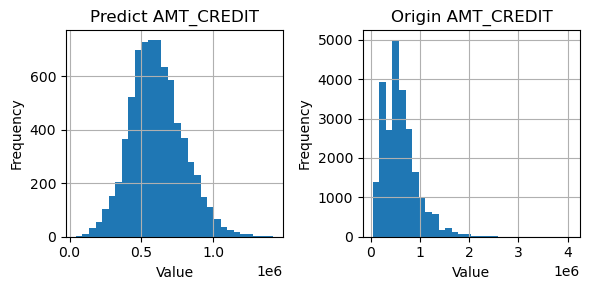

total_columns : 36
numeric_columns : 6
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 22
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag']
missing_values : 8
['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|█████████| 30/30 [01:02<00:00,  2.10s/trial, best loss: 0.5414628982543945]
Epoch 1/50
422/422 - 0s - loss: 0.6653 - mean_squared_error: 0.6653 - val_loss: 0.5566 - val

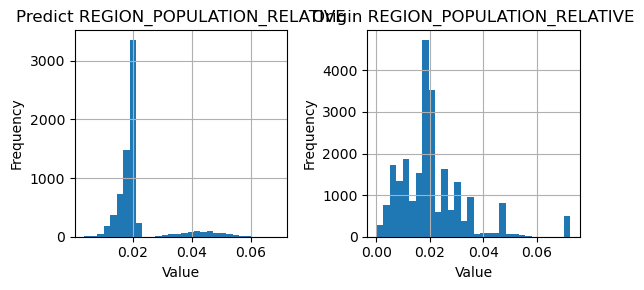

total_columns : 37
numeric_columns : 7
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 23
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag']
missing_values : 7
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|████████| 30/30 [01:09<00:00,  2.32s/trial, best loss: 0.49960556626319885]
Epoch 1/50
482/482 - 0s - loss: 0.5812 - mean_s

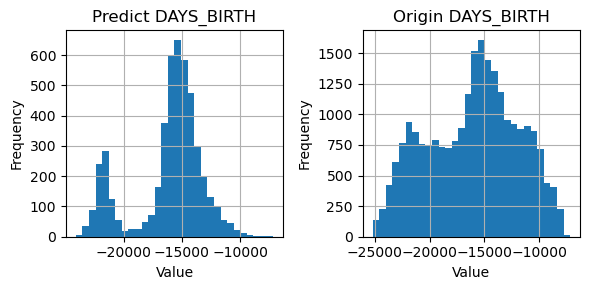

total_columns : 38
numeric_columns : 8
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 24
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag']
missing_values : 6
['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|█████████| 30/30 [00:55<00:00,  1.84s/trial, best loss: 0.7617270946502686]
Epoch 1/50
347/347

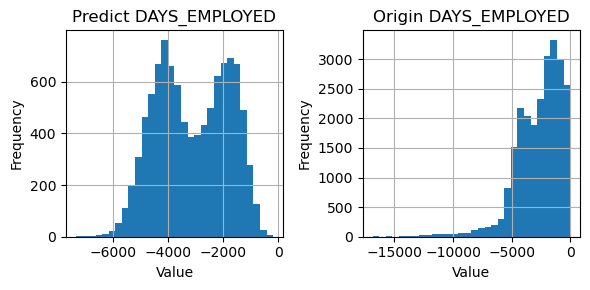

total_columns : 39
numeric_columns : 9
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 25
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag']
missing_values : 5
['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|██████████| 30/30 [00:56<00:00,  1.90s/trial, best loss: 0.825

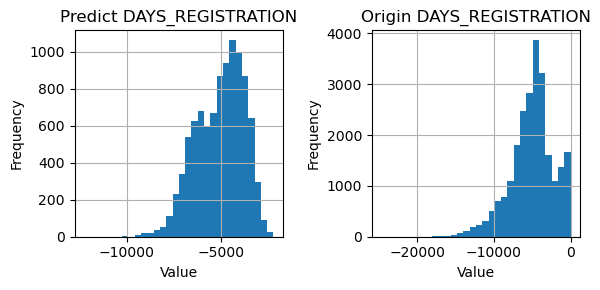

total_columns : 40
numeric_columns : 10
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 26
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag']
missing_values : 4
['DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|█████████| 30/30 [02:28<0

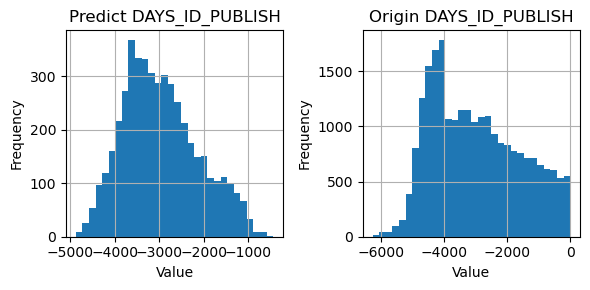

total_columns : 41
numeric_columns : 11
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 27
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag']
missing_values : 3
['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_

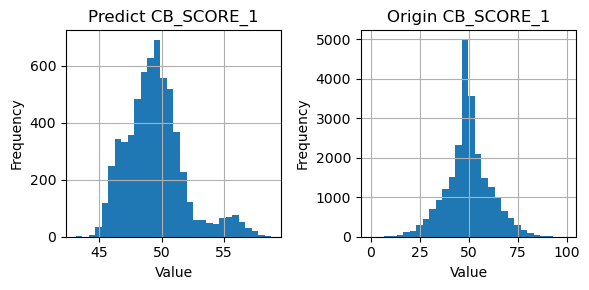

total_columns : 42
numeric_columns : 12
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'TARGET']
categorical_columns : 28
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag']
missing_values 

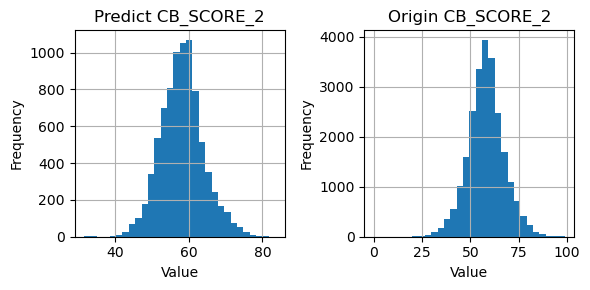

total_columns : 43
numeric_columns : 13
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'TARGET']
categorical_columns : 29
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag', '

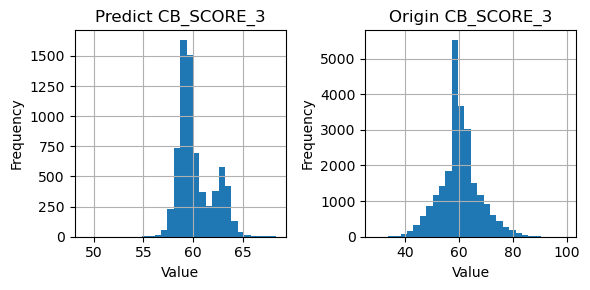

In [62]:
# 예측변수 다음예측에 사용
numeric_columns,categorical_columns,missing_values = columns_classification(data)
FILLED_DATA =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=50, batch_size_val=32 )
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=50, batch_size_val=32 )
FILLED_DATA.loc[FILLED_DATA['DAYS_EMPLOYED'] == 365243.0, [ 'DAYS_EMPLOYED']]  = np.nan

for i in range(len(missing_values)-1):
    numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
    FILLED_DATA =fill_numeric(FILLED_DATA, numeric_columns, categorical_columns, target_col_val=missing_values[0] ,epochs_val=50, batch_size_val=32 )

- #### 결측치 채우기 (Step 2)
    #### step 2에 의해 다범주 컬럼(organization type)에 대한 결측 대체 진행

In [63]:
# OG_TYPE 예측 
FILLED_DATA = FILLED_DATA.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

FILLED_DATA = FILLED_DATA.astype({'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object })

numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='ORGANIZATION_TYPE' ,epochs_val=50, batch_size_val=32 )

total_columns : 44
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 29
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag', 'CB_SCOR

> #### <font> ORGANIZATION_TYPE 범주형 변수의 클래스가 80개 이상일 경우, 30%의 정확도는 무작위 추측보다는 훨씬 좋음 </font>   
> #### <font> ※ 무작위 추측의 경우 정확도는 약 1.72% (100% / 58)  </font>
> #### <font> ▶ 30%의 정확도는 이에 비해 상당히 좋은 결과로 판단됨 </font>

### 1.10 각 결측 데이터간 비교 - AUC 기준 성능 평가 <a id="s-1.10">

- #### 데이터 유형(수치/범주)별 컬럼 list를 return 하는 함수 정의 

In [67]:
def columns_classification(data):
    # 주어진 데이터를 수치형, 범주형, 결측치가 있는 컬럼으로 분류하여 뱉어냄.
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].index.to_list()
    numeric_columns = numeric_columns.to_list()
    numeric_columns = [x for x in numeric_columns if x not in missing_values]
    categorical_columns = categorical_columns.to_list()
    categorical_columns = [x for x in categorical_columns if x not in missing_values]
    print('total_columns : ' + str(len(data.columns)))
    print('numeric_columns : ' + str(len(numeric_columns)))
    print(numeric_columns)
    print('categorical_columns : '+ str(len(categorical_columns)))
    print(categorical_columns)
    print('missing_values : '+ str(len(missing_values)))
    print(missing_values)
    return numeric_columns,categorical_columns,missing_values

- #### 데이터 input시 training, test set 나눠주는 함수 정의

In [68]:
def Make_model_inputdata(Data):
    numeric_columns,categorical_columns,missing_values = columns_classification(Data)
    columns_to_exclude = ['SK_ID_CURR','TARGET']
    input_numeric_columns = [x for x in numeric_columns if x not in columns_to_exclude]
    X = Data[input_numeric_columns + categorical_columns].copy()
    y = Data['TARGET']
    # 범주형 변수 인코딩
    encoder = LabelEncoder()
    for col in categorical_columns:
        X[col] = encoder.fit_transform(X[col])
    # 데이터 스케일링
    scaler = StandardScaler()
    X[input_numeric_columns] = scaler.fit_transform(X[input_numeric_columns])
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=42)
    
    return  X_train, X_valid, y_train, y_valid

- #### 데이터 input시 training, test set 나눠주는 함수 정의

In [97]:
# 저장하기

# 저장하기
import pickle
# 데이터를 pickle 파일로 저장
file_path = "C:/Users/mlosv/Downloads/23.08.22 데이터분석경진대회/filled_data_vf.pkl"
with open(file_path, "wb") as file:
    pickle.dump(FILLED_DATA, file)


In [98]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

AttributeError: 'tuple' object has no attribute 'select_dtypes'

In [37]:
from sklearn.ensemble import RandomForestClassifier
# Train a RandomForest model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train,y_train)

ModuleNotFoundError: No module named 'lightgbm'

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_rf = random_forest_model.predict(X_valid)
models = ['Random Forest']
predictions = [y_pred_rfb]

for i,model in enumerate(models):
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_valid,predictions[i]))
    print("Precision:", precision_score(y_valid,predictions[i]))
    print("Recall:", recall_score(y_valid,predictions[i]))
    print("F1-Score:", f1_score(y_valid,predictions[i]))
    # For AUC-ROC score we need probability estimates of the positive class
    # Not all models have a predict_proba method (like SVC), hence we check if it exists
    if hasattr(eval(model.lower().replace(' ', '_')+'_model'), "predict_proba"):
        print("AUC-ROC:", roc_auc_score(y_valid,
              eval(model.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
        print()

NameError: name 'random_forest_model' is not defined

---

## 2. 데이터 시각화  <a id="s-2">

> <font> <b> 1. 변수 간 상관 관계 </b> </font>   
    >  <font> 변수들 사이의 상관 관계를 조사하여 어떤 변수가 다른 변수와 연관되어 있는지 파악. </font>   
    >  <font> 상관 행렬(correlation matrix), 산점도(scatter plot), 히트맵(heatmap) 등을 사용하여 시각화 </font> 

> <font> <b> 2. 시각화 </b> </font>   
    >  <font> 그래프나 차트를 생성하여 데이터 패턴과 인사이트를 시각적으로 파악. </font>   
    >  <font> 막대 그래프(bar plot), 히스토그램(histogram), 상자 그림(box plot), 선 그래프(line plot), 산점도(scatter plot) 등 다양한 시각화 기법이 활용 </font>   


> <font> <b> 3. 가설 설정 및 검증 </b> </font>   
    >  <font> EDA 결과를 바탕으로 가설(Hypothesis)을 설정하고 검증하는 단계로 진행. </font>   

> <font> <b> EDA는 독립적인 분석 단계로서만 수행되는 것이 아니라 전체 데이터 과학 프로세스에서 반복적으로 활용 </b> </font>  
> <font> <b> ▶ EDA 결과에 따라 추가적인 전처리 작업이나 모델링 방법 선택에 영향 </b> </font>   

### 2-1. 시각화 전단계 : 컬럼별 유형 탐색 <a id="s-2.1">

In [2]:
import pickle 

In [3]:
# 불러오기
# pickle 파일 불러오기
file_path = "filled_data_vf.pkl" # @@ 수정 필요할 것 
with open(file_path, "rb") as file:
    FILLED_DATA = pickle.load(file)

In [4]:
data1 = FILLED_DATA.copy()
#data1.head()
data1.dtypes

NAME_CONTRACT_TYPE                            object
CODE_GENDER                                   object
FLAG_OWN_REALTY                               object
CNT_CHILDREN                                   int64
AMT_INCOME_TOTAL                             float64
AMT_CREDIT                                   float64
NAME_INCOME_TYPE                              object
NAME_EDUCATION_TYPE                           object
NAME_FAMILY_STATUS                            object
NAME_HOUSING_TYPE                             object
REGION_POPULATION_RELATIVE                   float64
DAYS_BIRTH                                   float64
DAYS_EMPLOYED                                float64
DAYS_REGISTRATION                            float64
DAYS_ID_PUBLISH                              float64
FLAG_EMP_PHONE                                object
FLAG_WORK_PHONE                               object
FLAG_PHONE                                    object
FLAG_EMAIL                                    

In [19]:
normal_categorical_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                               'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4']
long_categorical_features = ['ORGANIZATION_TYPE']#'REGION_POPULATION_RELATIVE']
time_features = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
key_features = ['SK_ID_CURR','FLAG_MOBIL'] # 무의미한 식별키 및 단일값 컬럼은 제외
target_features = ['TARGET']
flag_features =['CODE_GENDER_predicted_flag',
 'FLAG_OWN_REALTY_predicted_flag',
 'AMT_CREDIT_predicted_flag',
 'REGION_POPULATION_RELATIVE_predicted_flag',
 'DAYS_BIRTH_predicted_flag',
 'DAYS_EMPLOYED_predicted_flag',
 'DAYS_REGISTRATION_predicted_flag',
 'DAYS_ID_PUBLISH_predicted_flag',
 'CB_SCORE_1_predicted_flag',
 'CB_SCORE_2_predicted_flag',
 'CB_SCORE_3_predicted_flag',
 'ORGANIZATION_TYPE_predicted_flag']
# Combine all non-numerical features into one list
non_numerical_features = normal_categorical_features +long_categorical_features +time_features + key_features + target_features + flag_features

# Select numerical features by excluding non-numerical ones
numerical_features = [col for col in data1.columns if col not in non_numerical_features]
numerical_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

- #### 시각화 자료 내 텍스트 한글화

In [150]:
plt.rcParams['font.family'] = 'Malgun Gothic' #'AppleGothic'

### 2-2. 타겟변수 파악  <a id="s-2.2">

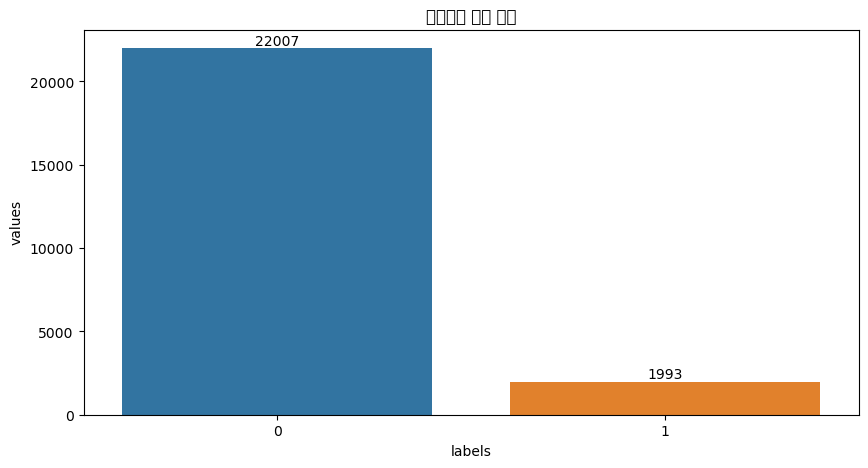

In [20]:
temp = data1["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize=(10, 5))
plt.title('연체유무 건수 현황')  # 'Payment Delayed - train data'
sns.set_color_codes("pastel")
ax = sns.barplot(x='labels', y="values", data=df)

# Add count values to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

> #### <font> Target=0 대출건 : 대출분할 지불이 한번이라도 지연되지 않은 정상 계좌 건. </font>
> #### <font> Target=1 대출건 : 지불 지연이 한번이라도 발생된 계좌 건 </font>
> #### <font> ▶ 각각 계좌건의 상태 별로 특정 변수들과 비추었을때 분포가 어떠한지 파악할 필요가 있음 </font>

### 2-3. 연체여부별 범주형 변수 분포 파악 <a id="s-2.3">

- #### Bar plot (count 및 타겟 여부 ratio) ※ 범주형 컬럼에 적용

In [21]:
def plot_stats_v(df, feature_list):
    nrows = len(feature_list)
    for i, feature in enumerate(feature_list):

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

        category_order = df[feature].value_counts().index.tolist()
        plt.xticks(rotation=45)

        # 변경된 팔레트 순서: ['skyblue', 'orange']
        count_plot = sns.countplot(x=feature,
                                   hue='TARGET', data=df,
                                   order=category_order,
                                   ax=ax[0], palette=['skyblue', 'orange'])


        # 숫자를 추가하기 위한 반복문
        for rect in count_plot.patches:
            height = rect.get_height()
            width = rect.get_width()
            x_coord = rect.get_x()
            y_coord = height + 5

            # 막대 위에 숫자 표시
            count_plot.annotate(f'{int(height)}', (x_coord + width/2, y_coord),
                                ha='center', va='bottom')
        
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
        ax[0].set_title(f'{feature}({column_info[feature]}) 도수분포표')
        ax[0].set_xlabel(' ')
        ax[0].set_ylabel(' ')

        df_grouped = df.groupby([feature])['TARGET'].value_counts(normalize=True).rename('percentage(%)').reset_index()
        df_grouped['percentage(%)'] = df_grouped['percentage(%)'] * 100

        bar_chart_df = pd.DataFrame(columns=['Category', 'Target_0_Percentage', 'Target_1_Percentage'])

        for j, category in enumerate(category_order):
            temp_df = df_grouped[df_grouped[feature] == category]

            if df['TARGET'].dtype == 'int64':
                target_0_percentage_values = temp_df[temp_df['TARGET'] == 0]['percentage(%)'].values 
                target_1_percentage_values = temp_df[temp_df['TARGET'] == 1]['percentage(%)'].values 
            else:
                target_0_percentage_values = temp_df[temp_df['TARGET'] == '0']['percentage(%)'].values 
                target_1_percentage_values = temp_df[temp_df['TARGET'] == '1']['percentage(%)'].values 

            target_0_percentage = target_0_percentage_values[0] if len(target_0_percentage_values) > 0 else 0
            target_1_percentage = target_1_percentage_values[0] if len(target_1_percentage_values) > 0 else 100 - target_0_percentage

            bar_chart_df.loc[j] = [category, target_0_percentage, target_1_percentage]

        category_order2 = df[feature].value_counts().index.tolist()[::-1]

        bar_chart_sorted = bar_chart_df.set_index('Category').loc[category_order].reset_index()
        bar_chart_sorted2 = bar_chart_df.set_index('Category').loc[category_order2].reset_index()

        bars = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_0_Percentage"], color='skyblue')
        bars2 = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_1_Percentage"], bottom=bar_chart_sorted["Target_0_Percentage"], color='orange')

        for bar in bars2:
            height = bar.get_height()
            width = bar.get_width()
            x_coord = bar.get_x() + width / 2
            y_coord = 100
            ax[1].annotate(f'{int(height)}%', (x_coord, y_coord),
                           ha='center', va='bottom')

        if set(bar_chart_sorted['Category'].unique()).issubset({0, 1}):
            plt.xticks([0, 1])

        ax[1].set_title(f'{feature}({column_info[feature]}) 범주별 연체율')
        ax[1].set_xlabel(' ')
        ax[1].set_ylabel(' ')

    plt.tight_layout(pad=3.03)
    plt.show();

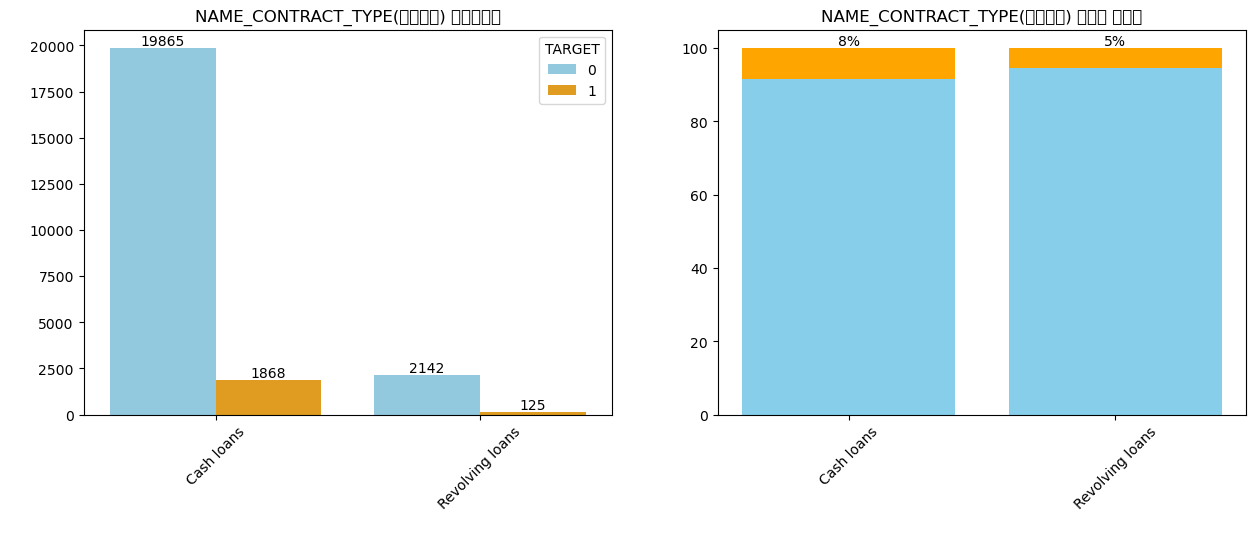

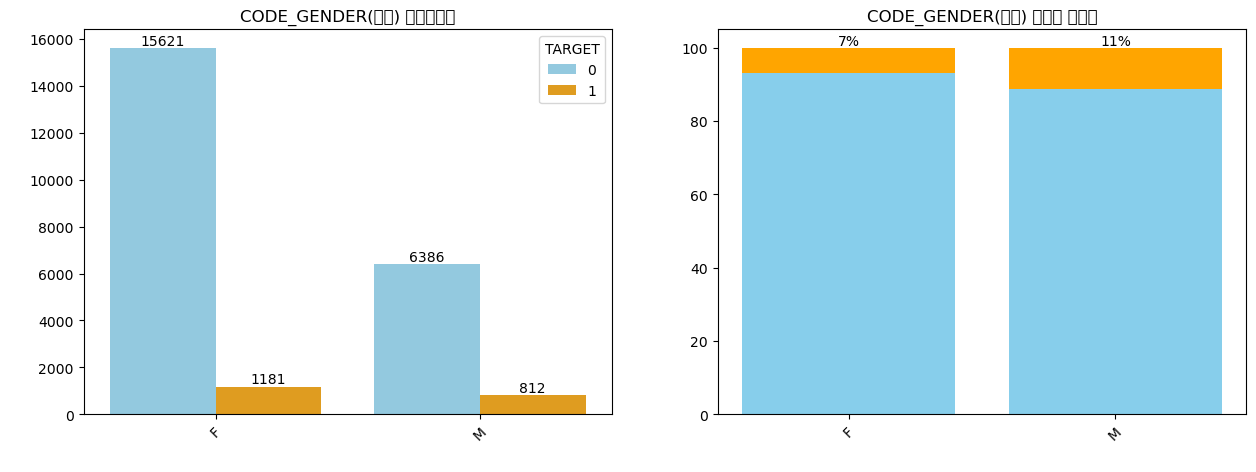

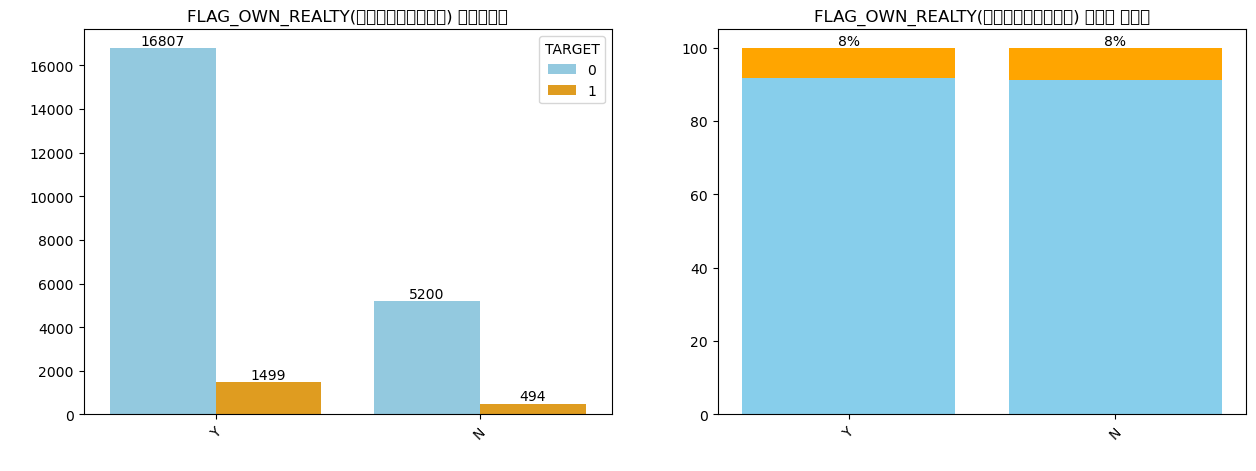

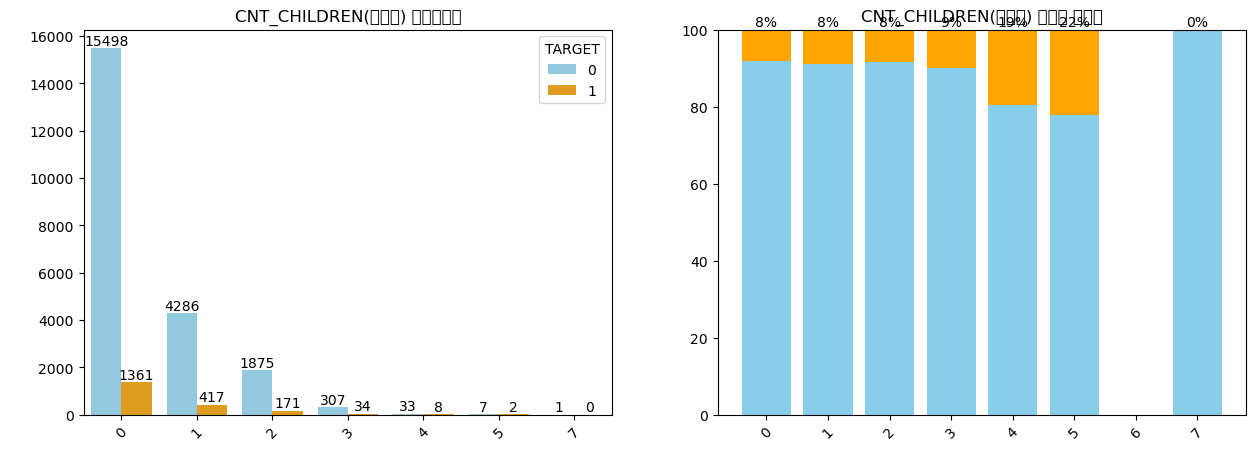

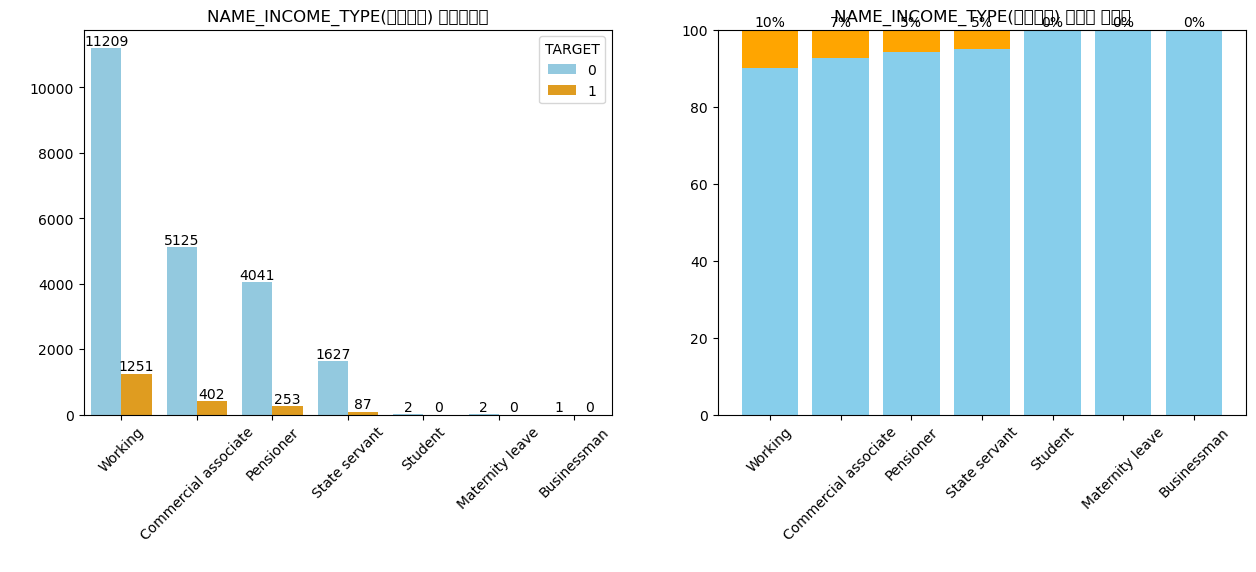

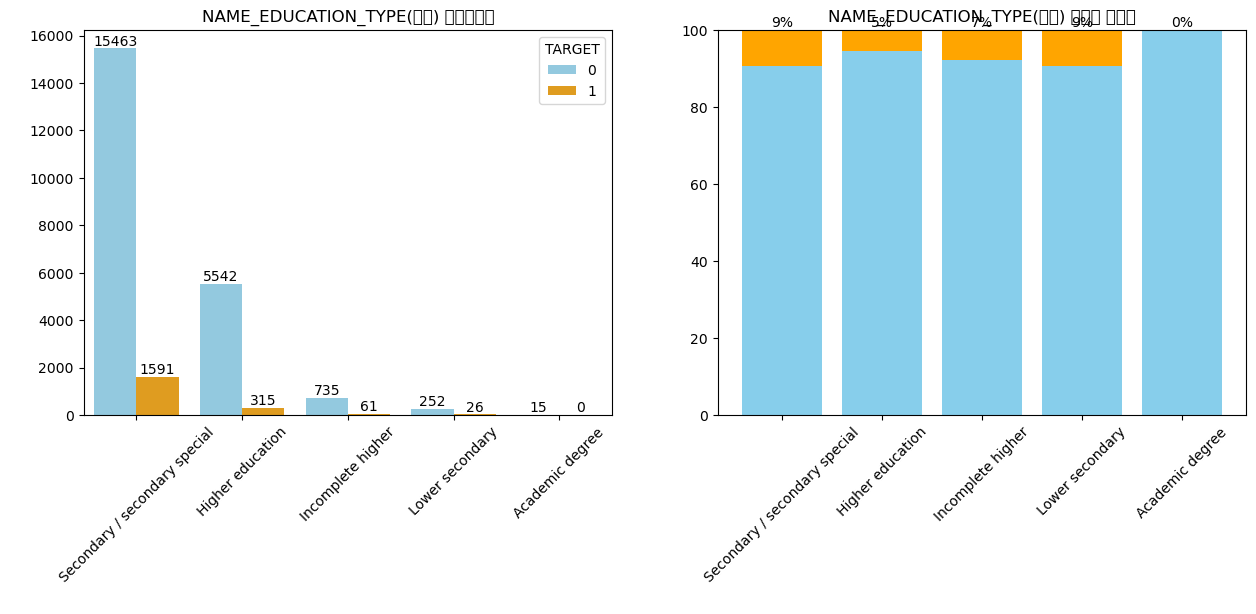

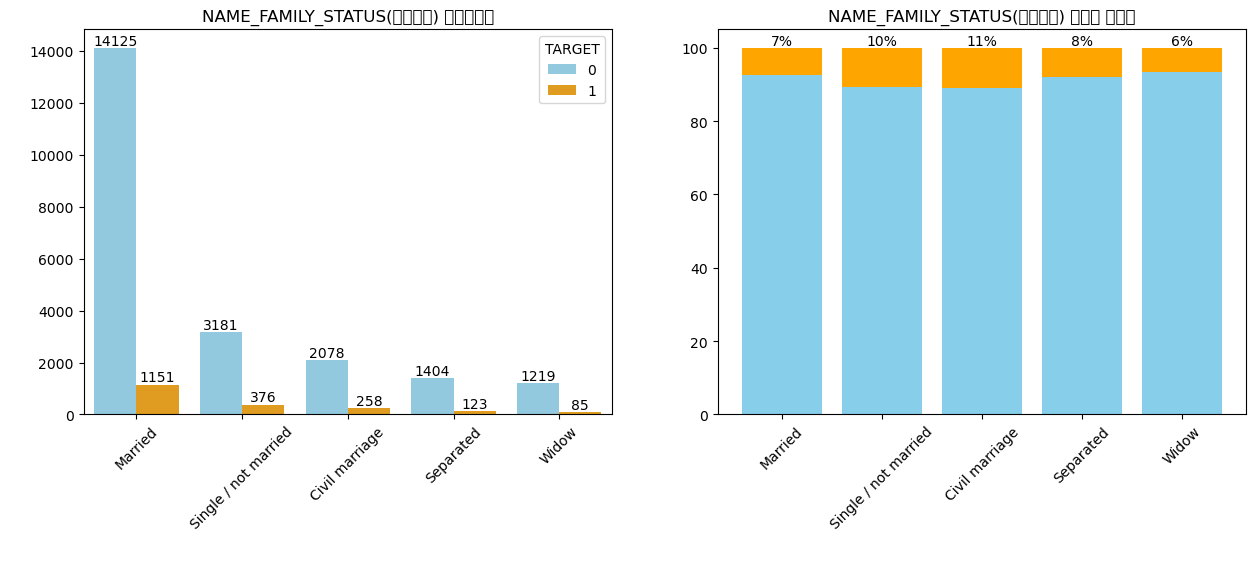

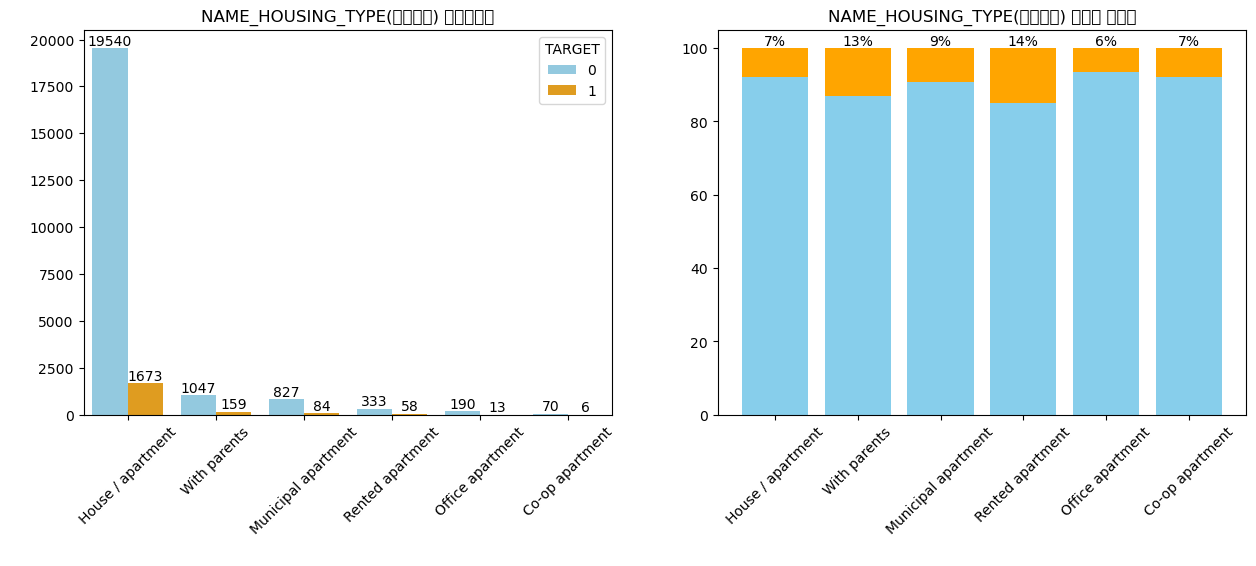

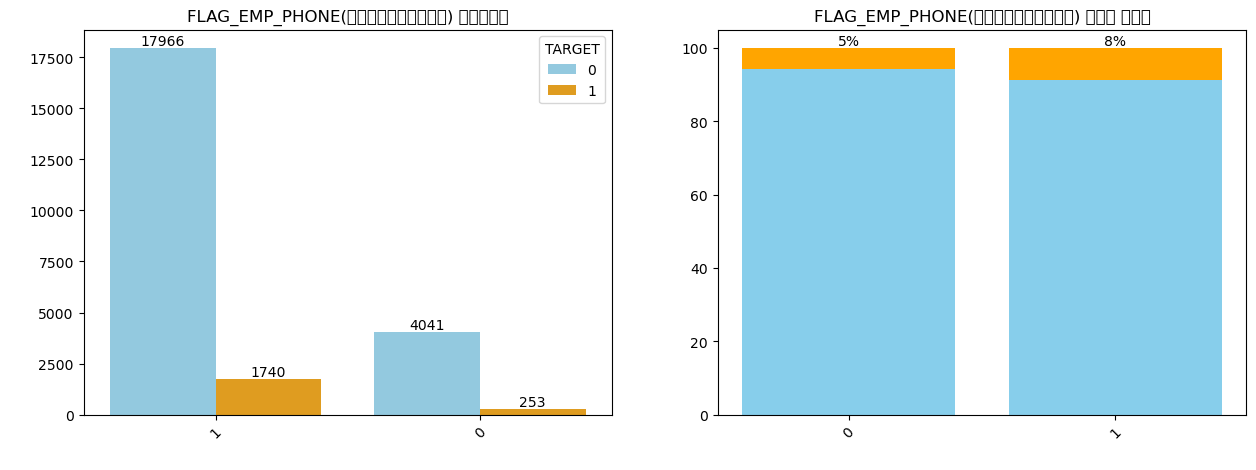

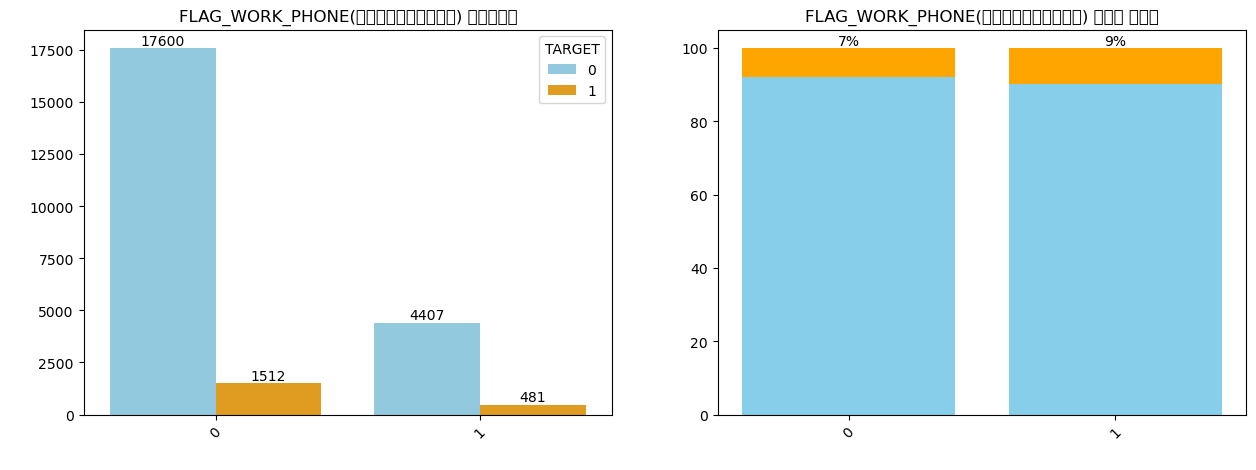

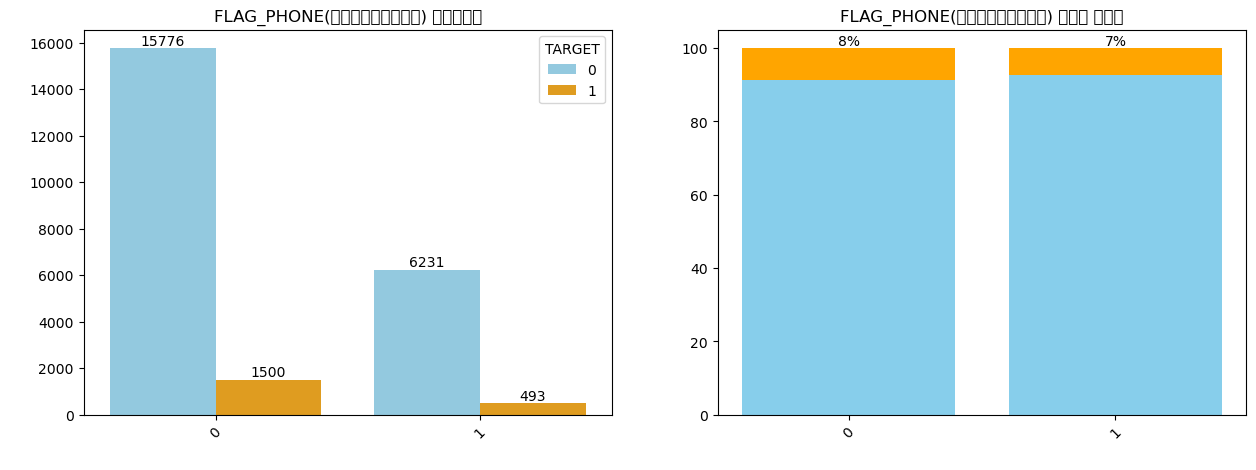

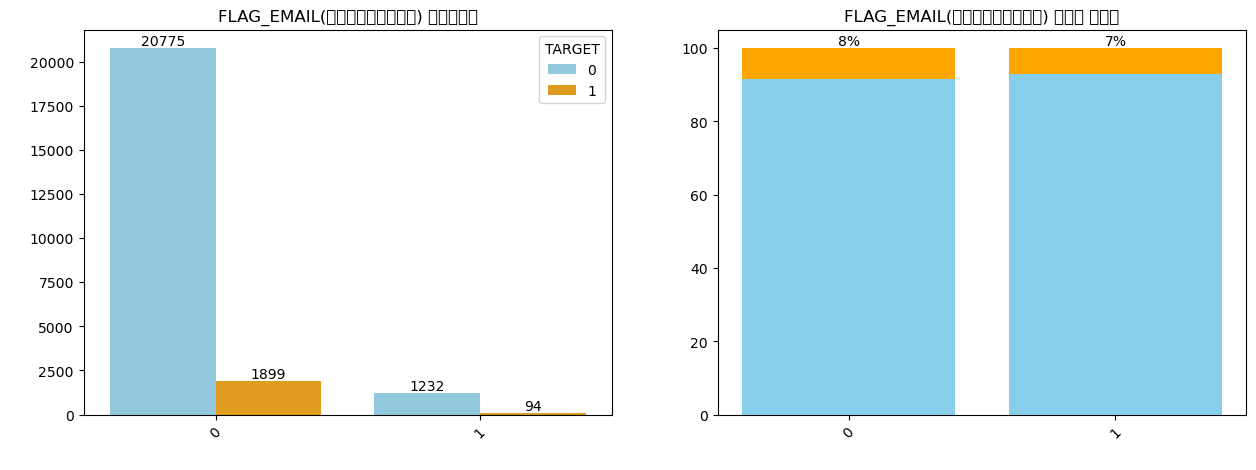

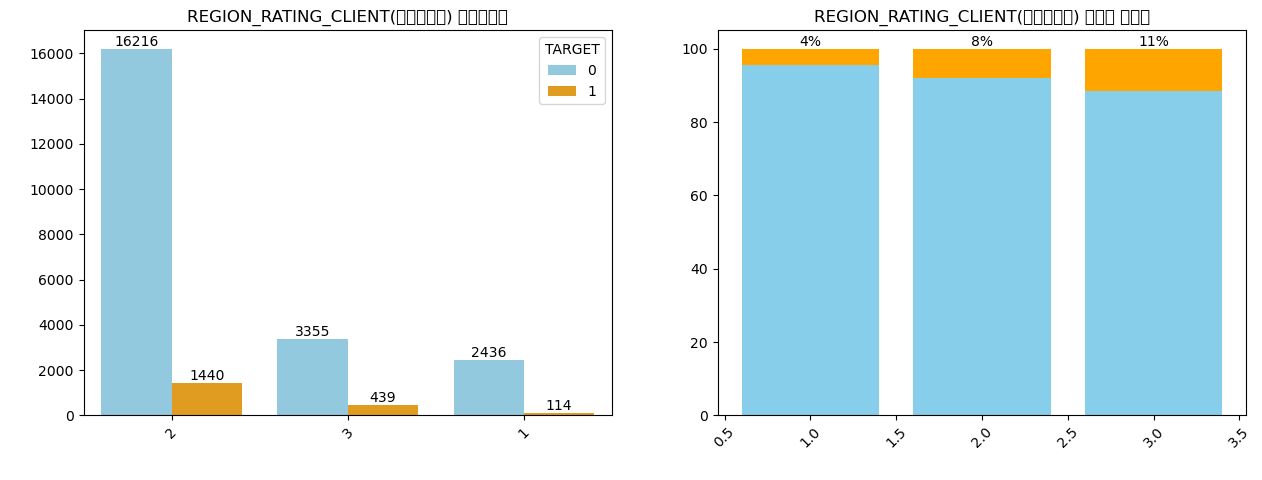

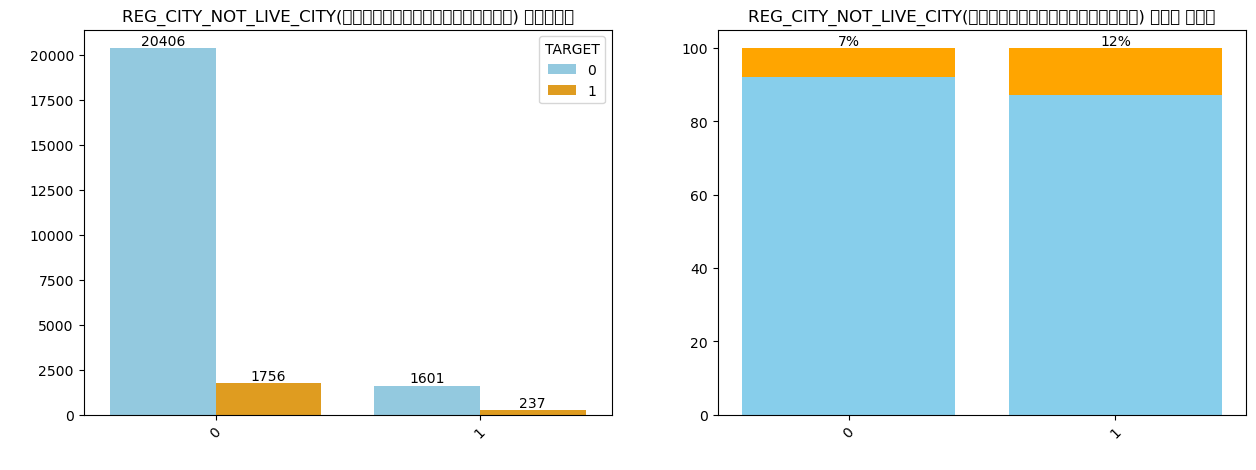

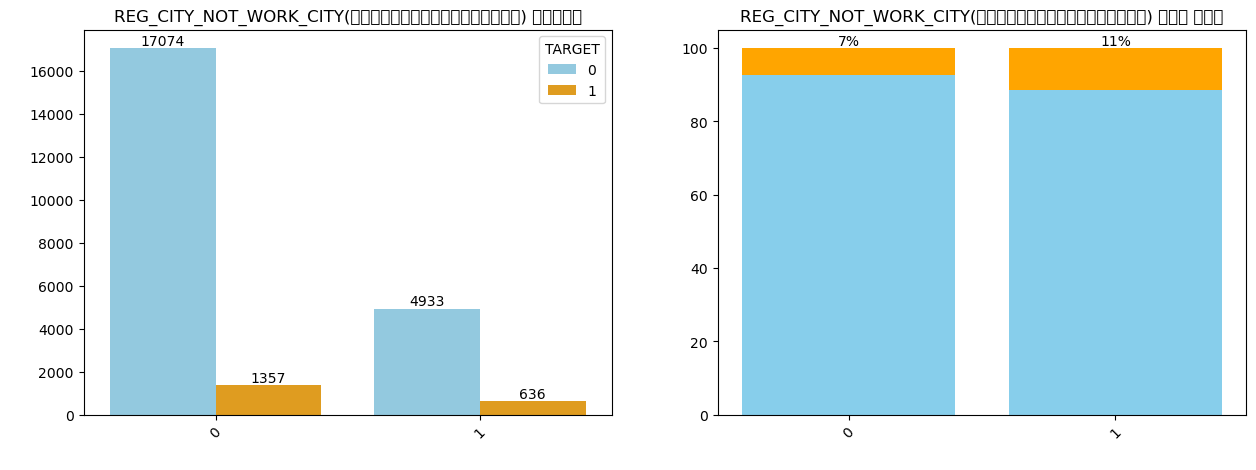

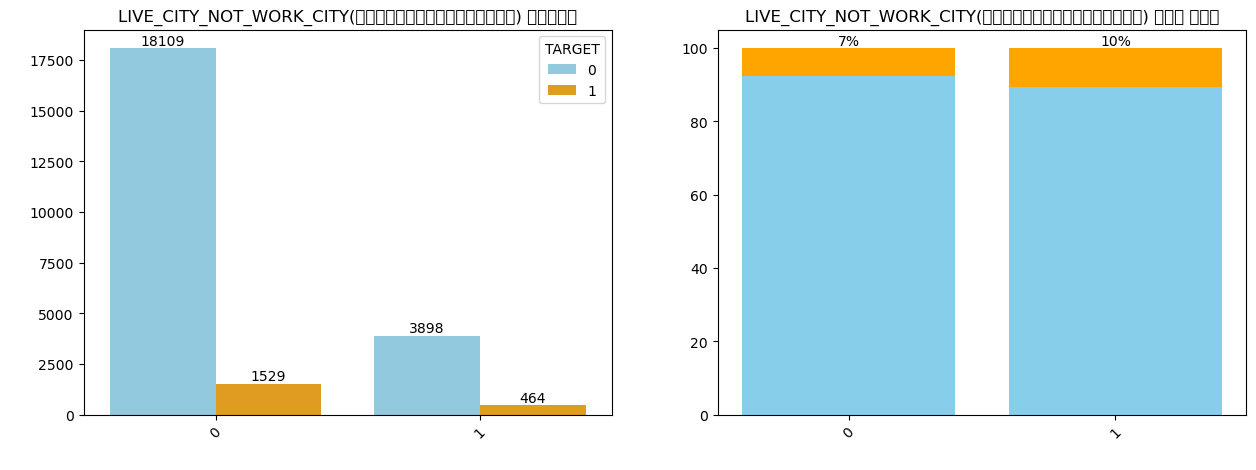

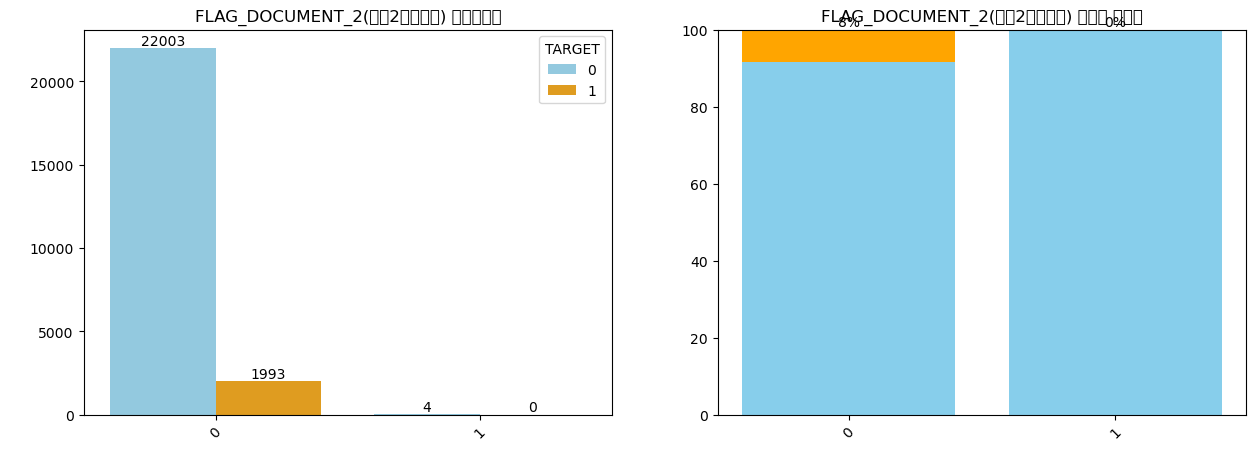

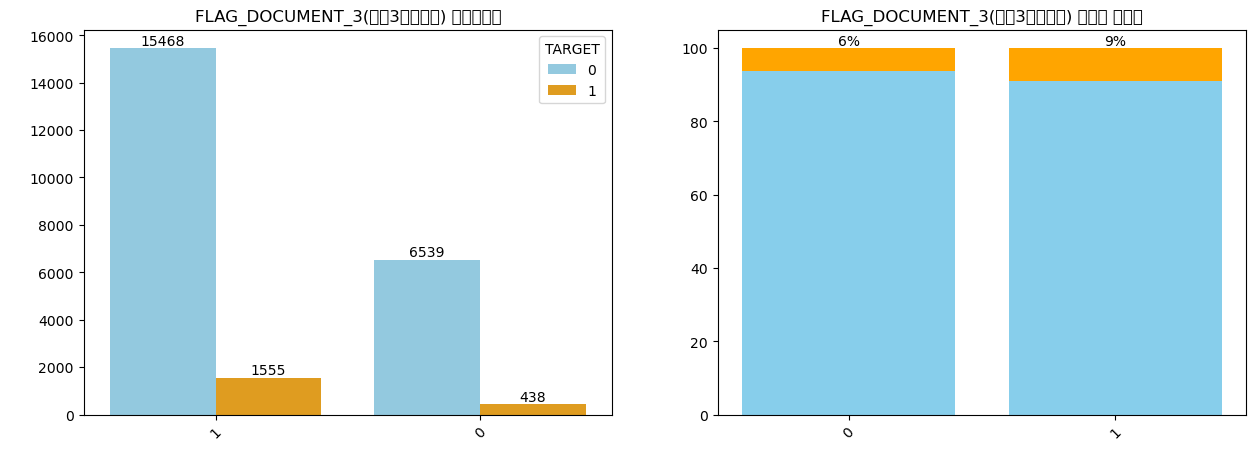

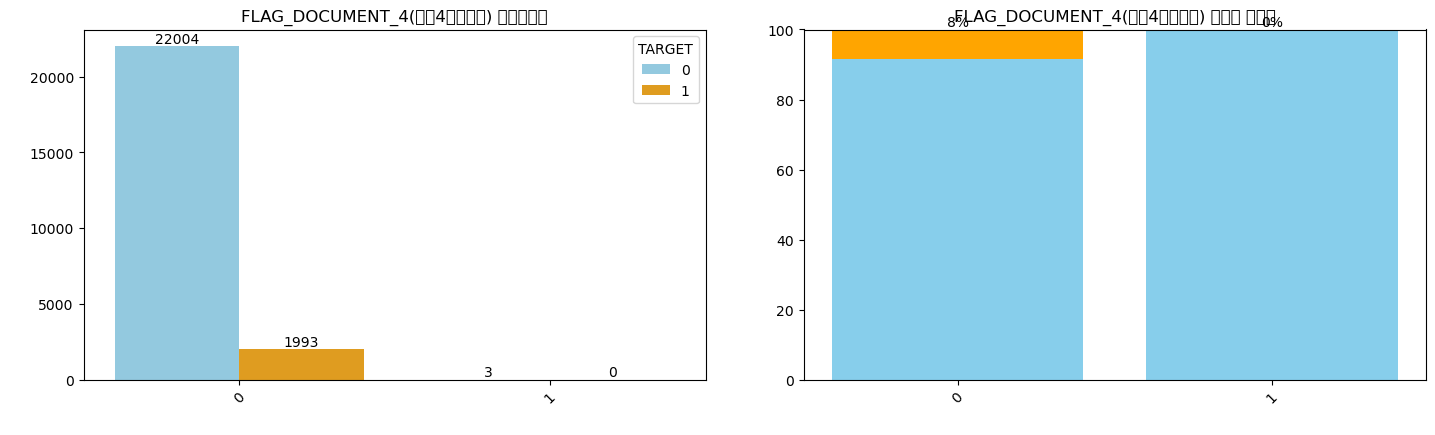

In [22]:
plot_stats_v(data1, normal_categorical_features) # 숫자 표시 추가 

> #### <font> barplot을 참고해 대부분의 범주형 변수에서 연체율 차이가 있음을 확인 </font>

> #### <font> 각 특성별 연체율이 상대적으로 높은 범주, 특정 범주에대해 대출발생건수가 너무 작은 건에 대한 연체비율은 고려하지 않음 </font>  
        > ▶ NAME_CONTACT_TYPE : Cash Loans > Revolving loans   
        > ▶ CODE_GENDER : 남성 > 여성           
        > ▶ CNT_CHILDREN : 다자녀인 그룹  
        > ▶ NAME_INCOME_TYPE : Working 그룹   
        > ▶ NAME_EDUCATION_TYPE : Secondary / secondary special 및 lower secondary 그룹  
        > ▶ NAME_FAMILY_STATUS : Single / not married 및 Civil married 그룹  
        > ▶ NAME_HOSING_TYPE : 렌트 아파트 및 부모님과 거주하는 그룹   
        > ▶ REGION_RATING_CLIENT : 거주지 등급이 낮은 (3등급) 그룹  
        > ▶ REG_CITY_NOT_LIVE_CITY : 고객의등록지주소와실거주지가 불일치(1)하는 그룹  
        > ▶ LIVE_CITY_NOT_LIVE_CITY : 고객의실거주지와직장주소가 불일치(1)하는 그룹  
        

### 2-4. 다범주 변수(ORGANIZATION TYPE)의 연체율 현황 파악 <a id="s-2.4">

In [25]:
def plot_top_categories(df, feature, target='TARGET', top_n=20):
    # Get top categories by count
    top_categories = df[feature].value_counts().index[:top_n]

    # Filter dataframe to include only top categories
    df_top_categories = df[df[feature].isin(top_categories)]

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
    
    # Plot countplot for the feature by TARGET (top)
    sns.countplot(data=df_top_categories,
                  y=feature,
                  hue=target,
                  order=top_categories,
                  ax=axes[0],
                  palette=['skyblue', 'orange'])

    axes[0].set_title(f'그림 1. Count of {feature} by {target}')

    # Add count values to the bar plot
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center',
                         xytext=(5, 0), textcoords='offset points')

    # Calculate percentage of each category by TARGET
    grouped = (df_top_categories.groupby(feature)[target]
               .value_counts(normalize=True)
               .rename('percentage')
               .mul(100)
               .reset_index()
               .sort_values(feature))
    
    # Sort by the percentage of TARGET == 1 (defaulting for cases where TARGET == 1 does not exist)
    grouped_sorted = grouped[grouped[target] == 1].sort_values(by='percentage', ascending=False)
    order_sorted = grouped_sorted[feature].values

    # Plot percentage of each category by TARGET (bottom)
    sns.barplot(x="percentage", y=feature, hue=target, data=grouped,
                order=order_sorted,
                ax=axes[1],
                palette=['skyblue', 'orange'])
    # Add labels to the bars
    for patch in axes[1].patches:
        x_coord = patch.get_width()
        y_coord = patch.get_y() + patch.get_height() / 2

        axes[1].annotate(f'{x_coord:.2f}%', (x_coord, y_coord),
                         ha='center', va='center')
    axes[1].set_title(f'그림 2. Percentage of {target} in each {feature}')

    plt.tight_layout()
    plt.show()


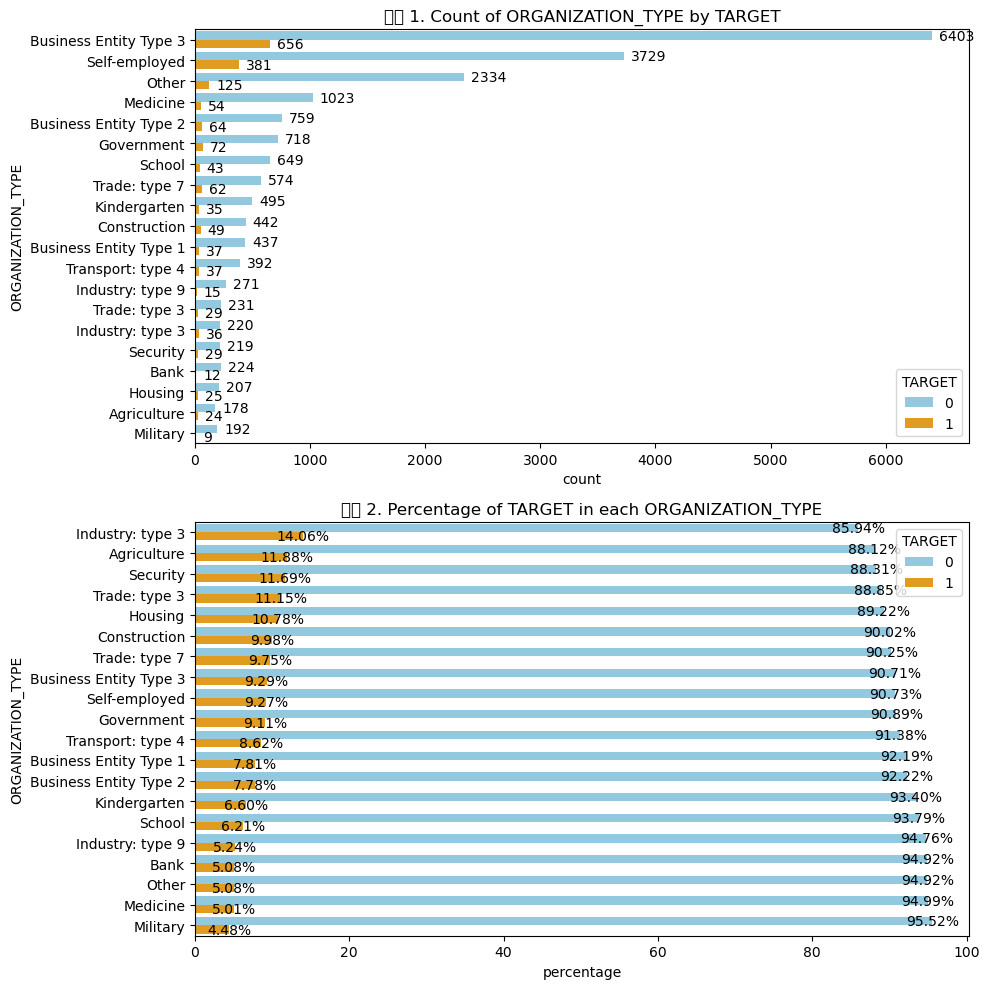

In [26]:
plot_top_categories(data1, 'ORGANIZATION_TYPE')

> #### <font> 그림 1. 직업 유형 총 약 50개 중 차지 비중이 높은 상위 10개 직업 시각화 </font>
> #### <font> 그림 2. 연체율이 높은 상위 10개 직업 시각화  </font>

> #### <font> 직업 종류별로 연체율에 명확히 차이가 있음을 확인 </font> 
> #### <font color = blue> ▶ [파생변수 Insight] 연체율이 높은 직업군끼리 Grouping 진행 </font> 

In [27]:
# 계산된 연체율을 저장할 새로운 열 추가
data1['Default_Rate'] = data1.groupby('ORGANIZATION_TYPE')['TARGET'].transform('mean')

# 연체율 기준으로 범주 묶기
bins = pd.qcut(data1['Default_Rate'], q=10, labels=False, duplicates='drop')
data1['Grouped_ORGANIZATION_TYPE'] = bins.apply(lambda x: f'Group_{x+1}')

# 기존 열과 불필요한 열 제거
# data = data.drop(['ORGANIZATION_TYPE', 'Default_Rate'], axis=1)

# 결과 확인
print(data1['Grouped_ORGANIZATION_TYPE'].value_counts())

Group_5    7059
Group_4    5974
Group_1    4463
Group_3    2466
Group_7    2051
Group_6    1368
Group_2     619
Name: Grouped_ORGANIZATION_TYPE, dtype: int64


In [28]:
grouped_org_types = data1.groupby('Grouped_ORGANIZATION_TYPE')['ORGANIZATION_TYPE'].unique() # 어떤 직업군이 들어갔는지 확인

In [29]:
data1.groupby('Grouped_ORGANIZATION_TYPE')['TARGET'].mean()

Grouped_ORGANIZATION_TYPE
Group_1    0.048398
Group_2    0.051696
Group_3    0.069343
Group_4    0.090726
Group_5    0.092931
Group_6    0.097953
Group_7    0.117991
Name: TARGET, dtype: float64

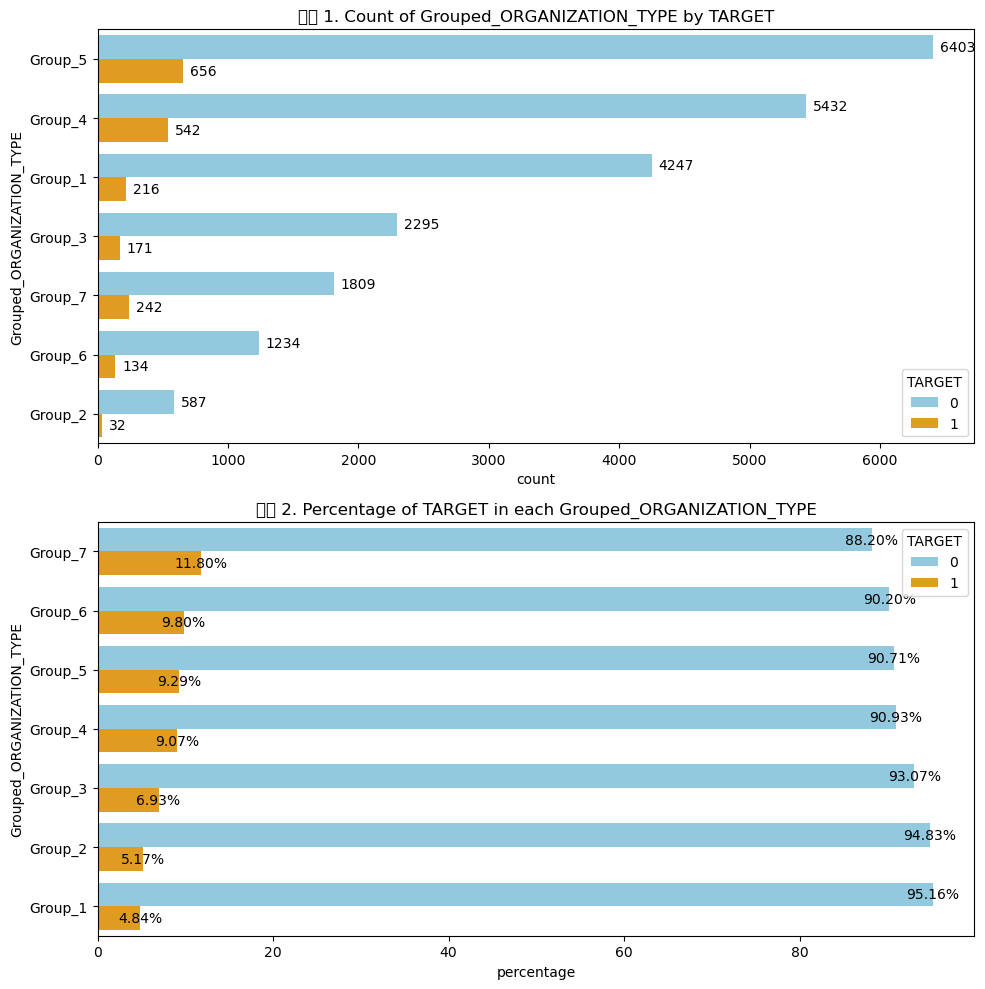

In [30]:
plot_top_categories(data1, 'Grouped_ORGANIZATION_TYPE')

> #### <font color = blue> 10개 범주로 Grouping한 결과, 각 직업 Group별 N수가 충분히 확보된 상태에서 Group별 연체율 차이가 명확함을 확인 </font>

### 2-5. 연체여부별 수치형 변수 분포 파악 <a id="s-2.5">

- #### Histogram / Box plot - 수치형 컬럼에 적용

In [31]:
def plot_histogram_boxplot(df, columns, group_option):
    sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일
    custom_palette = ["navy", "blue"]
    plt.rcParams['font.family'] = 'Malgun Gothic' 

    for column in columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

        # 히스토그램 그리기
        if group_option == True : 
            sns.histplot(data=df, x=column, hue='TARGET', kde=True, ax=axes[0], palette=custom_palette)
        else : 
            sns.histplot(data=df, x=column, kde=True, ax=axes[0], palette=custom_palette)
    
        axes[0].set_title(f'{column}({column_info[column]})의 데이터 분포')
        axes[0].set_xlabel(' ')
        axes[0].set_ylabel('빈도')

        # 상자 그림 그리기
        if group_option == True : 
            sns.boxplot(data=df, x='TARGET', y=column, ax=axes[1], palette=custom_palette)
        else : 
            sns.boxplot(data=df, y=column, ax=axes[1], palette=custom_palette)    
        
        axes[1].set_title(f'연체그룹별 {column}({column_info[column]})의 상자 그림')
        axes[1].set_xlabel(' ')
        axes[1].set_ylabel(' ')

        plt.tight_layout()
        plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

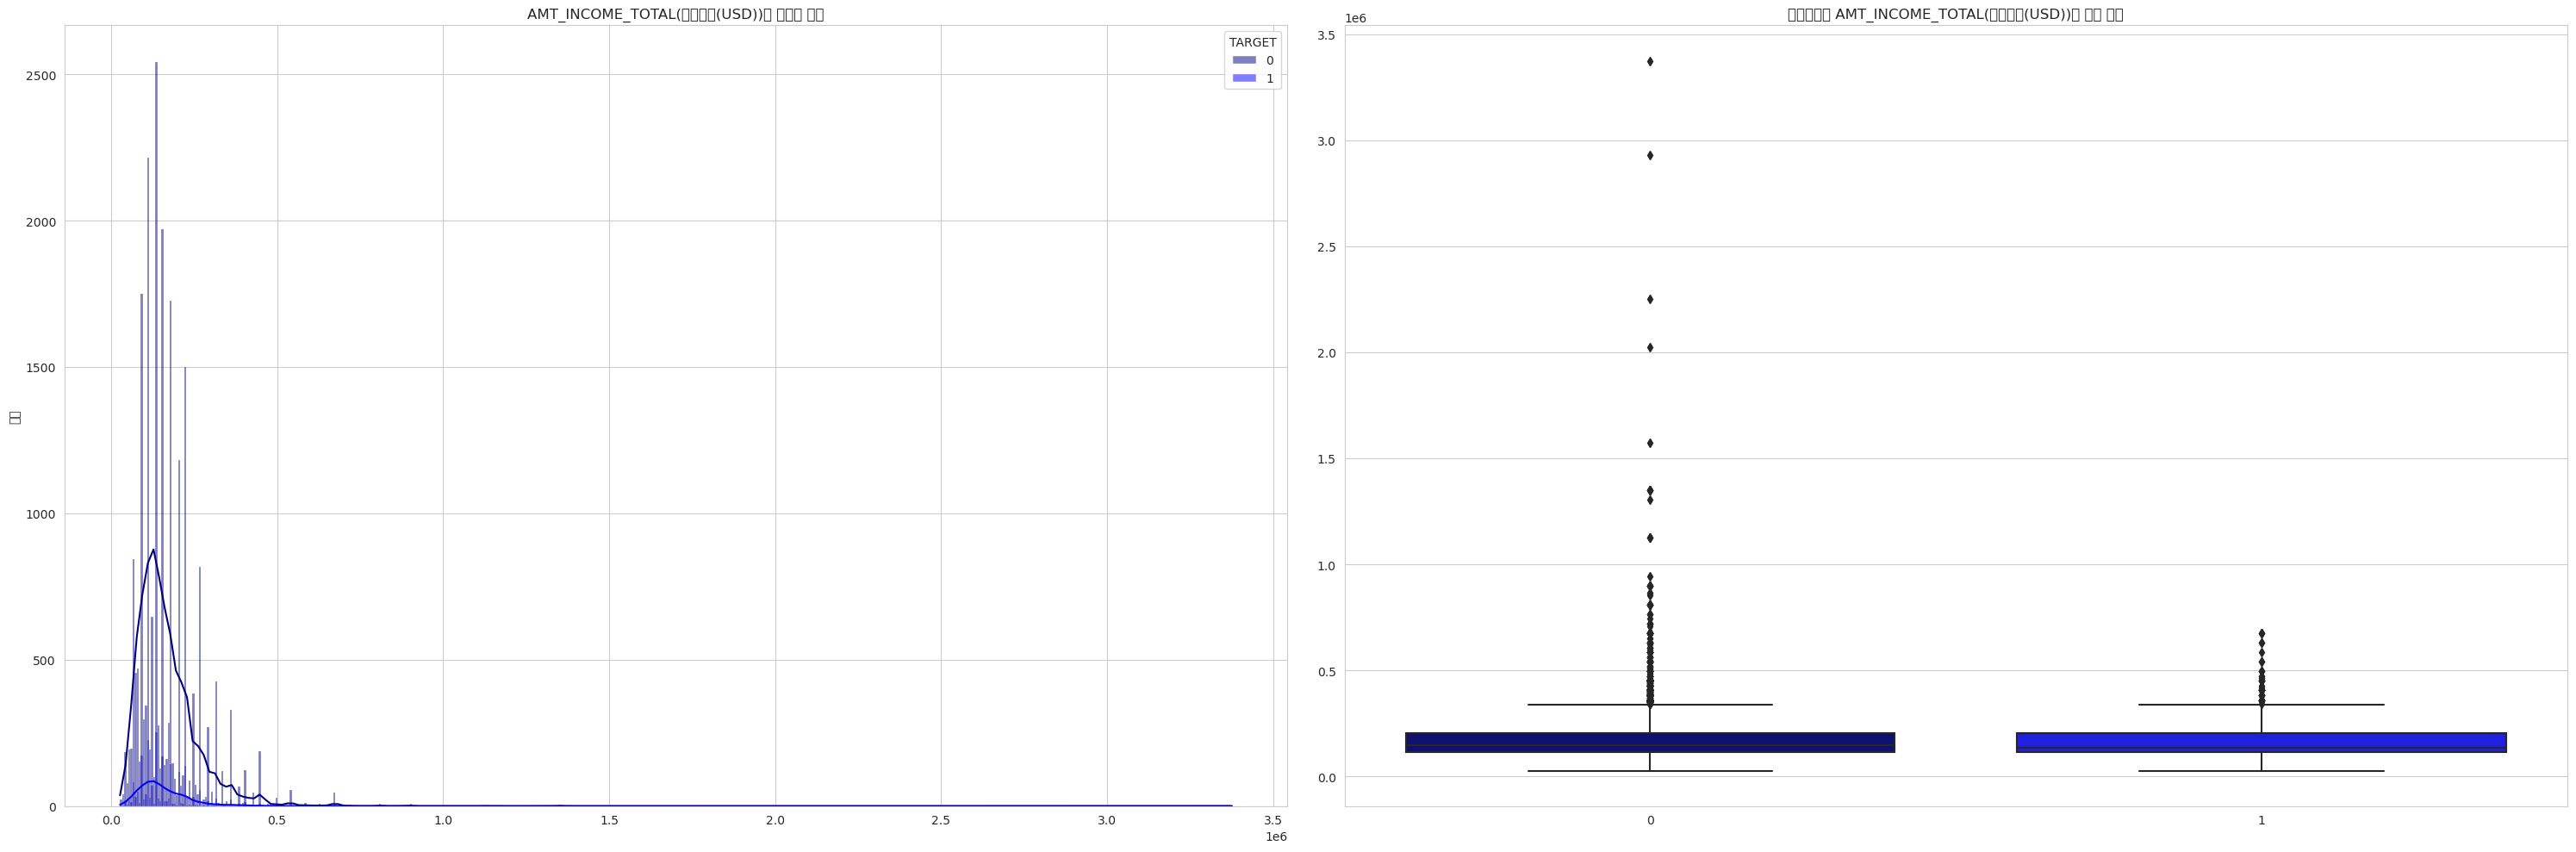

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

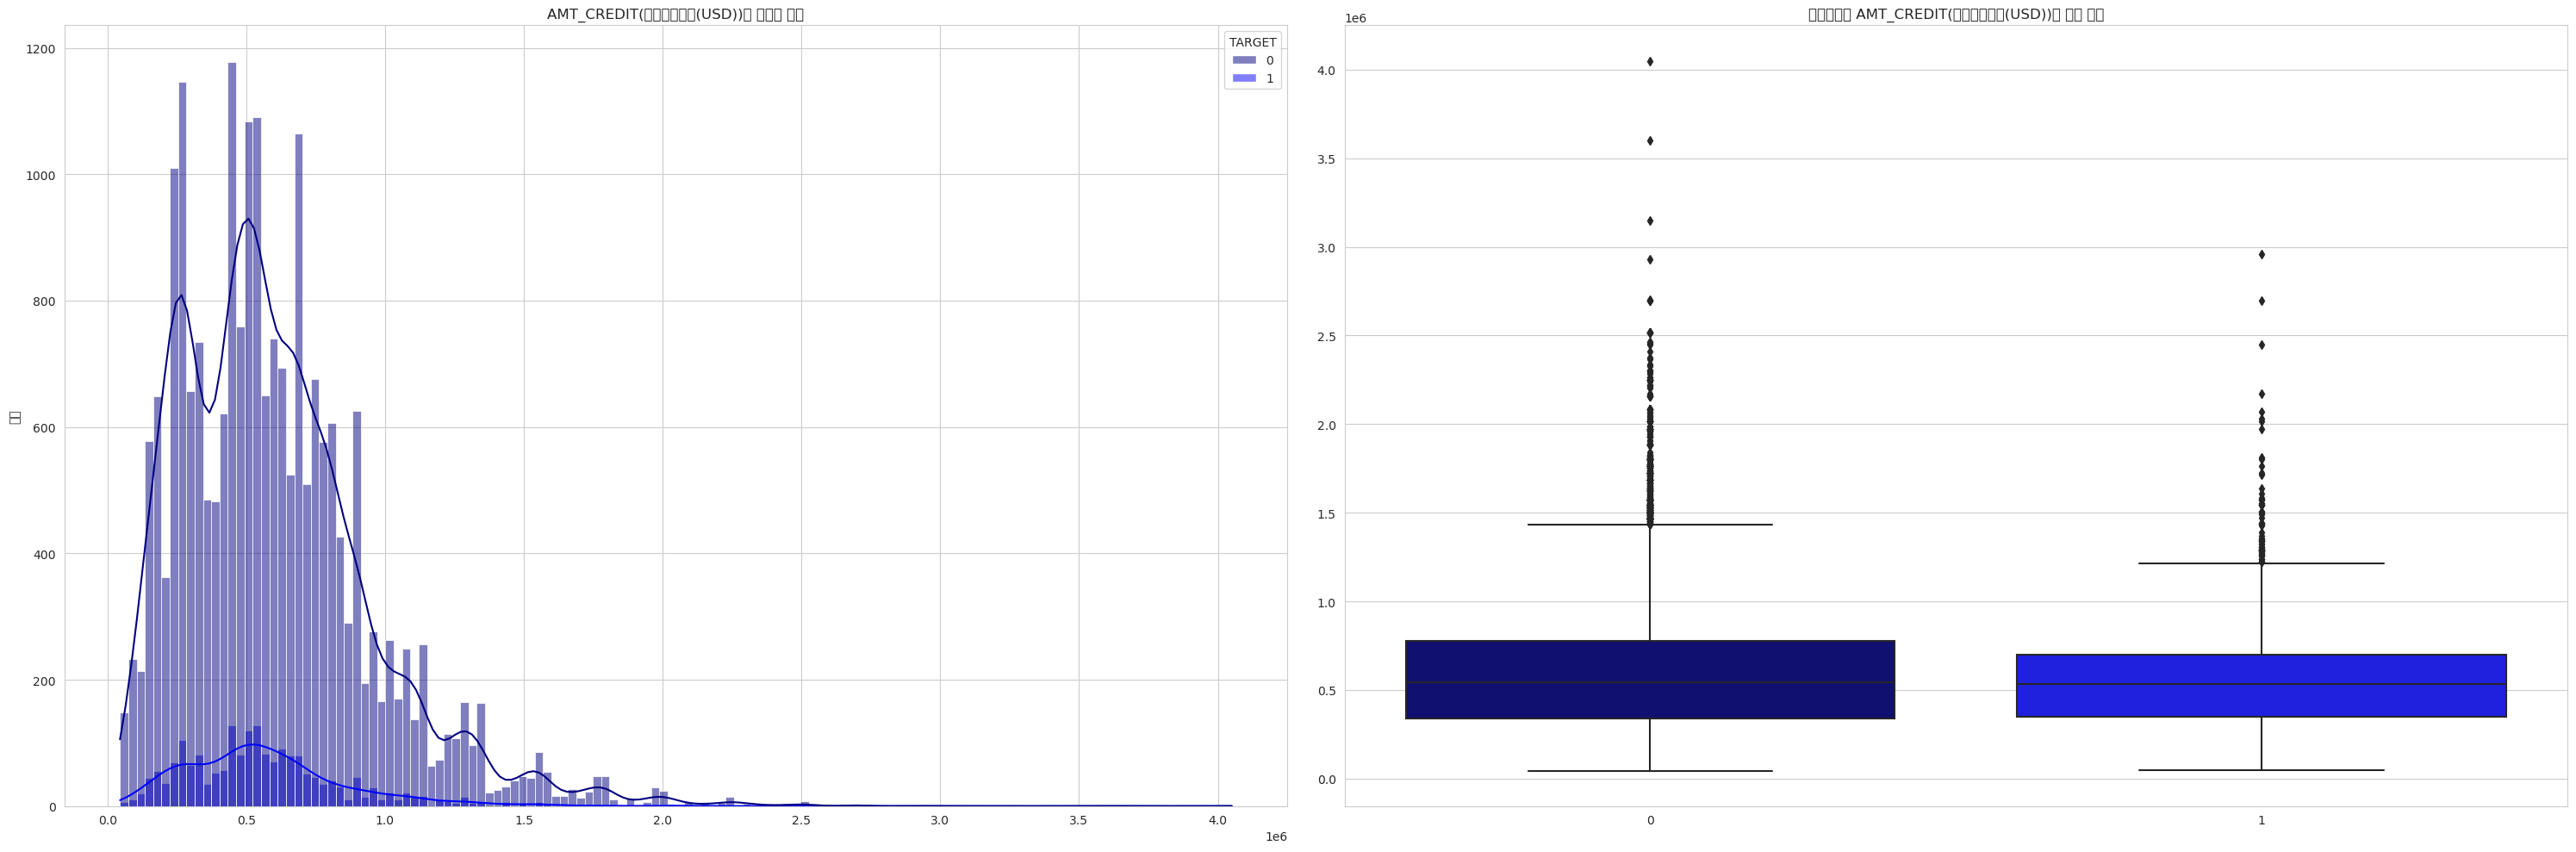

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

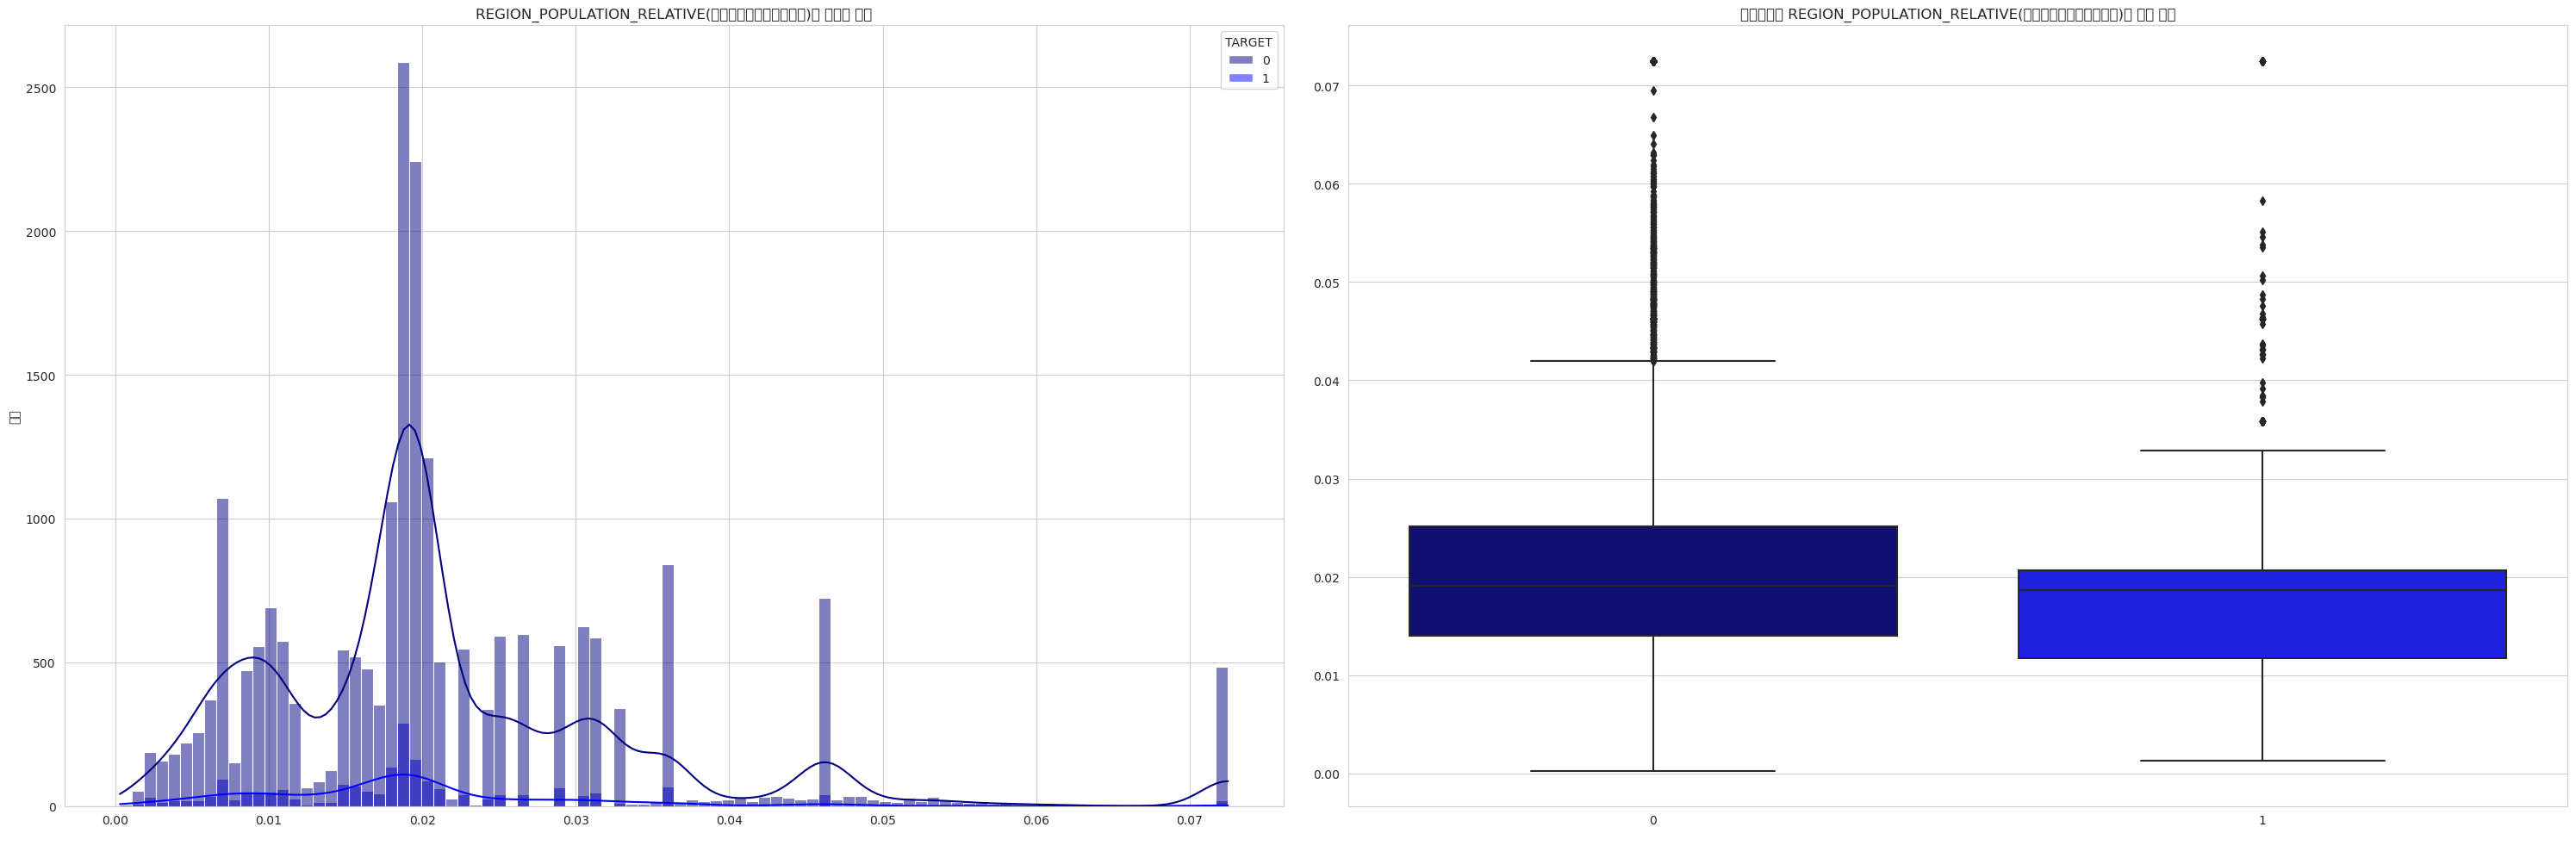

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

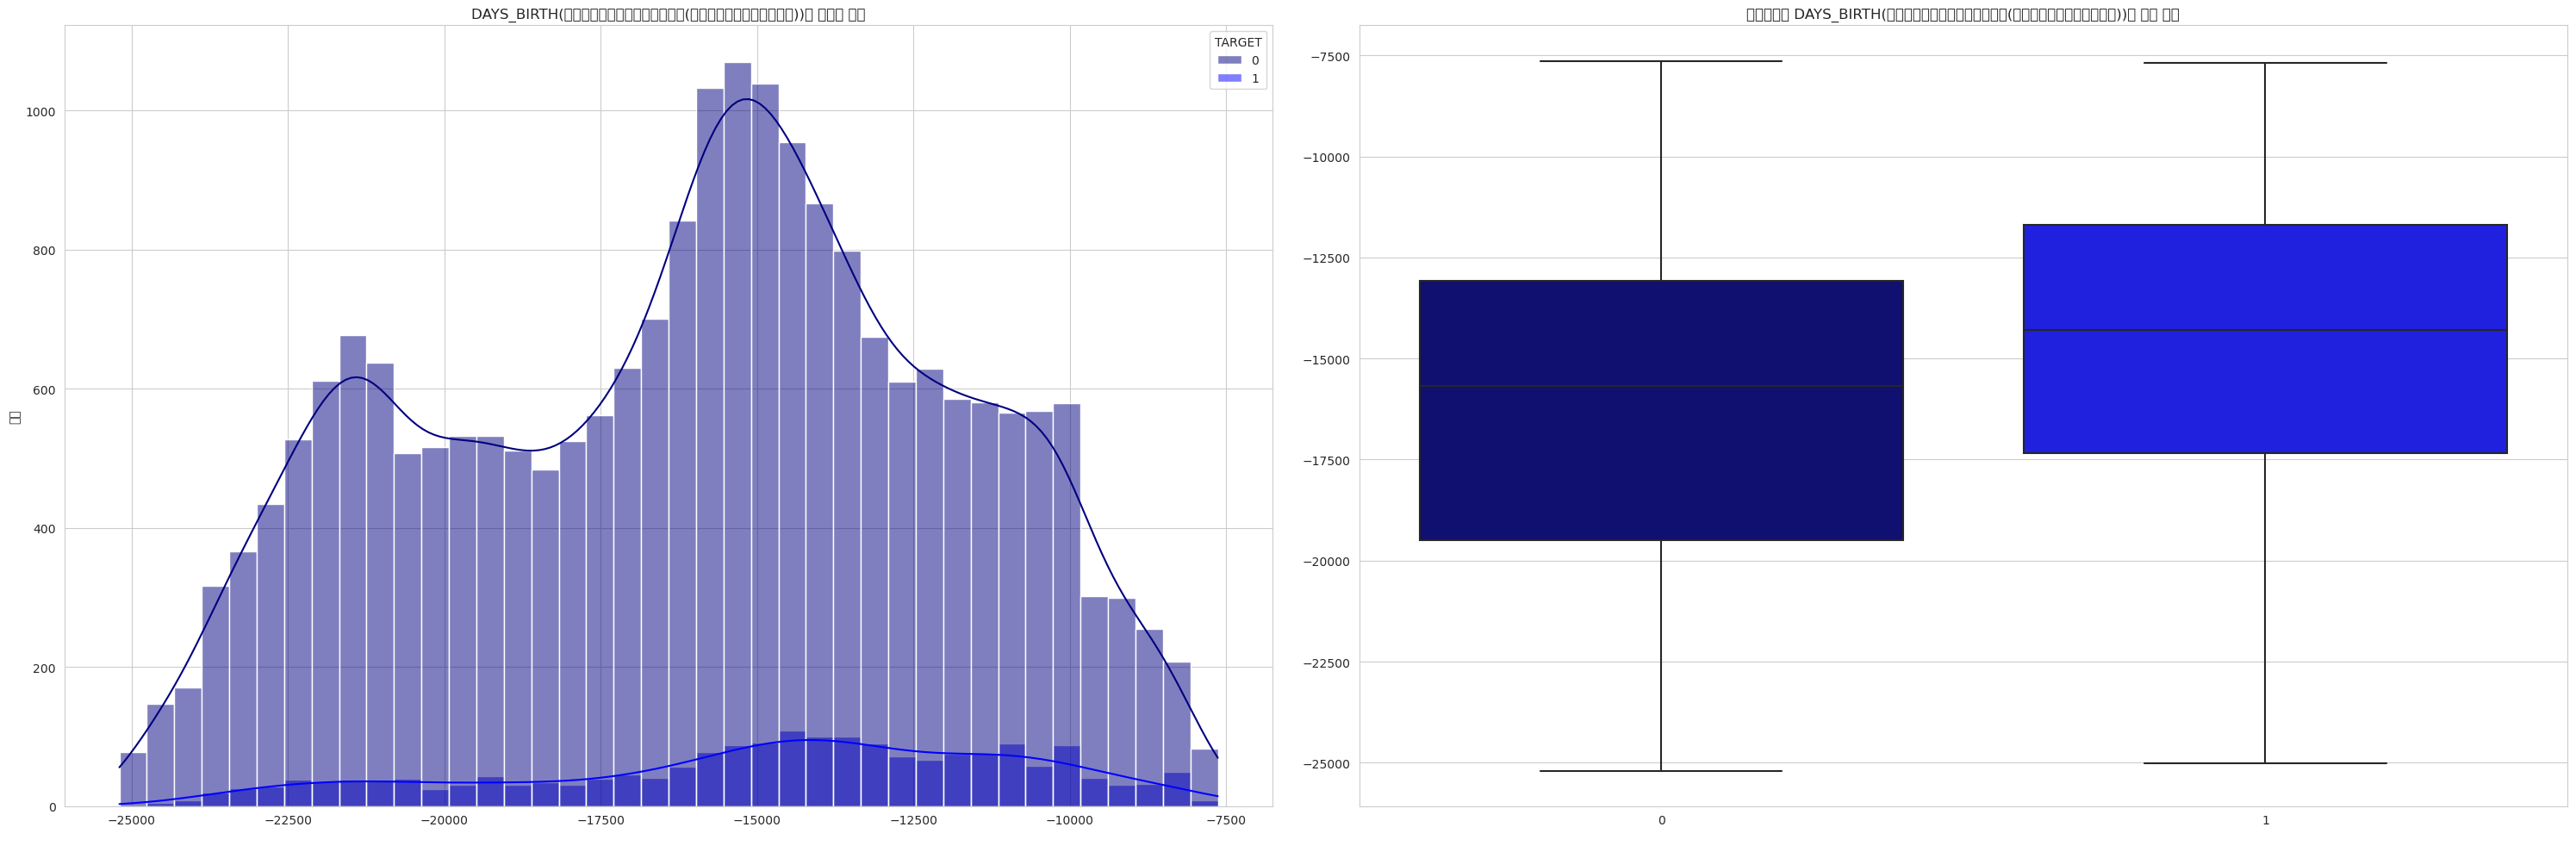

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

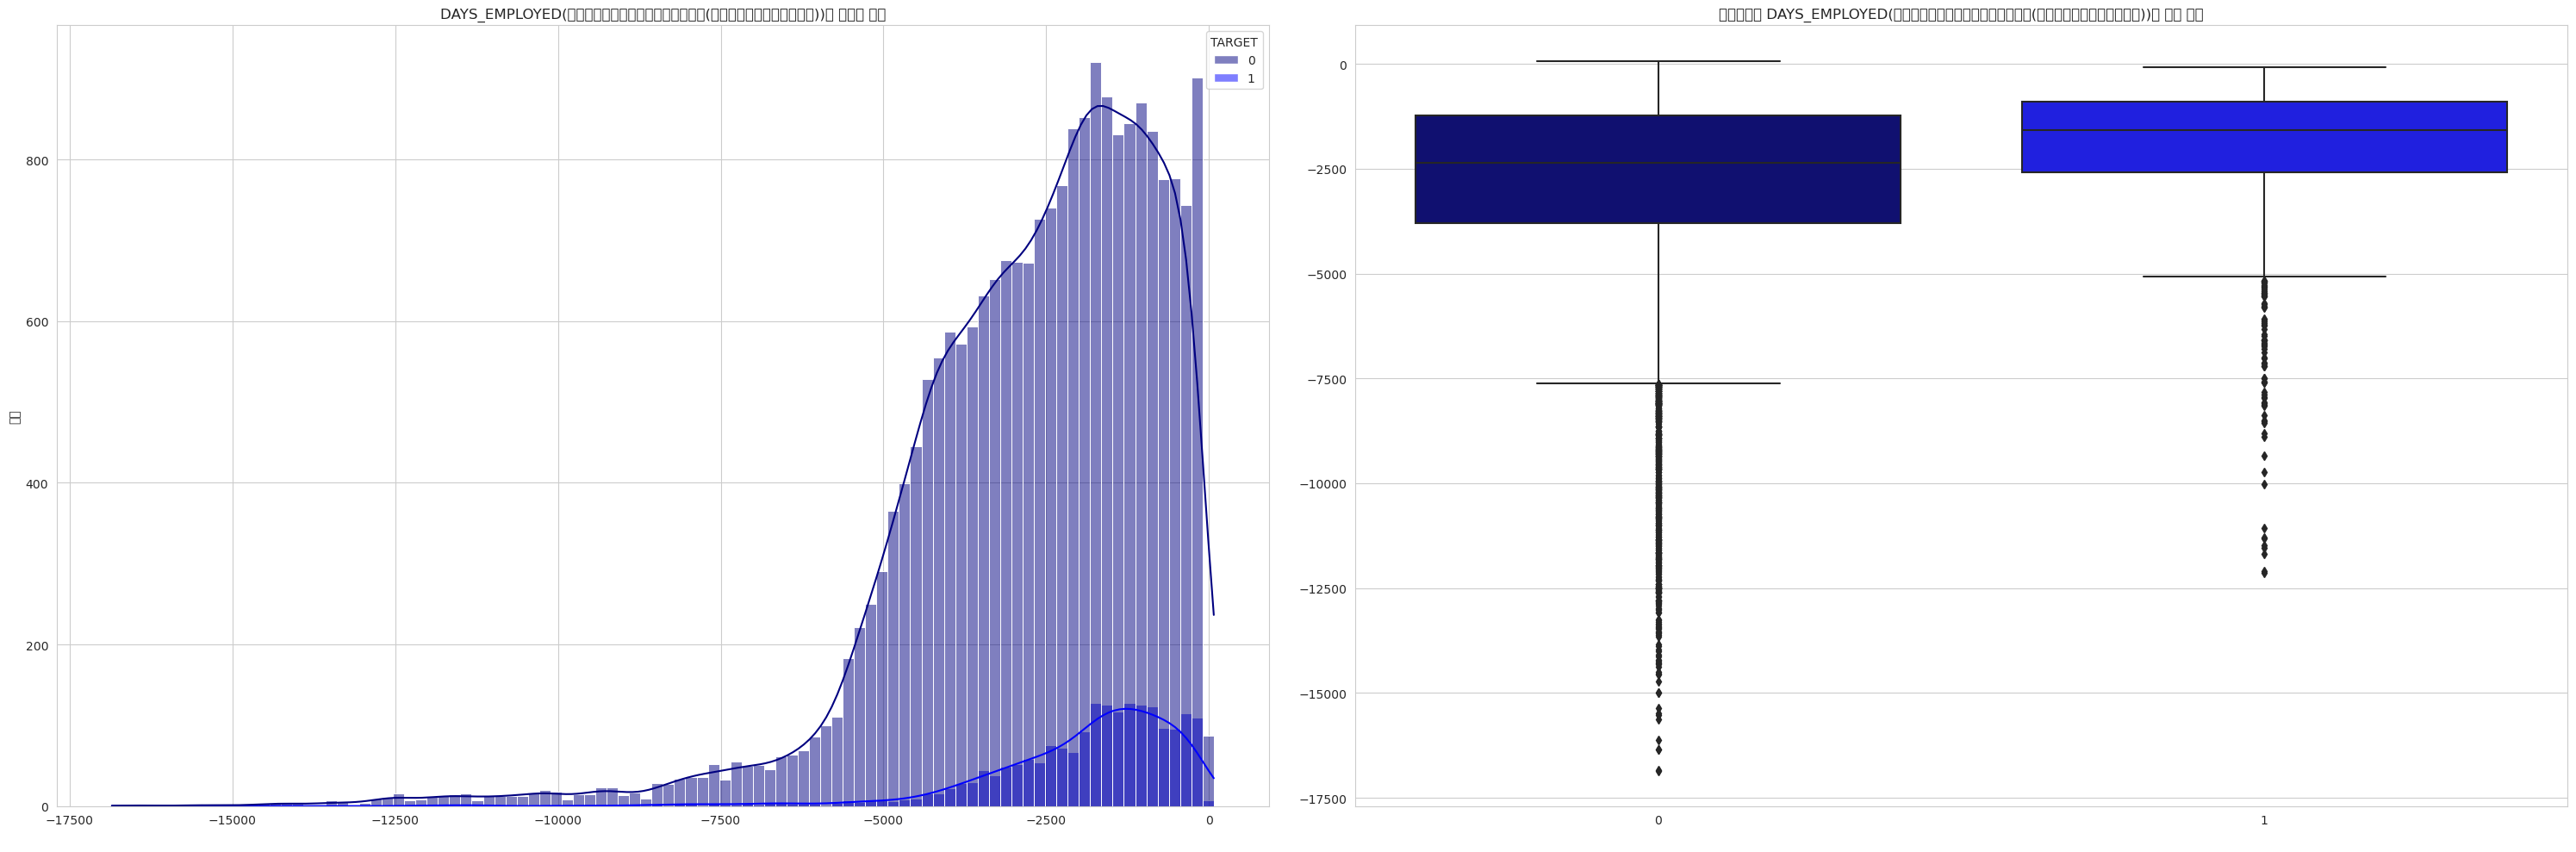

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

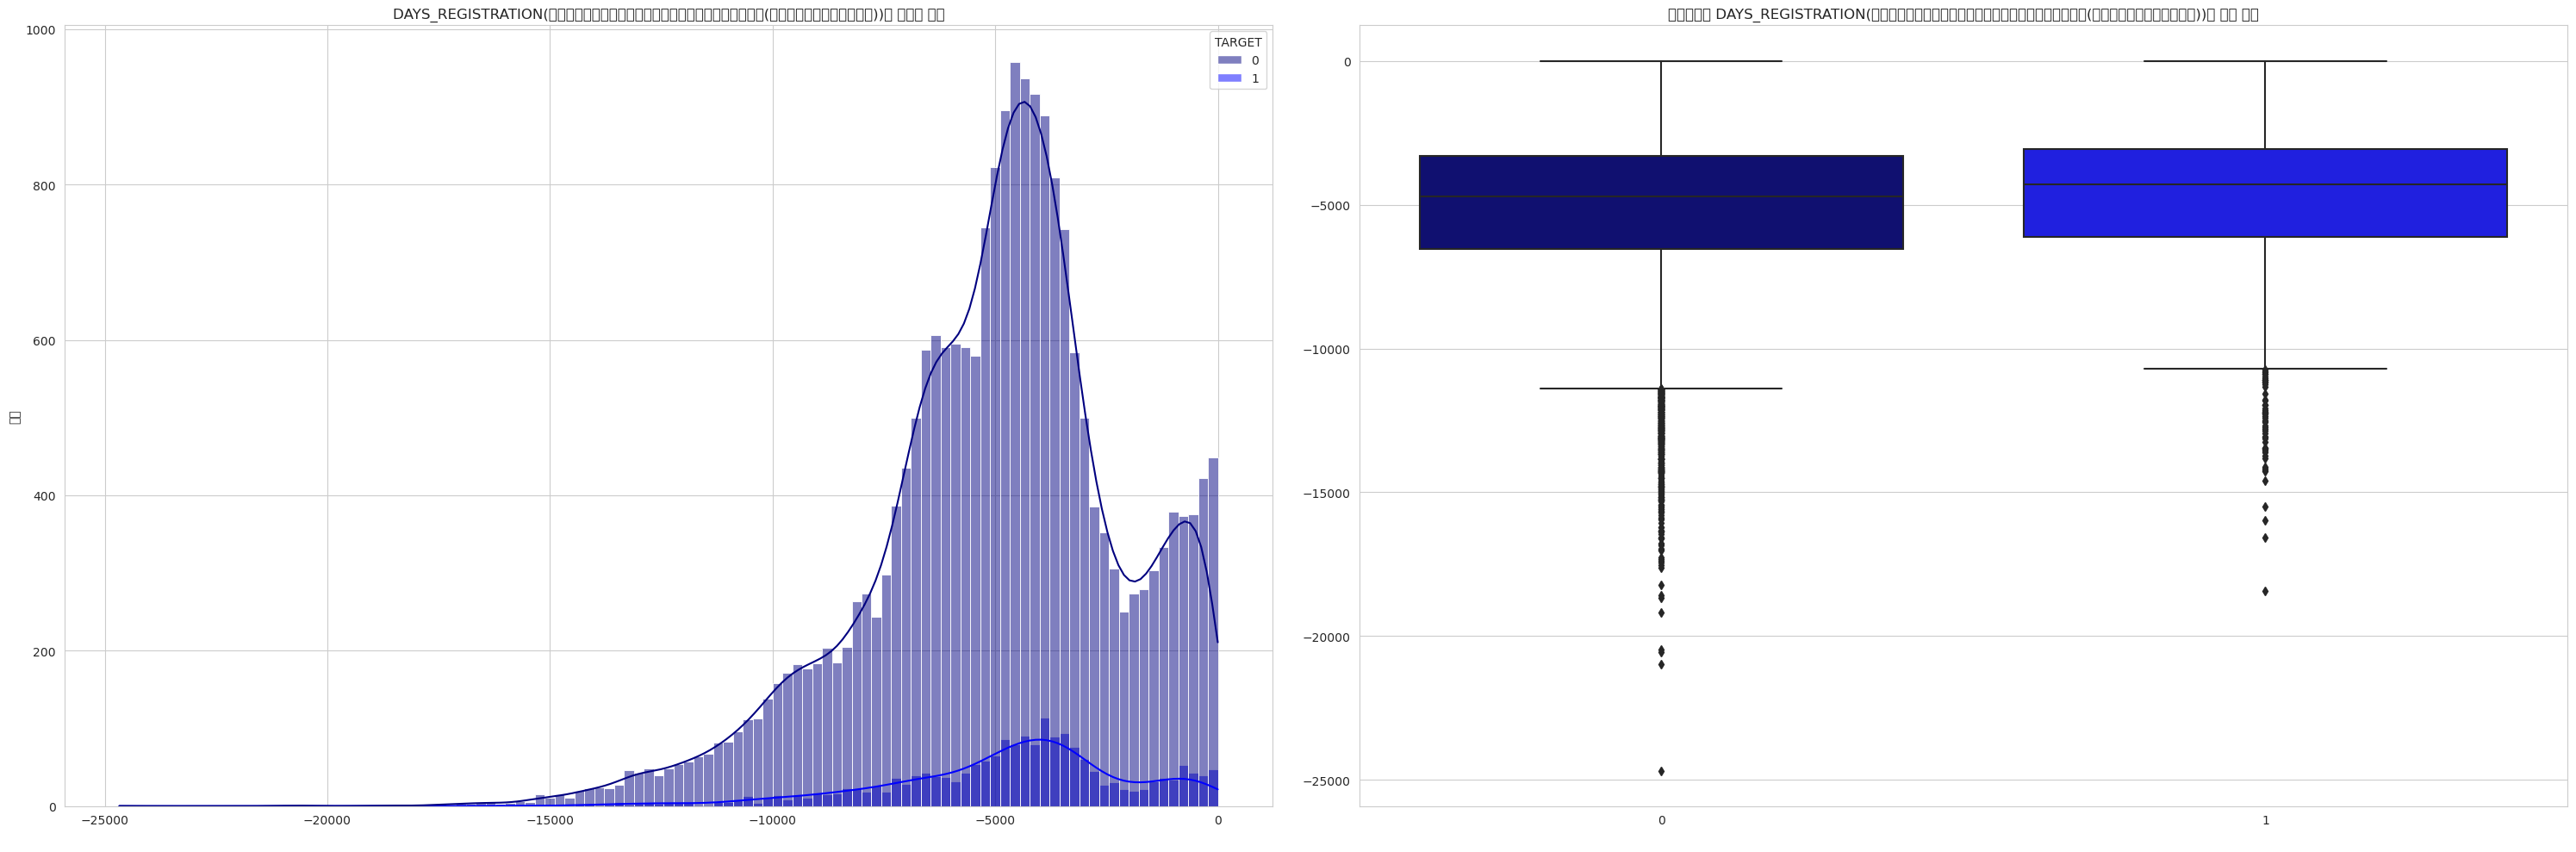

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

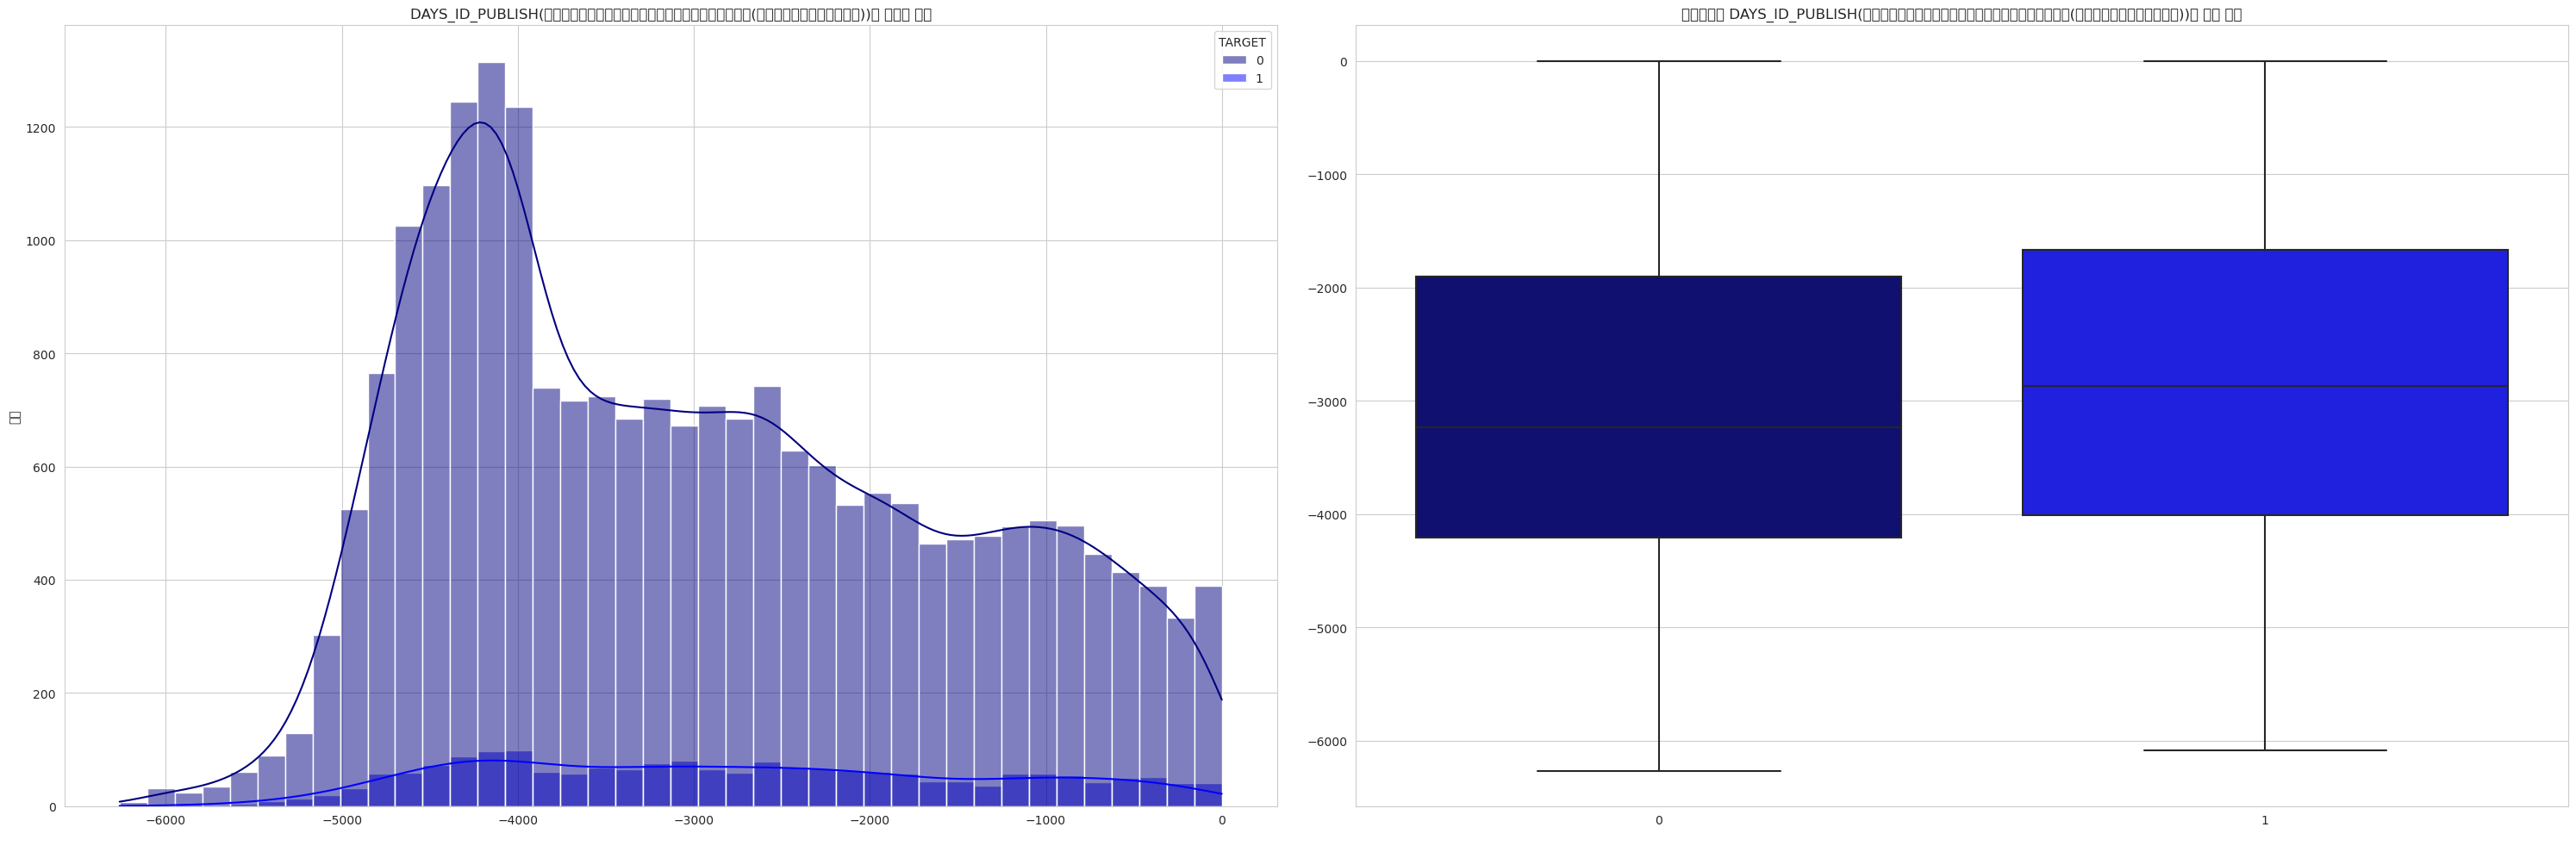

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

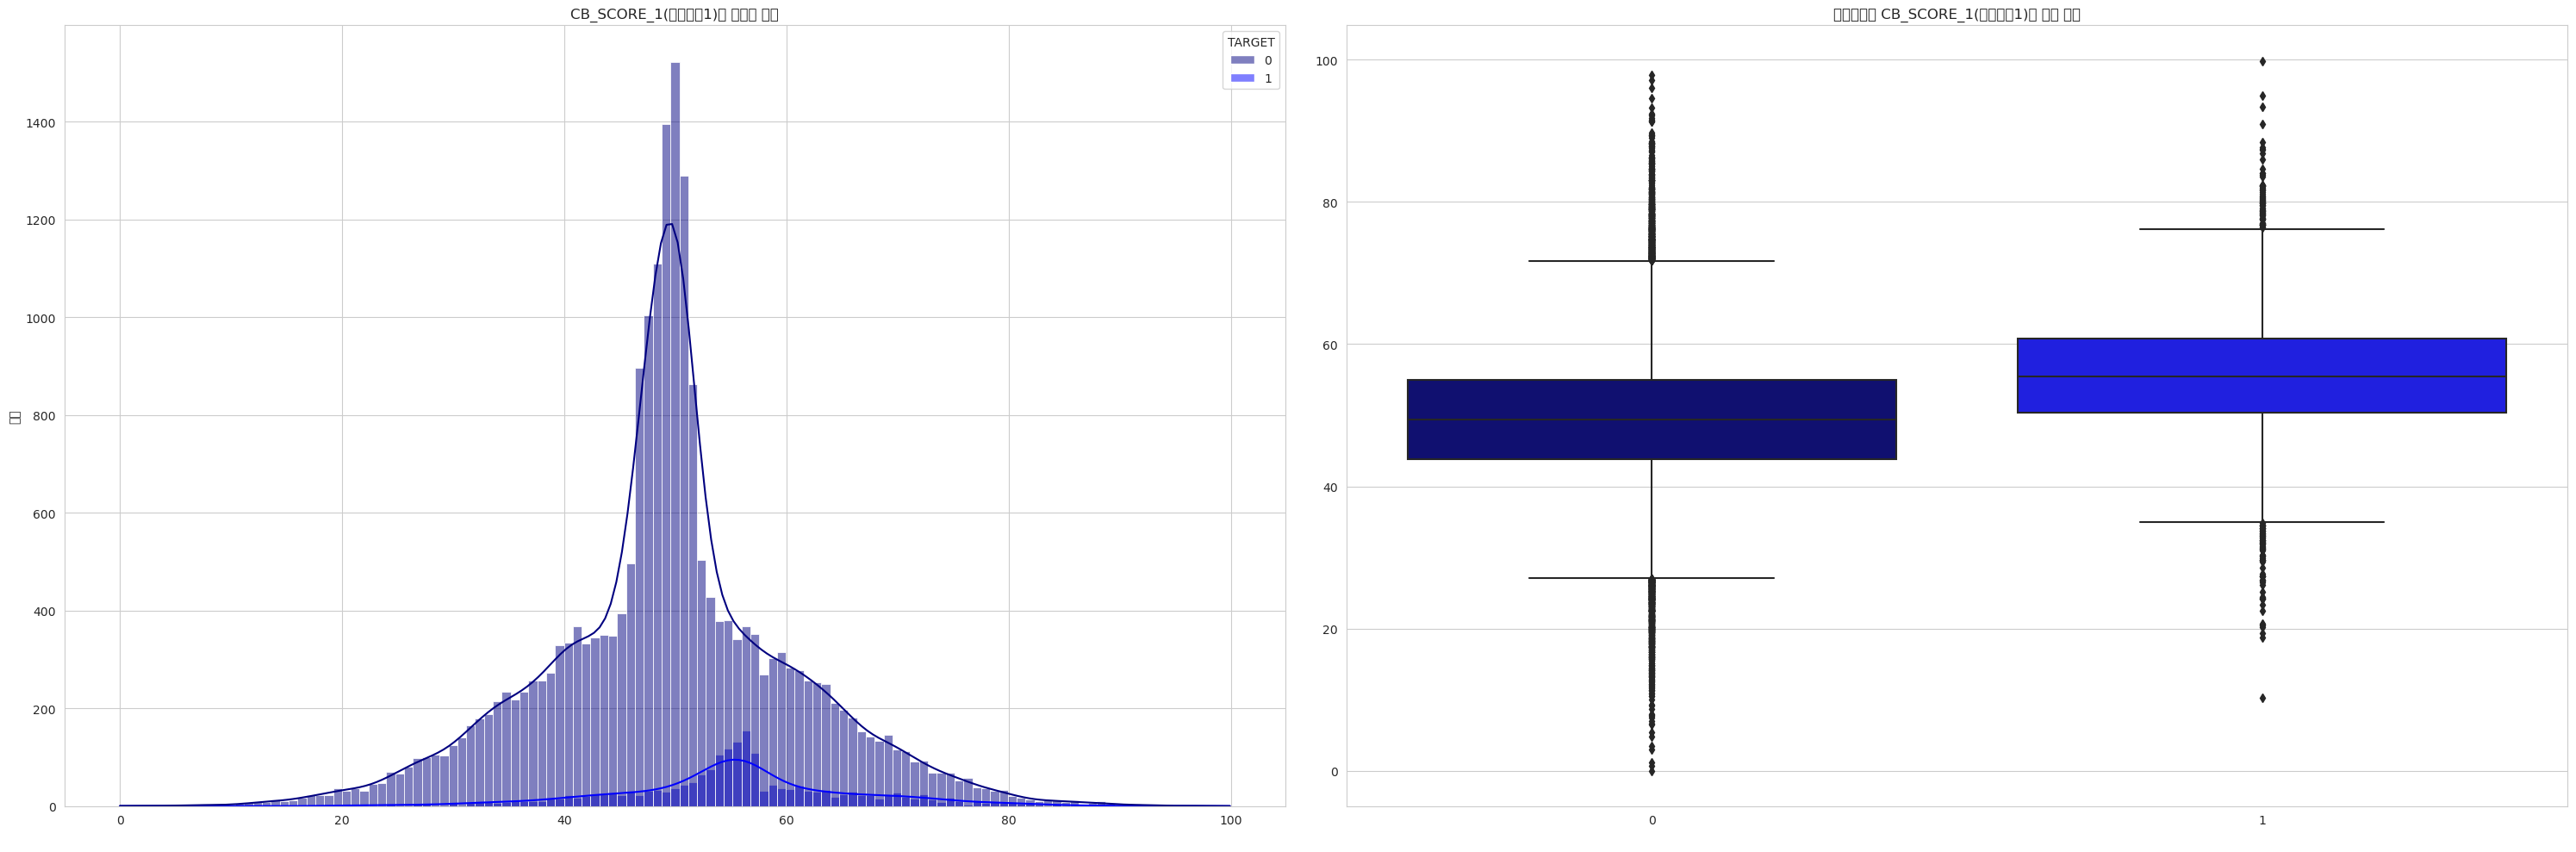

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

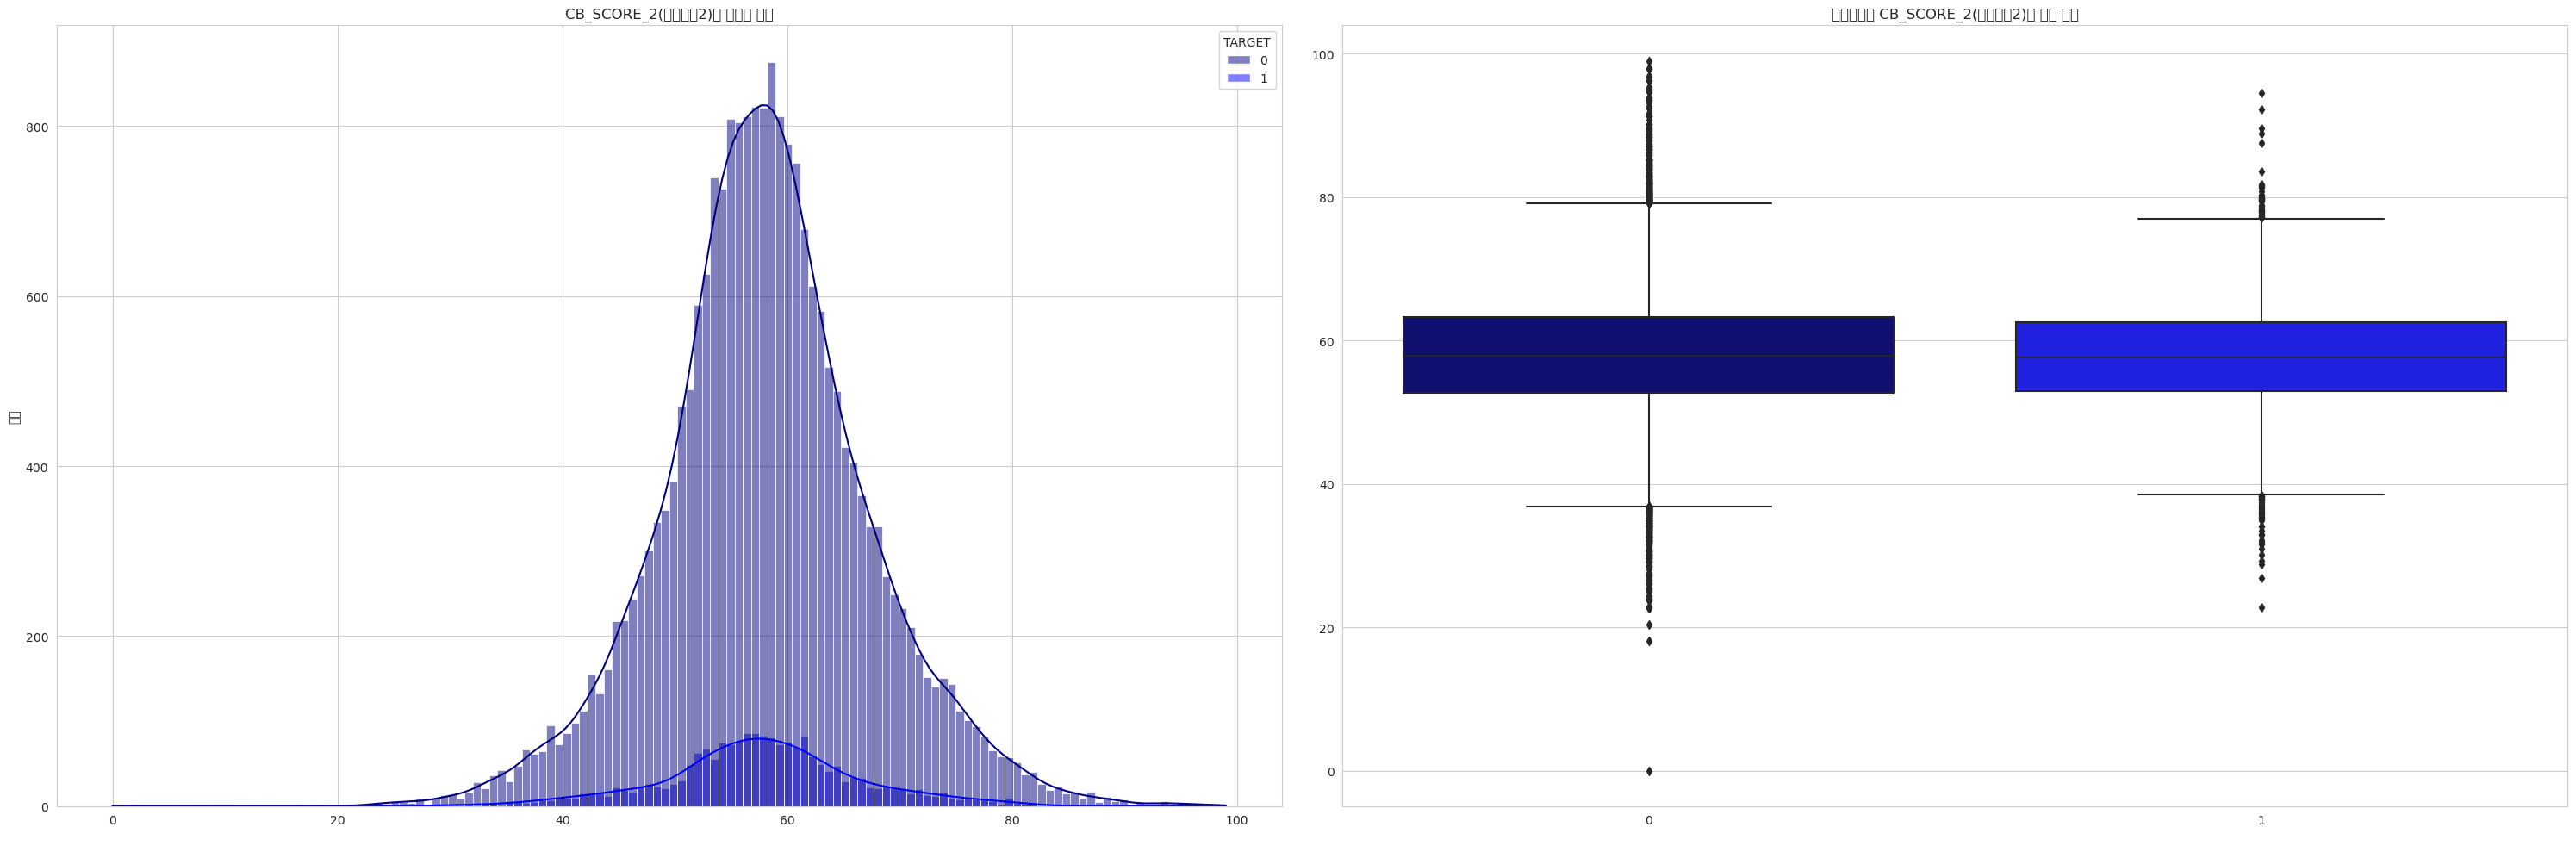

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

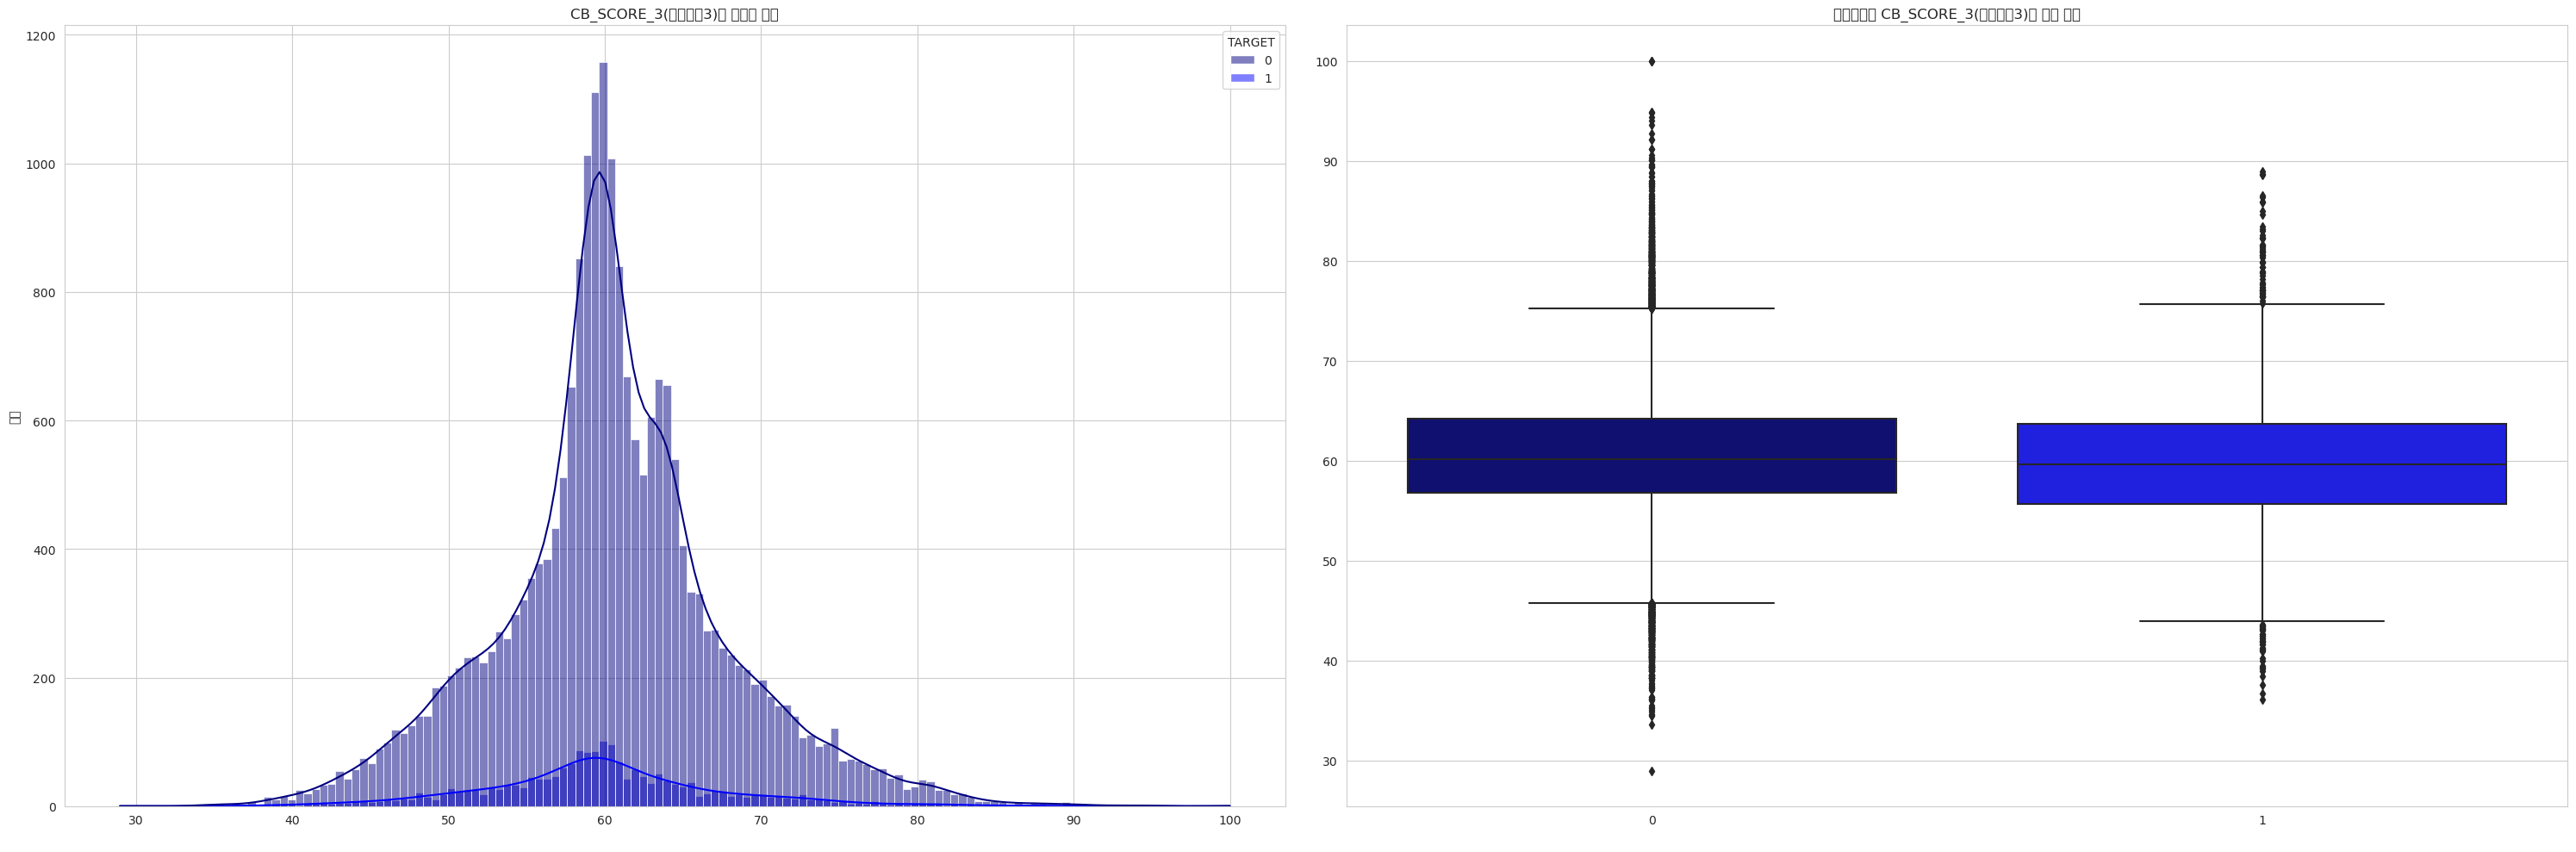

In [32]:
plot_histogram_boxplot(data1, numerical_features, group_option = True)

> #### <font color = blue> 연체 / 정상 그룹간 분포 차이가 커 보이는 days나 cb점수가 연체율과 연관이 큰 특성일 것으로 보임 </font>

> #### <font> 연체여부별 분포 차이가 커 보이는 변수 ▶ 추후 모형에서 중요 변수로 선택될 가능성이 높을 것으로 생각 </font>
    >  - DAYS_BIRTH(대출신청시점에서의일단위나이)
    >  - DAYS_EMPLOYED(대출신청시점에서의고객근무일수) 
    >  - DAYS_ID_PUBLISH(대출신청이전에고객이신분증을변경한시점사이일수)
    >  - CB_SCORE1(신용점수1)  
    > </font>

### 2-6. 근로 유형을 유추할 수 있는 변수들간 연관성 파악 <a id="s-2.6">
#### ▶ Grouped_ORGANIZATION_TYPE(파생변수)와  NAME_INCOME_TYPE(소득 유형)간 연관성 파악 <a id="s-2.6.1">

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

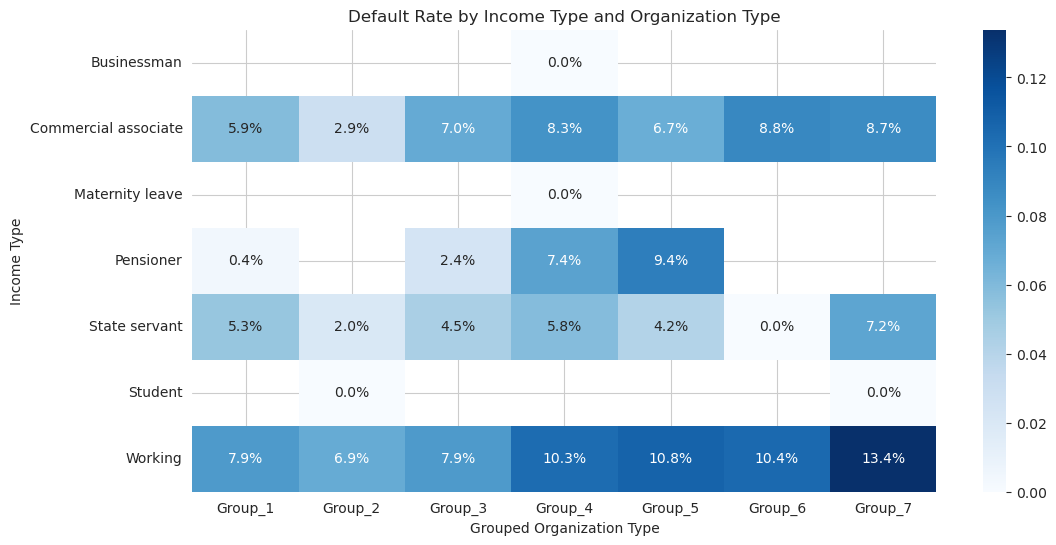

In [33]:
# 조합별 TARGET 비율 계산
grouped_data = data1.groupby(['NAME_INCOME_TYPE', 'Grouped_ORGANIZATION_TYPE'])['TARGET'].mean().reset_index()
pivot_table = grouped_data.pivot('NAME_INCOME_TYPE', 'Grouped_ORGANIZATION_TYPE', 'TARGET')

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.1%', cbar=True)
plt.xlabel('Grouped Organization Type')
plt.ylabel('Income Type')
plt.title('Default Rate by Income Type and Organization Type')
plt.show()

> #### <font color = Blue> [Insight] Grouped Organization Type 과 Income Type 간 Interaction(교호작용) 가능성 확인 </font>

> <b> Grouped Organization Type 은 단변량 변수 시각화시 Group1 → 7 로 갈수록 연체율이 높았으나, </b>  
> <b> 소득 유형에 따라 2차원으로 구분하였을 때 연체율 Pattern에 차이가 있음을 확인 </b>   
>  ▶  소득 유형 = Woking Group (근로자) : Group7에 가까울수록 연체율 높음   
>  ▶  소득 유형 = State servant (국가 공무원) : Group1, 4에서 연체율 높음    
>  ▶  소득 유형 = Pensioner (연금 수령자) : Group4, 5에서 연체율 높음 

> 참고 : Group 3, 4, 5, 8의 직업 유형   
> 근무유형과 소득유형이 차이가 있음 ▶ 두 정보의 입수 시점 차이가 있을 수 있어보임

In [34]:
for group in ['Group_1','Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7'] : 
    print(group + ' 종류') 
    print(data1[data1['Grouped_ORGANIZATION_TYPE'] == group]['ORGANIZATION_TYPE'].unique())

Group_1 종류
['Other' 'Medicine' 'Services' 'Mobile' 'Police' 'Postal' 'Military'
 'Transport: type 1' 'Insurance' 'Cleaning' 'Industry: type 12'
 'Trade: type 1' 'Culture' 'Industry: type 6' 'Industry: type 10'
 'Realtor' 'Industry: type 8' 'Religion']
Group_3 종류
['Hotel' 'Business Entity Type 2' 'Kindergarten' 'School'
 'Security Ministries' 'Trade: type 6' 'Telecom' 'Industry: type 2'
 'Advertising']
Group_4 종류
['Government' 'Self-employed' 'Transport: type 4' 'Industry: type 5'
 'Business Entity Type 1' 'Restaurant']
Group_5 종류
['Business Entity Type 3']
Group_6 종류
['Trade: type 2' 'Trade: type 7' 'Construction' 'Industry: type 4']
Group_7 종류
['Industry: type 1' 'Transport: type 2' 'Industry: type 11'
 'Industry: type 3' 'Agriculture' 'Housing' 'Security' 'Trade: type 3'
 'Electricity' 'Transport: type 3' 'Emergency' 'Legal Services'
 'Trade: type 5' 'Industry: type 7' 'Industry: type 13' 'Trade: type 4']


### 2-6. 근로 유형을 유추할 수 있는 변수들간 연관성 파악   <a id="s-2.6">
#### ▶ Grouped_ORGANIZATION_TYPE(파생변수)과 AMT_INCOME_TOTAL(소득금액) 연관성 파악  <a id="s-2.6.2">

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

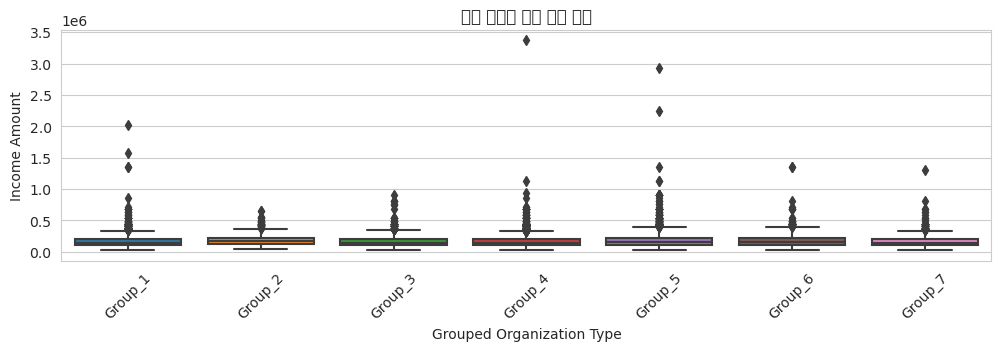

In [35]:
# Set figure size
plt.figure(figsize=(12, 3))

# Create box plot
group_order = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7']
sns.boxplot(x="Grouped_ORGANIZATION_TYPE", y="AMT_INCOME_TOTAL", data=data1, order = group_order)

# Set labels and title
plt.xlabel("Grouped Organization Type")
plt.ylabel("Income Amount")
plt.title("직업 유형별 소득 금액 분포")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


> 소득유형의 이상치로 인해 분포가 보이지 않아, 이상치 제거 후 분포 시각화

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

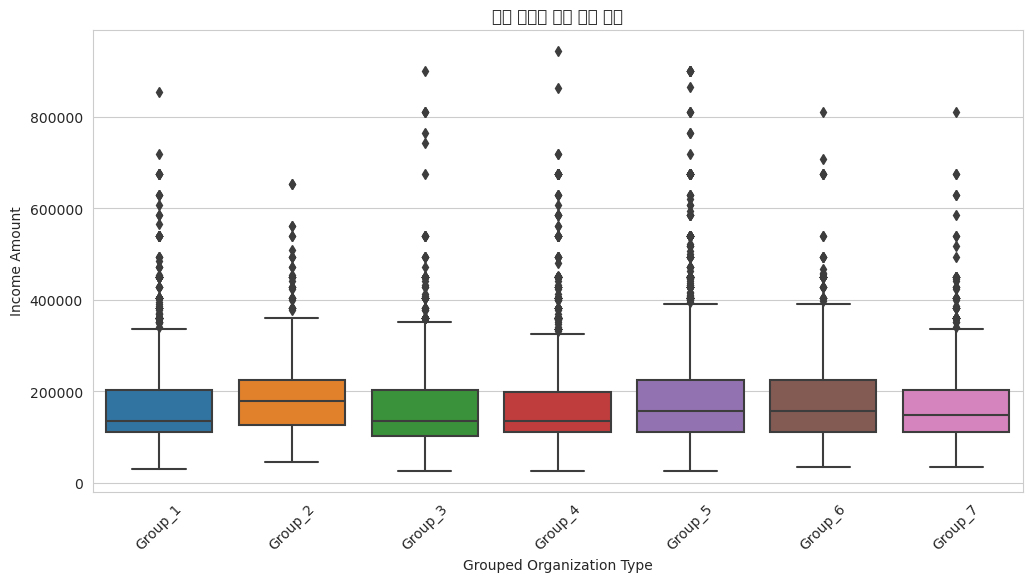

In [42]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create box plot
group_order = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7']
sns.boxplot(x="Grouped_ORGANIZATION_TYPE", y="AMT_INCOME_TOTAL", data=data1[data1['AMT_INCOME_TOTAL']<1e6], order = group_order)

# Set labels and title
plt.xlabel("Grouped Organization Type")
plt.ylabel("Income Amount")
plt.title("직업 유형별 소득 금액 분포")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [43]:
data1[data1['AMT_INCOME_TOTAL']>1e6]

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
3064          Cash loans           F               N             0   
6480          Cash loans           F               N             1   
7565          Cash loans           M               N             2   
7839     Revolving loans           F               Y             1   
7944          Cash loans           F               N             0   
8458          Cash loans           M               N             0   
11050    Revolving loans           M               Y             3   
11616         Cash loans           F               N             0   
12399    Revolving loans           M               Y             0   
16180         Cash loans           F               Y             0   
18448         Cash loans           M               Y             1   
18771         Cash loans           M               N             3   
19153         Cash loans           M               Y             0   
21464    Revolving loans           M               Y             0   

       AMT_INCOME_TOTAL   AMT_CREDIT      NAME_INCOME_TYPE  \
3064          2025000.0  1190340.000  Commercial associate   
6480          3375000.0   900000.000               Working   
7565          1125000.0  2330190.000  Commercial associate   
7839          1125000.0  1178068.375  Commercial associate   
7944          1575000.0  2303460.000  Commercial associate   
8458          2930026.5   900000.000  Commercial associate   
11050         1350000.0  2250000.000               Working   
11616         1125000.0  1277446.875             Pensioner   
12399         1350000.0  1350000.000  Commercial associate   
16180         2250000.0   976077.000  Commercial associate   
18448         1350000.0   787086.000               Working   
18771         1350000.0  2250000.000  Commercial associate   
19153         1350000.0   675000.000  Commercial associate   
21464         1306831.5   157500.000  Commercial associate   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
3064   Secondary / secondary special               Married  House / apartment   
6480                Higher education               Married  House / apartment   
7565                Higher education               Married  House / apartment   
7839                Higher education  Single / not married  House / apartment   
7944                Higher education               Married  House / apartment   
8458   Secondary / secondary special               Married  House / apartment   
11050               Higher education               Married  House / apartment   
11616               Higher education                 Widow  House / apartment   
12399               Higher education               Married  House / apartment   
16180               Higher education             Separated  House / apartment   
18448  Secondary / secondary special               Married  House / apartment   
18771               Higher education               Married  House / apartment   
19153  Secondary / secondary special               Married  House / apartment   
21464               Higher education               Married  House / apartment   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
3064                     0.022037 -17455.000000   -4226.000000   
6480                     0.016626 -20662.496094   -3952.044678   
7565                     0.005084 -16149.000000   -6083.000000   
7839                     0.064096 -14325.000000   -3082.000000   
7944                     0.002506 -20273.000000   -5028.203613   
8458                     0.020713 -15523.000000   -3285.000000   
11050                    0.072508 -16790.000000   -3045.954102   
11616                    0.003813 -20299.000000   -4336.581543   
12399                    0.018853 -19895.000000     -18.000000   
16180                    0.010276 -22734.000000   -3079.898682   
18448                    0.016427 -18229.185547   -1104.000000   
18771           

> #### <font color = blue> 연체율이 낮은 Group_1에서 소득 수준이 높고, 연체율이 높은 Group_7에서 소득 수준이 낮을 것이라 예상했으나 </font> 
> #### <font color = blue>  Group 3~5에서 오히려 소득 수준이 높아보임 </font>


> <b> ※ 소득 수준과 연관성 없어보이니, 자산 수준을 나타내는 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE' 함께 보기 </b>

### 2-7. 근로 유형 X 자산 수준을 조합해 연체율과 연관성 파악  
#### ▶ Grouped_ORGANIZATION_TYPE(파생변수) x FLAG_OWN_REALTY(자가부동산보유여부) 별 연체율 현황 파악 <a id="s-2.7">

In [44]:
target_rate = data1.groupby(['Grouped_ORGANIZATION_TYPE', 'FLAG_OWN_REALTY'])['TARGET'].mean().reset_index()
pivot_table = target_rate.pivot(index='Grouped_ORGANIZATION_TYPE', columns='FLAG_OWN_REALTY', values='TARGET')

# Print the pivot table
print(pivot_table)

FLAG_OWN_REALTY                   N         Y
Grouped_ORGANIZATION_TYPE                    
Group_1                    0.061055  0.044352
Group_2                    0.057554  0.050000
Group_3                    0.078025  0.066376
Group_4                    0.089655  0.091026
Group_5                    0.092326  0.093118
Group_6                    0.094675  0.099029
Group_7                    0.127103  0.114776


> #### <font color = blue> 대부분의 그룹(Group 4, 5, 6제외)에서 자가부동산이 있는 그룹의 연체율이 낮음 ▶ 자산 수준이 연체율과 연관성이 커 보임 </font>

#### ▶ Grouped_ORGANIZATION_TYPE(파생변수) x NAME_HOUSING_TYPE(주거형태) 별 연체율 현황 파악 <a id="s-2.6">

In [48]:
target_rate = data1.groupby(['Grouped_ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE'])['TARGET'].mean().reset_index()
pivot_table = target_rate.pivot(index='NAME_HOUSING_TYPE', columns='Grouped_ORGANIZATION_TYPE', values='TARGET')

# Print the pivot table
print(pivot_table)

Grouped_ORGANIZATION_TYPE   Group_1   Group_2   Group_3   Group_4   Group_5  \
NAME_HOUSING_TYPE                                                             
Co-op apartment            0.066667  0.000000  0.100000  0.086957  0.062500   
House / apartment          0.044877  0.043636  0.060252  0.087293  0.089721   
Municipal apartment        0.078947  0.000000  0.094340  0.106977  0.096154   
Office apartment           0.033898  0.333333  0.057143  0.125000  0.066667   
Rented apartment           0.132075  0.333333  0.133333  0.160714  0.116788   
With parents               0.080925  0.119048  0.173611  0.111111  0.142045   

Grouped_ORGANIZATION_TYPE   Group_6   Group_7  
NAME_HOUSING_TYPE                              
Co-op apartment            0.200000  0.000000  
House / apartment          0.092869  0.115854  
Municipal apartment        0.108108  0.069444  
Office apartment           0.000000  0.050000  
Rented apartment           0.130435  0.266667  
With parents               0.15

In [51]:
def plot_heatmaps(df, feature1, feature2, target='TARGET', option = 'Day'):
    # Create a pivot table for the counts heatmap
    pivot_counts = df.pivot_table(index=feature1,
                                  columns=feature2,
                                  values=target,
                                  aggfunc='count')

    # Create a pivot table for the TARGET=1 ratio heatmap
    pivot_ratio = df[df[target] == 1].pivot_table(index=feature1,
                                                  columns=feature2,
                                                  values=target,
                                                  aggfunc='count') / pivot_counts

    # Reorder index (days of week) from Monday to Sunday
    if option == 'Day' :
        order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
        pivot_counts = pivot_counts.reindex(order)
        pivot_ratio = pivot_ratio.reindex(order)*100

    elif option == 'group' :
        order = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7']
        pivot_counts = pivot_counts.reindex(order)
        pivot_ratio = pivot_ratio.reindex(order)*100

    else : 
        pass
        
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))# , fontsize=14)

    # Plot counts heatmap
    sns.heatmap(pivot_counts.fillna(0),
                ax=axes[0],
                cmap="Blues",
                annot=True,
                fmt=".0f",
               annot_kws={"fontsize": 14})  # Use no decimal places
    
    axes[0].set_title('Counts Heatmap')

     # Plot TARGET=1 ratio heatmap
    sns.heatmap(pivot_ratio.fillna(0),
               ax=axes[1],
               cmap="Blues",
               annot=True,
               fmt=".2f",
               annot_kws={"fontsize": 14})  # Use two decimal places

    axes[1].set_title('TARGET 1 Ratio Heatmap')
    

    # 플롯 출력
    plt.show()    

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

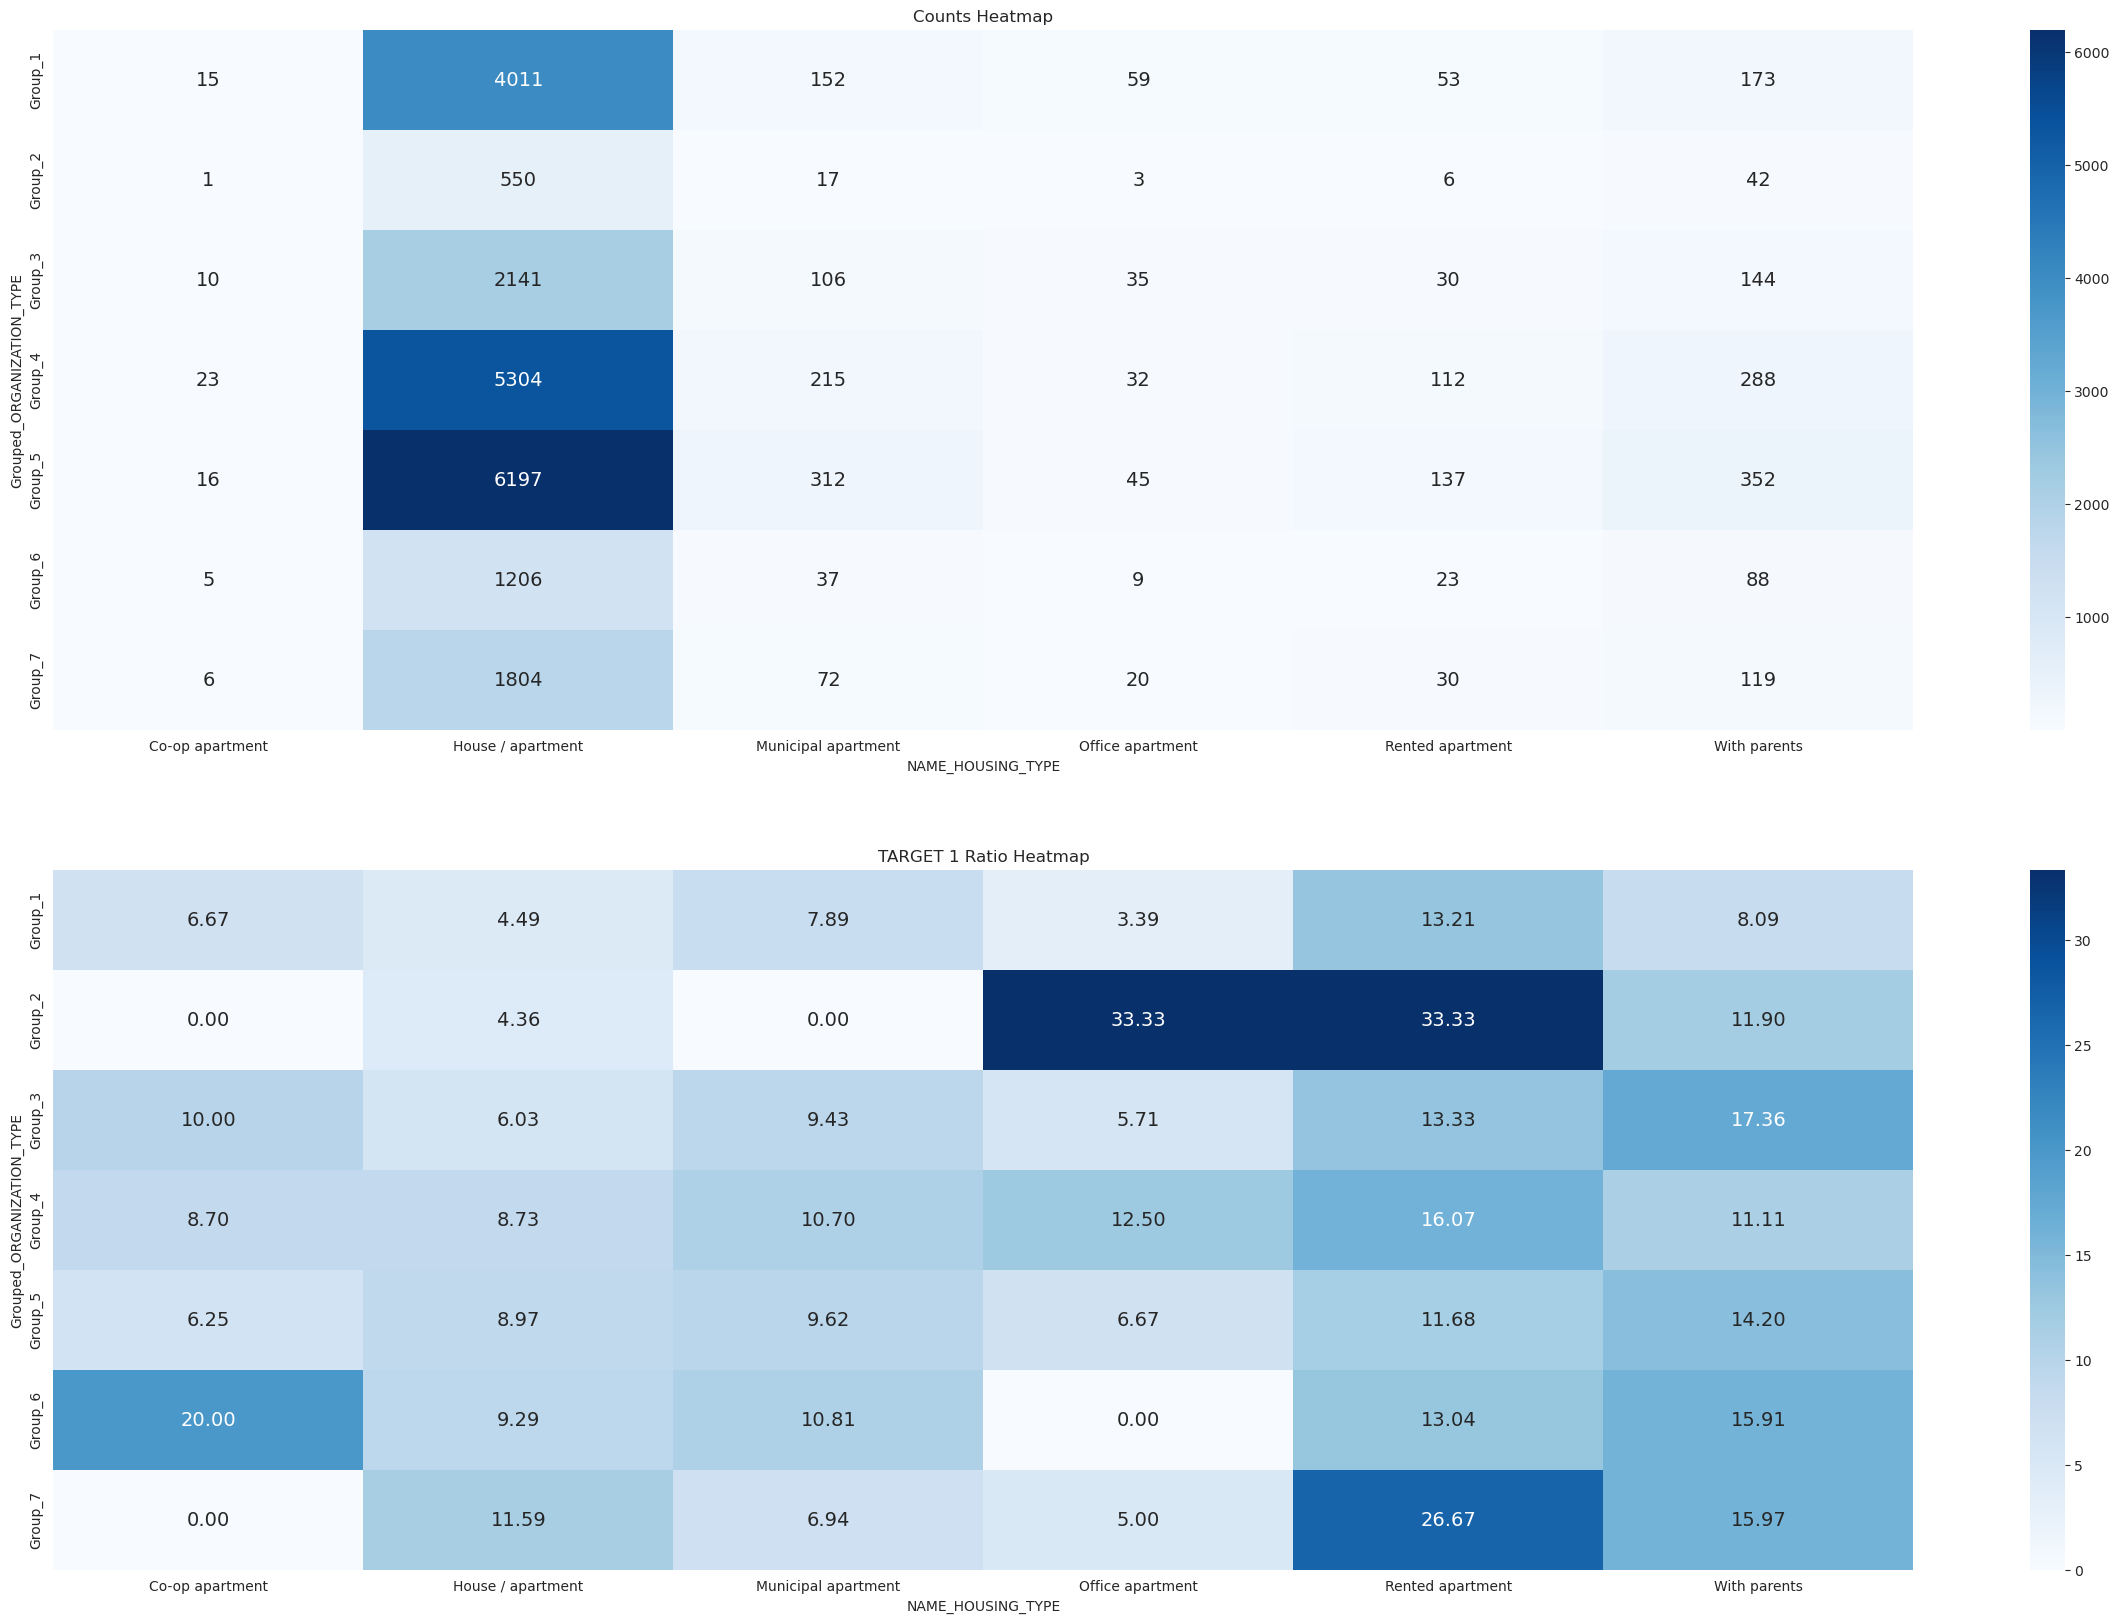

In [52]:
plot_heatmaps(data1, 'Grouped_ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', target='TARGET', option = 'group')

> #### <font color = blue> House/appartment 에서 그룹순이 올라갈수록 연체율이 높은 패턴이 유지됨, 나머지 주거형태에서는 패턴 확인 불가 </font>

### 2-8. 대출요일 X 대출신청시간대 조합해 연체율과 연관성 파악 <a id="s-2.8">
#### ▶ WEEKDAY_APPR_PROCESS_START(대출신청요일) x HOUR_APPR_PROCESS_START(대출신청시간대) 별 연체율 현황 파악

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

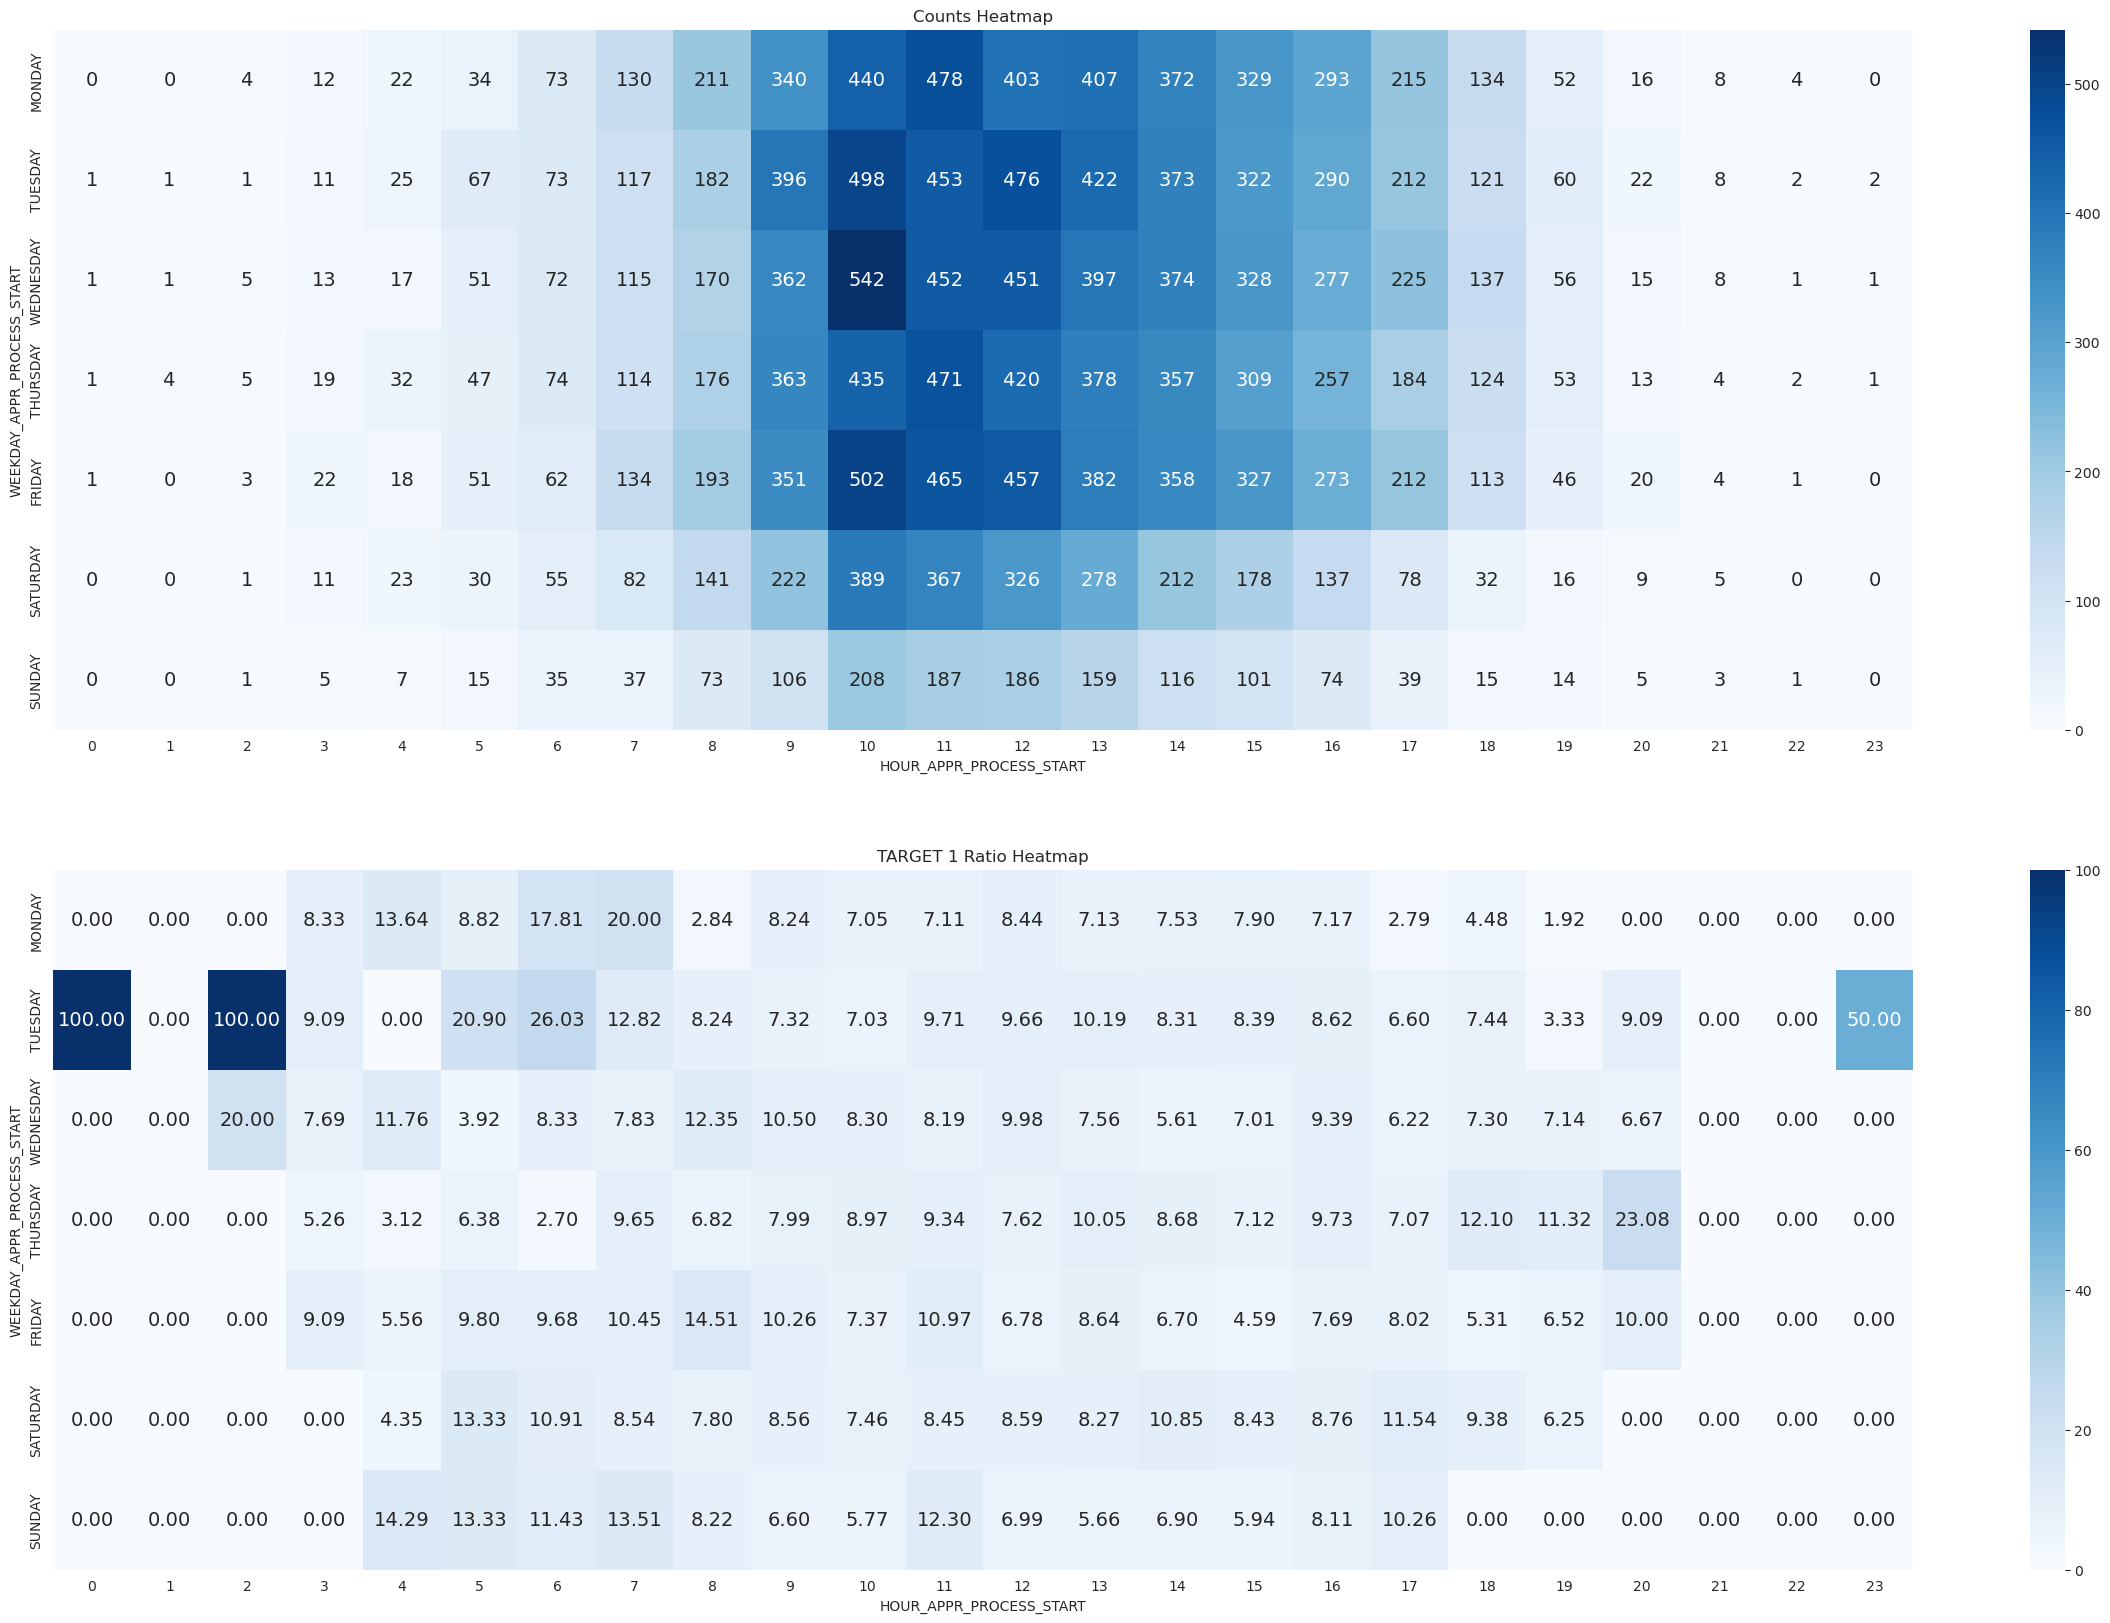

In [53]:
plot_heatmaps(data1 ,'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START')

> #### <font color = blue> 요일 X 시간 조합으로 연체율이 높/낮은 패턴을 찾기 힘들어보임 </font>
> 요일 및 시간의 의미를 살려 임의로 범주화한 변수 생성해서 EDA 진행 

In [54]:
# Define weekday and weekend categories
weekday = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY']
weekend = ['SATURDAY', 'SUNDAY']

# Define time categories
time_categories = {
    (6, 11): "오전",
    (11, 14): "점심",
    (14, 18): "오후",
    (18, 24): "저녁/새벽",
    (0, 6): "저녁/새벽"
}

# Combine WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START columns
data1['TIME_CATEGORY'] = data1.apply(lambda row: 
                                   ('평일' if row['WEEKDAY_APPR_PROCESS_START'] in weekday else '주말') + '_' +
                                   next((value for key, value in time_categories.items() if key[0] <= row['HOUR_APPR_PROCESS_START'] < key[1]), ''),
                                   axis=1)

In [55]:
data1['TIME_CATEGORY'].value_counts()

평일_점심       6512
평일_오전       6125
평일_오후       5887
주말_점심       1503
평일_저녁/새벽    1497
주말_오전       1348
주말_오후        935
주말_저녁/새벽     193
Name: TIME_CATEGORY, dtype: int64

In [56]:
# Create a pivot table to calculate the mean TARGET for each TIME_CATEGORY
pivot_table = data1.pivot_table(index='TIME_CATEGORY', values='TARGET', aggfunc=['mean', 'count'])

In [57]:
pivot_table

mean  count
                 TARGET TARGET
TIME_CATEGORY                 
주말_오전          0.078635   1348
주말_오후          0.088770    935
주말_저녁/새벽       0.062176    193
주말_점심          0.084498   1503
평일_오전          0.089796   6125
평일_오후          0.073042   5887
평일_저녁/새벽       0.076152   1497
평일_점심          0.087684   6512

> #### <font> [가설] 거주지표준화('REGION_POPULATION_RELATIVE')는 각 성, 연령에 대한 표준화 지표를 의미하는가 </font>   
> #### <font> ▶ 데이터의 성, 연령을 구분해 'REGION_POPULATION_RELATIVE'와의 연관성 탐색 </font>

### 2-9. 거주지표준화('REGION_POPULATION_RELATIVE') 변수 EDA <a id="s-2.9">
#### ▶ 표준화 정보이므로, 성/연령 과의 연관성이 있어보임  (총 81개 유효값이 존재). 연관성 파악 

In [58]:
# 연령 파생변수 생성
data1['AGE'] = (-data1['DAYS_BIRTH'] // 365)

In [59]:
data1['CODE_GENDER'].value_counts()

F    16802
M     7198
Name: CODE_GENDER, dtype: int64

In [60]:
male_data = data1[data1['CODE_GENDER']=='M'] # 남자
female_data = data1[data1['CODE_GENDER']=='F'] # 여자 

In [61]:
len(data1['REGION_POPULATION_RELATIVE'].value_counts().unique( ))

69

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

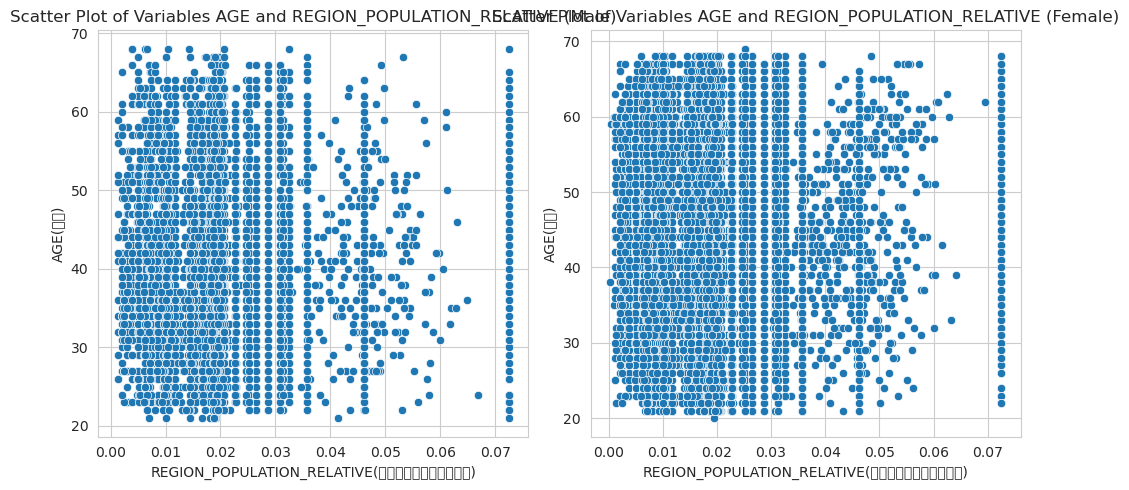

In [62]:
# 그리드 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 남성 산점도
sns.scatterplot(data=male_data, x='REGION_POPULATION_RELATIVE', y='AGE', ax=axes[0])
axes[0].set_xlabel('REGION_POPULATION_RELATIVE(' + column_info['REGION_POPULATION_RELATIVE']+')')
axes[0].set_ylabel('AGE(나이)')
axes[0].set_title('Scatter Plot of Variables AGE and REGION_POPULATION_RELATIVE (Male)')

# 여성 산점도
sns.scatterplot(data=female_data, x='REGION_POPULATION_RELATIVE', y='AGE', ax=axes[1])
axes[1].set_xlabel('REGION_POPULATION_RELATIVE(' + column_info['REGION_POPULATION_RELATIVE']+')')
axes[1].set_ylabel('AGE(나이)')
axes[1].set_title('Scatter Plot of Variables AGE and REGION_POPULATION_RELATIVE (Female)')

plt.tight_layout() # 서브플롯 간격 조정
plt.show()


> #### <font> 성별 연령별 표준화 인구 정보의 특별한 Pattern을 확인할 수 없음 </font>

### 2-10. 거주지표준화 변수와 거주지등급간 연관성 EDA  <a id="s-2.10">

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

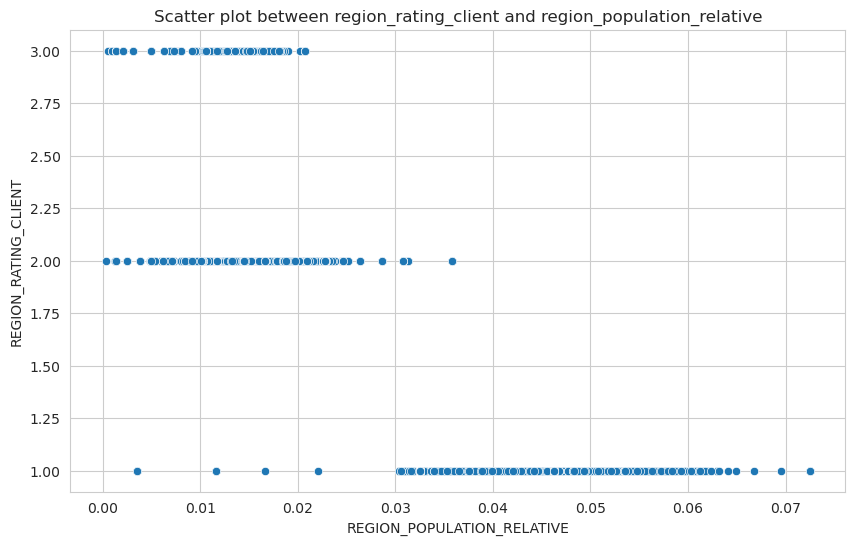

In [63]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x="REGION_POPULATION_RELATIVE", y="REGION_RATING_CLIENT")
plt.title("Scatter plot between region_rating_client and region_population_relative")
plt.show()

> #### <font> 거주지 등급이 높은 Group1 에서 표준화인구 수치가 높고 </font>
> #### <font> 거주지 등급이 낮은 Group2~3 에서 표준화인구 수치가 낮음 </font>
> #### <font>▶ 거주지 등급 group별로 표준화인구 수치별 연체율(TARGET율) 추이를 시각화 </font>

In [64]:
data1['REGION_POPULATION_RELATIVE']

0        0.018801
1        0.019839
2        0.018634
3        0.026392
4        0.009175
           ...   
23995    0.019636
23996    0.003813
23997    0.019717
23998    0.018029
23999    0.032561
Name: REGION_POPULATION_RELATIVE, Length: 24000, dtype: float64

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

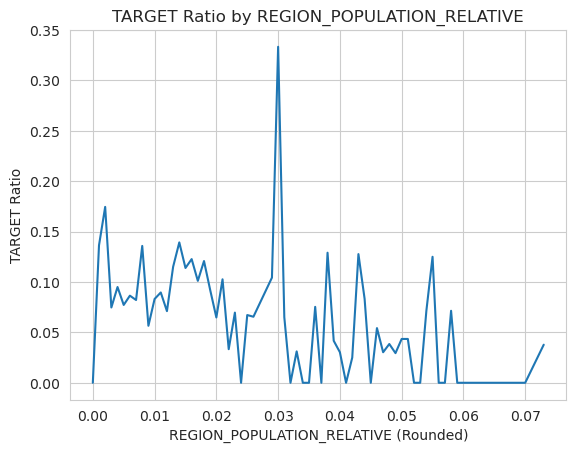

In [71]:
# 데이터프레임에서 필요한 열만 선택하여 새로운 데이터프레임 생성
df = data1[['REGION_POPULATION_RELATIVE', 'TARGET']]

# REGION_POPULATION_RELATIVE를 소수점 세자리까지 반올림
df['REGION_POPULATION_RELATIVE'] = df['REGION_POPULATION_RELATIVE'].round(3)

# 반올림한 REGION_POPULATION_RELATIVE 별로 그룹화하여 TARGET의 비율 계산
grouped = df.groupby('REGION_POPULATION_RELATIVE')['TARGET'].mean()

# x축과 y축 데이터 설정
x = grouped.index.values
y = grouped.values

# 그래프 그리기
plt.plot(x, y)
plt.xlabel('REGION_POPULATION_RELATIVE (Rounded)')
plt.ylabel('TARGET Ratio')
plt.title('TARGET Ratio by REGION_POPULATION_RELATIVE')
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

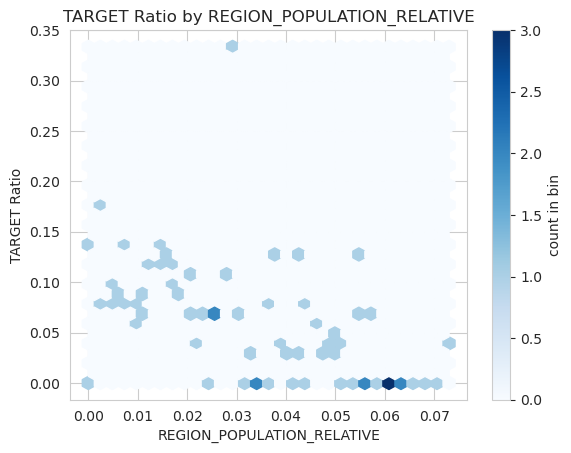

In [72]:
# 데이터프레임에서 필요한 열만 선택하여 새로운 데이터프레임 생성
df = data1[['REGION_POPULATION_RELATIVE', 'TARGET']]

# REGION_POPULATION_RELATIVE를 소수점 세자리까지 반올림
df['REGION_POPULATION_RELATIVE'] = df['REGION_POPULATION_RELATIVE'].round(3)

# 반올림한 REGION_POPULATION_RELATIVE 별로 그룹화하여 TARGET의 비율 계산
grouped = df.groupby('REGION_POPULATION_RELATIVE')['TARGET'].mean()

# x축과 y축 데이터 설정
x = grouped.index.values
y = grouped.values



plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')
plt.xlabel('REGION_POPULATION_RELATIVE')
plt.ylabel('TARGET Ratio')
plt.title('TARGET Ratio by REGION_POPULATION_RELATIVE')
plt.show()






> #### <font> 연체율 순으로 보면 연체율이 거의 없는 0.00 구간에 거주지역이 높을수록 다소 높은 빈도의 분포를 보임  </font>
> #### <font> 0.03 구간의 인구밀도를 보이는 지역에서 높은 연체율을 보이는데, 플롯을 보면 무조건 이 지역에 연체율이 높을 수 있다고 단정하기 힘들어보임 </font>

In [179]:
data1.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET', 'CODE_GENDER_predicted_flag',
       'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag',
       'REGION_POPULATION_RELATIVE_predicted_flag',
       'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag',
       'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUB

### 2-11. 이상치 탐색 EDA  <a id="s-2.11">
#### Chapter 1에서 AMT_INCOME_TOTAL, DAYS_EMPLOYED의 극단값을 발견해 대체/처리 진행함. 이 외 컬럼들의 "이상치"를 파악해보는 EDA 진행 

- #### 수치형 변수 이상치 검토

In [73]:
# 원래의 출력 형식 저장
original_format = pd.get_option('display.float_format')

# Pandas 출력 형식 변경
pd.set_option('display.float_format', '{:.2f}'.format)

outliers_summary = []

for feature in numerical_features:
    Q1 = data1[feature].quantile(0.25)
    Q3 = data1[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = data1[(data1[feature] < (Q1 - 1.5 * IQR)) | (data1[feature] > (Q3 + 1.5 * IQR))]
    outliers_count = len(outliers)
    total_count = len(data1)
    
    outliers_summary.append({
        'Feature': feature,
        'Total Data Points': total_count,
        'Outliers Count': outliers_count,
        'Max Outlier Value': outliers[feature].max() if outliers_count > 0 else None,
        'Min Outlier Value': outliers[feature].min() if outliers_count > 0 else None
    })

outliers_df = pd.DataFrame(outliers_summary)

print(outliers_df)

# Pandas 출력 형식을 원래대로 복구
pd.set_option('display.float_format', original_format)


                      Feature  Total Data Points  Outliers Count  \
0            AMT_INCOME_TOTAL              24000            1122   
1                  AMT_CREDIT              24000             699   
2  REGION_POPULATION_RELATIVE              24000            1744   
3                  DAYS_BIRTH              24000               0   
4               DAYS_EMPLOYED              24000             639   
5           DAYS_REGISTRATION              24000             719   
6             DAYS_ID_PUBLISH              24000               0   
7                  CB_SCORE_1              24000            1365   
8                  CB_SCORE_2              24000             807   
9                  CB_SCORE_3              24000            1449   

   Max Outlier Value  Min Outlier Value  
0         3375000.00          340200.00  
1         4050000.00         1416825.00  
2               0.07               0.04  
3                NaN                NaN  
4           -7475.00          -16852.00  

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

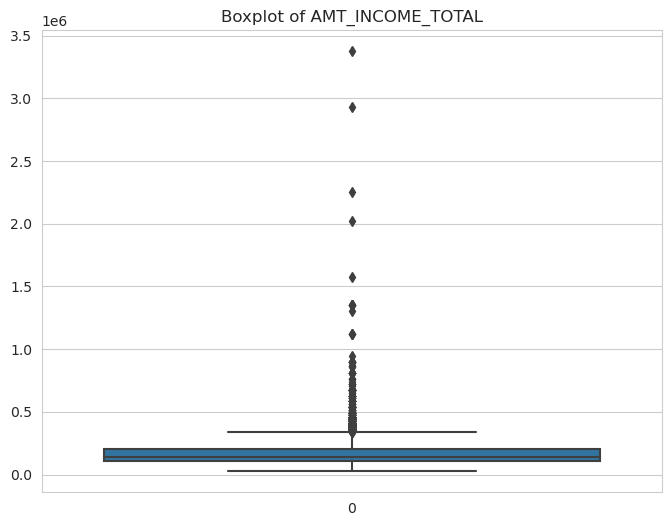

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

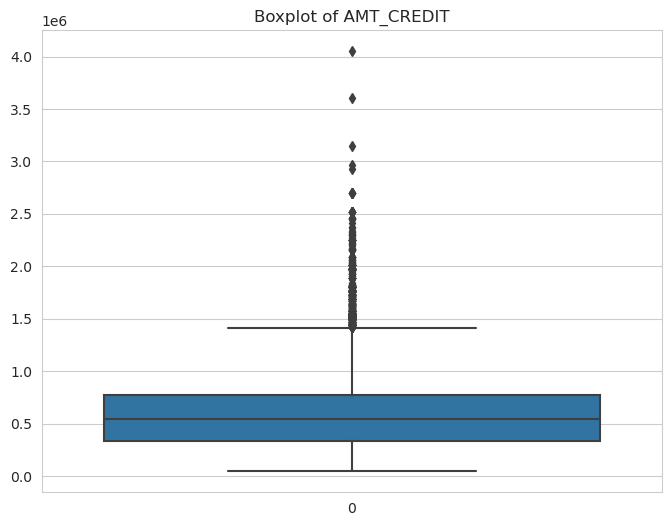

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

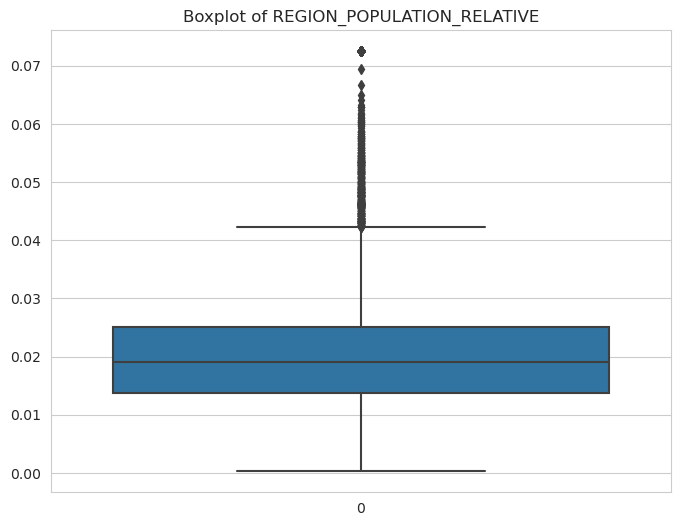

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

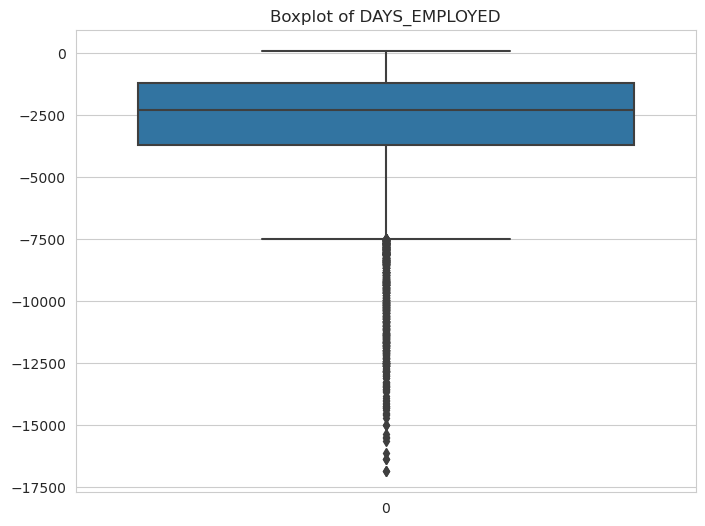

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

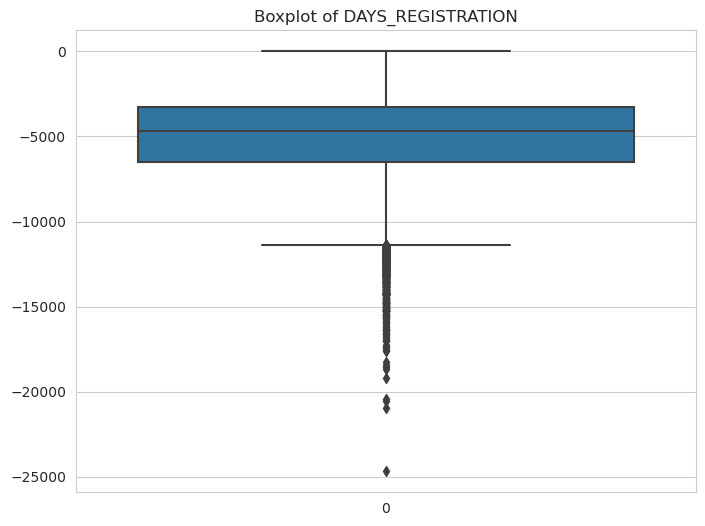

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

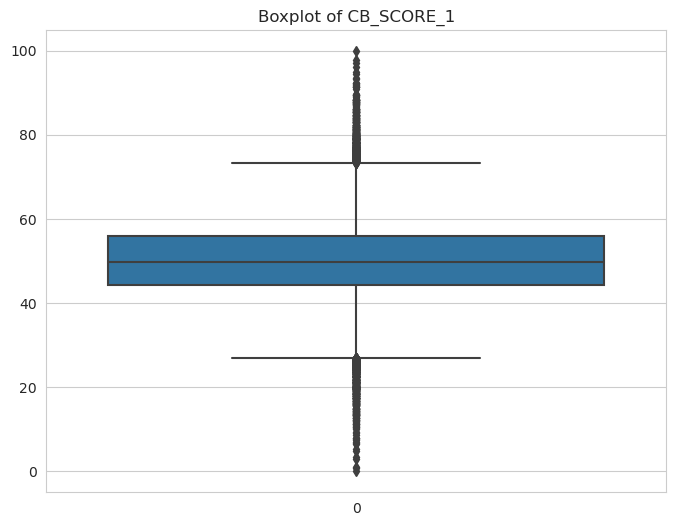

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

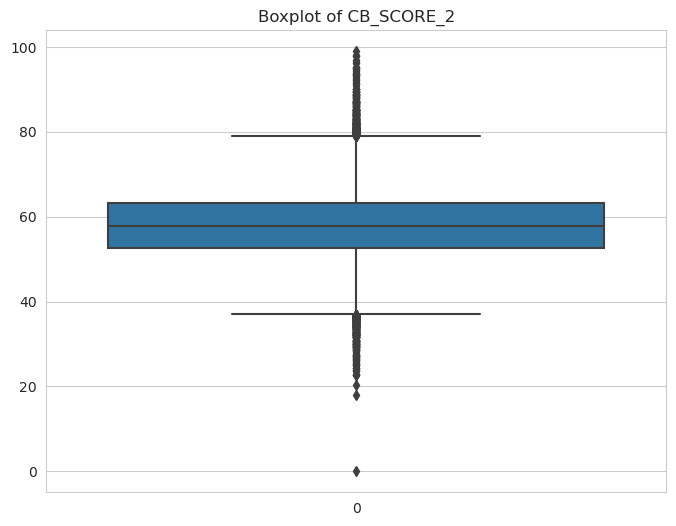

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

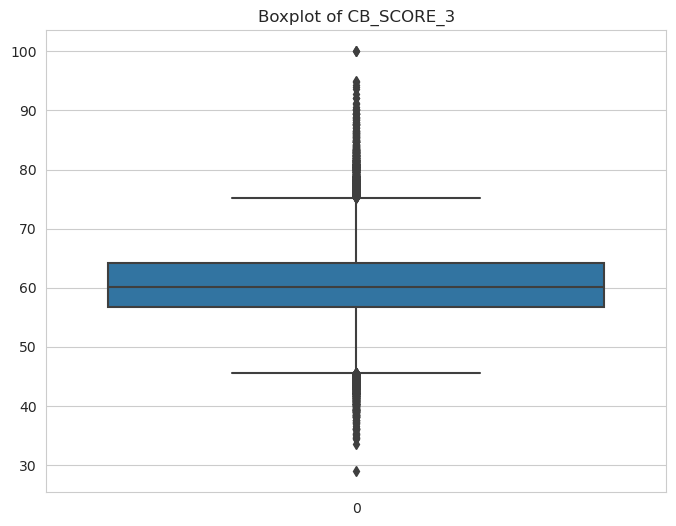

In [75]:

# 이상치가 있는 feature만 선택
features_with_outliers = outliers_df[outliers_df['Outliers Count'] > 0]['Feature'].tolist()

# 각 feature에 대한 박스플롯을 그립니다.
for feature in features_with_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data1[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


> #### <font> 결론 1. CB스코어는 최대 최소가 0~100을 이루기 때문에 이상치가 해당 범위에 들어감 </font>
> #### <font> ▶ 결측치 대체 및 대체 진행 안함 </font>

> #### <font> 결론 2. AMT_CREDIT(신용대출금액) 뿐만아니라 AMT_INCOME_TOTAL(소득금액), DAYS_EMPLOYED(근무일수), DAYS_REGISTRATION(고객정보등록일수) 모두 발생 가능한 데이터로 보여짐 </font> 
> #### <font> ▶ 결측치 대체 및 대체 진행 안함 </font>

### 2-3. 변수간 상관관계 파악을 통한 파생변수 Insight 얻기 <a id="s-2.3">

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

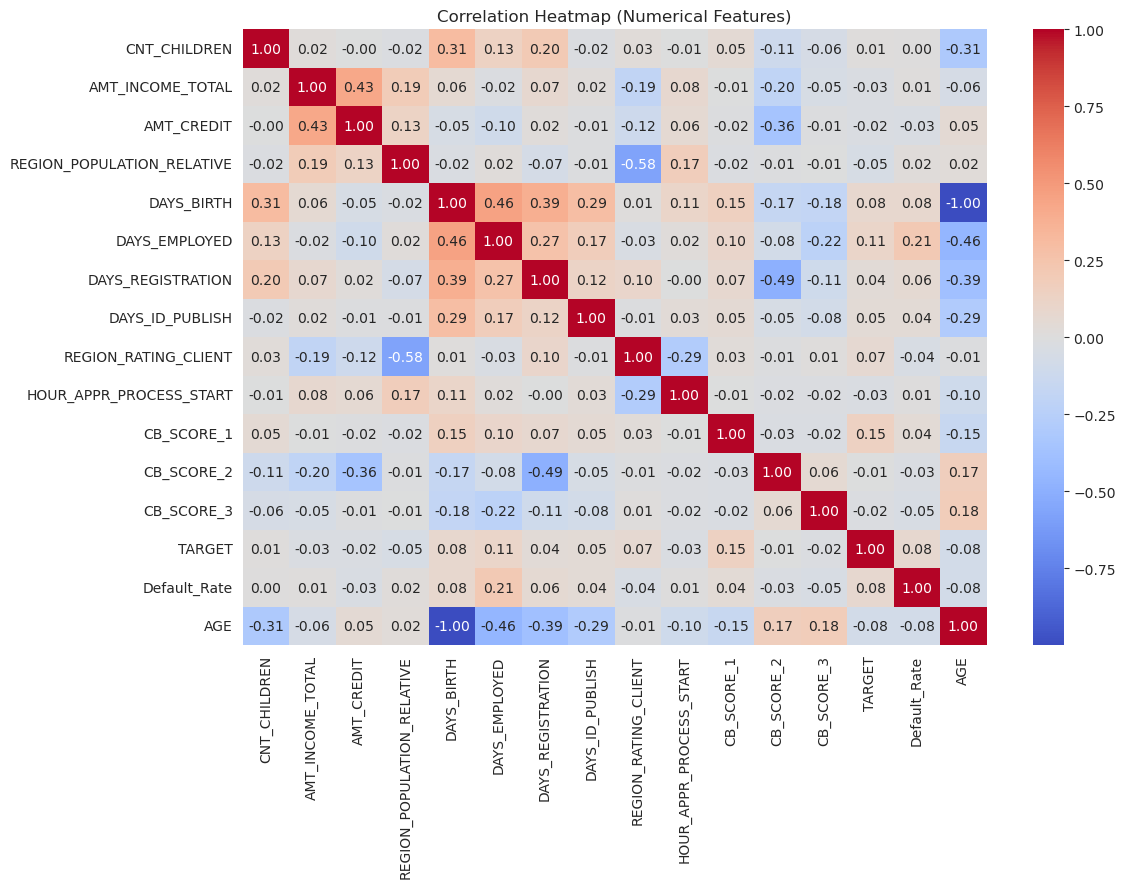

In [76]:
def plot_correlation_matrix(dataset):

    # 수치형 변수 간의 상관 행렬 계산
    correlation_matrix = dataset.corr()

    # 상관 히트맵 시각화
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap (Numerical Features)')
    plt.show()


# 예시 데이터셋을 넣어 함수 호출
plot_correlation_matrix(data1.select_dtypes(include=[np.number]))

> #### 1. DAYS_BIRTH & AGE: 약 -0.99의 상관계수를 보이는데, 이는 나이(AGE)와 태어난 일수(DAYS_BIRTH) 사이에 매우 강한 음의 상관관계가 있음을 의미. 즉, 두 변수는 서로 거의 동일한 정보를 지님.  
		
> #### 2. DAYS_BIRTH & DAYS_EMPLOYED: 약 0.46의 상관계수로, 나이가 많을수록 고용된 기간이 길어지는 경향. 
		
> #### 3. AMT_CREDIT & AMT_INCOME_TOTAL: 약 0.42의 상관계수를 갖음. 소득(AMT_INCOME_TOTAL)이 높은 사람들이 더 큰 금액의 대출(AMT_CREDIT)을 받는 경향.  
		
> #### 4. DAYS_REGISTRATION & CB_SCORE_2: 약 -0.49의 상관계수로, 정보 등록한 지 더 오래된 사람들이 CB_SCORE_2 점수가 낮은 경향.  

<Axes: xlabel='Importance', ylabel='Feature'>

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

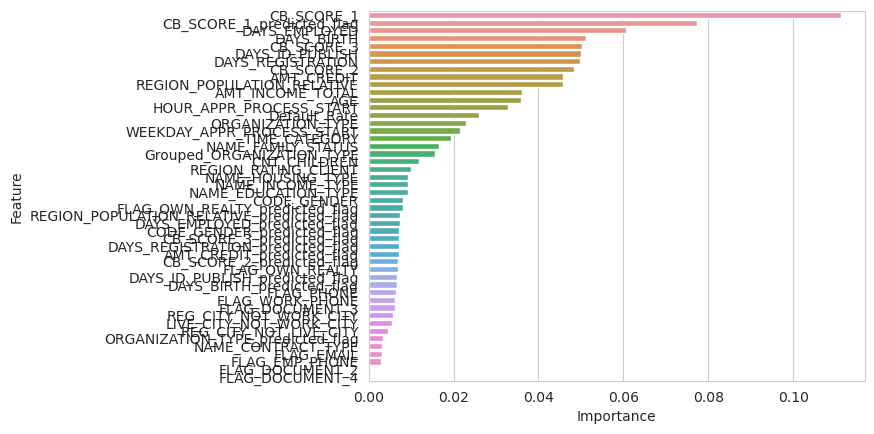

In [77]:

# 모든 문자열 컬럼을 찾아서 Label Encoding 적용
label_encoders = {}
for column in data1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data1[column] = le.fit_transform(data1[column])
    label_encoders[column] = le

# 이제 RandomForestClassifier에 fit 가능
rf = RandomForestClassifier()
rf.fit(data1.drop('TARGET', axis=1), data1['TARGET'])

feature_importances = pd.DataFrame({
    'Feature': data1.drop('TARGET', axis=1).columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)

In [78]:
feature_importances

Feature  Importance
29                                 CB_SCORE_1    0.111256
40                  CB_SCORE_1_predicted_flag    0.077297
12                              DAYS_EMPLOYED    0.060686
11                                 DAYS_BIRTH    0.051099
31                                 CB_SCORE_3    0.050357
14                            DAYS_ID_PUBLISH    0.050058
13                          DAYS_REGISTRATION    0.049844
30                                 CB_SCORE_2    0.048441
5                                  AMT_CREDIT    0.045835
10                 REGION_POPULATION_RELATIVE    0.045655
4                            AMT_INCOME_TOTAL    0.036045
47                                        AGE    0.035952
21                    HOUR_APPR_PROCESS_START    0.032750
44                               Default_Rate    0.025919
25                          ORGANIZATION_TYPE    0.022923
20                 WEEKDAY_APPR_PROCESS_START    0.021507
46                              TIME_CATEGORY    0.019490
8                          NAME_FAMILY_STATUS    0.016494
45                  Grouped_ORGANIZATION_TYPE    0.015544
3                                CNT_CHILDREN    0.011756
19                       REGION_RATING_CLIENT    0.010014
9                           NAME_HOUSING_TYPE    0.009225
6                            NAME_INCOME_TYPE    0.009199
7                         NAME_EDUCATION_TYPE    0.009156
1                                 CODE_GENDER    0.008173
33             FLAG_OWN_REALTY_predicted_flag    0.007985
35  REGION_POPULATION_RELATIVE_predicted_flag    0.007479
37               DAYS_EMPLOYED_predicted_flag    0.007399
32                 CODE_GENDER_predicted_flag    0.007237
42                  CB_SCORE_3_predicted_flag    0.007143
38           DAYS_REGISTRATION_predicted_flag    0.007099
34                  AMT_CREDIT_predicted_flag    0.007073
41                  CB_SCORE_2_predicted_flag    0.006955
2                             FLAG_OWN_REALTY    0.006844
39             DAYS_ID_PUBLISH_predicted_flag    0.006660
36                  DAYS_BIRTH_predicted_flag    0.006648
17                                 FLAG_PHONE    0.006332
16                            FLAG_WORK_PHONE    0.006262
27                            FLAG_DOCUMENT_3    0.006254
23                     REG_CITY_NOT_WORK_CITY    0.005673
24                    LIVE_CITY_NOT_WORK_CITY    0.005412
22                     REG_CITY_NOT_LIVE_CITY    0.004454
43           ORGANIZATION_TYPE_predicted_flag    0.003367
0                          NAME_CONTRACT_TYPE    0.003123
18                                 FLAG_EMAIL    0.003090
15                             FLAG_EMP_PHONE    0.002831
26                            FLAG_DOCUMENT_2    0.000005
28                            FLAG_DOCUMENT_4    0.000000

## 3. Feature Engineering  <a id="s-3">

### 3-1. 파생변수 설명  <a id="s-3.1">

#### 앞서 진행한 데이터 분포 및 데이터셋에 대한 전반적인 배경지식, 변수 중요도를 기반으로 파생변수를 생성

| **구분**              | **파생변수명**               | **파생변수명(영문)**             | **생성방법**                                      |
|:-----------------------|:---------------------------|:-----------------------------|:--------------------------------------------------|
| 파생변수1              | 연령                        | AGE                           | `생후경과일수/365`                                 |
| 파생변수2              | 근속개월                    | MONTH_EMPLOYED                | `근속일수/30`                                      |
| 파생변수3              | 최신정보등록경과개월        | DAYS_REGISTRATION_MONTH       | `정보등록경과일수/30`                             |
| 파생변수4              | 신분증변경경과개월          | DAYS_ID_PUBLISH_MONTH         | `신분증변경경과일수/30`                           |
| 파생변수5              | 소득대비신용대출비중        | ANNUITY_INCOME_PERCENT        | `신용대출잔액/연소득`                             |
| 파생변수6              | 정보등록여부                | CUST_REG_INFO_FLAG            | 전화번호 or email 등록여부                        |
| 파생변수7              | 정보등록여부2               | CUST_REG_INFO_FLAG2           | (직장)전화번호 or email 등록여부                  |
| 파생변수8              | 한부모가정 여부             | IS_SINGLE_PARENT              | 자녀1명이상 & Single or Widow                      |
| 파생변수9              | 신용점수_최소값             | MIN_CB_SCORE                  | 최소(CB_Score1,2,3)                               |
| 파생변수10            | 신용점수_중앙값             | MEDIAN_CB_SCORE               | 중앙(CB_Score1,2,3)                               |
| 파생변수11            | 신용점수_표준편차           | STD_CB_SCORE                  | 표준편차(CB_Score1,2,3)                           |
| 파생변수12            | 신용점수_최대값             | MAX_CB_SCORE                  | 최대(CB_Score1,2,3)                               |
| 파생변수13            | 신용점수_평균값             | AVG_CB_SCORE                  | 평균(CB_Score1,2,3)                               |
| 파생변수14            | 주말취급고객여부           | WEEKEND_APPR_PROCESS_START    | 대출일자=('토','일')                               |
| 파생변수15            | 자녀수대비소득             | CHILDREN_INCOME_PERCENT        | 소득/자녀수                                        |
| 파생변수16            | 근무기간대비나이           | DAYS_EMPLOYED_PERCENT         | 근무기간/나이                                     |
| 파생변수17            | 생후경과일수_제곱          | DAYS_BIRTH_SQUARE             | 생후경과일수^2                                     |
| 파생변수18            | 연체율기준_직업군           | Grouped_ORGANIZATION_TYPE     | 연체율이 비슷한 직업을 8개의 직업군으로 분류     |
| 파생변수19            | 대출시점상세               | TIME_CATEGORY                 | 대출요일 과 시간을 조합하여 재분류                |

     


- <b> 파생변수 1~4 </b> : 보편적인 기준을 적용하기 위해, 몇몇 일자단위의 컬럼은 년/월 형태로 변환. (나이, 근속개월 등이 포함)

- <b> 파생변수 5 </b> : 소득대비신용대출비중 파생변수는 DSR(Debt Service Ratio)의 개념과 유사하며, 고객의 금융 거래에 대한 중요한 지표로 활용

- <b> 파생변수 6~7 </b> : 고객등록정보 유무에 따라 연체율에 차이가 나타나기 때문에, 이를 반영한 파생변수 생성

- <b> 파생변수 8, 15 </b> : 가족 구성원 수에 따라 소득 대비 연체율이 변동할 것으로 예상되어, 이를 고려한 파생변수인 자녀수대비소득 및 한부모가정 변수 생성

- <b> 파생변수 9~13 </b> : CB_SCORE 값은 신용평가에서 중요한 역할을 하는데, 이를 고려하여 신용점수를 활용한 파생변수 생성, (최대값, 최소값 등이 포함)

- <b> 파생변수 14, 19 </b> : 대출 시점에 따라 연체율이 다를 수 있으므로, 대출 시점을 구분하는 파생변수 생성

- <b> 파생변수 18 </b> : 직업군에 따라 연체율이 다양하게 나타나며, 연체율이 유사한 직업군을 그룹화한 새로운 파생변수 생성

In [37]:
data2 = data1.copy()

### 3-2. 파생변수 생성 함수  <a id="s-3.2">

In [38]:
def derived_variable_maker(data_a):
    data = data_a.copy()
    data['AGE'] = round(data['DAYS_BIRTH'] / 365)*-1
    data['DAYS_REGISTRATION_MONTH'] = round(data['DAYS_REGISTRATION'] / 30)*-1
    data['MONTH_EMPLOYED'] = round(data['DAYS_EMPLOYED'] / 30)*-1
    data['DAYS_ID_PUBLISH_MONTH'] = round(data['DAYS_ID_PUBLISH'] / 30)*-1
    data['ANNUITY_INCOME_PERCENT'] = (data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL'])
    data['AVG_CB_SCORE'] = (data['CB_SCORE_1'] + data['CB_SCORE_2'] + data['CB_SCORE_3'])/3
    data['CUST_REG_INFO_FLAG'] =  data['FLAG_PHONE'] | data['FLAG_EMAIL']
    data['CUST_REG_INFO_FLAG2'] =  data['FLAG_EMP_PHONE'] | data['FLAG_WORK_PHONE'] 
    
    # 'IS_SINGLE_PARENT' 컬럼을 생성하고 모든 값을 'N'으로 초기화
    data['IS_SINGLE_PARENT'] = 'N'

    # 지정된 조건에 따라 값들을 'Y'로 업데이트
    data.loc[((data['NAME_FAMILY_STATUS'] == 'Single / not married') | 
               (data['NAME_FAMILY_STATUS'] == 'Widow')) & 
              (data['CNT_CHILDREN'] > 0), 'IS_SINGLE_PARENT'] = 'Y'
    data['MIN_CB_SCORE'] =data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].min(axis=1)
    data['MEDIAN_CB_SCORE'] =data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].median(axis=1)
    data['STD_CB_SCORE'] =data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].std(axis=1)
    data['MAX_CB_SCORE'] =data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].max(axis=1)
    data['WEEKEND_APPR_PROCESS_START'] = 'N'
    data.loc[(data['WEEKDAY_APPR_PROCESS_START'] == 'SUNDAY') | 
                         (data['WEEKDAY_APPR_PROCESS_START'] == 'SATURDAY'), 'WEEKEND_APPR_PROCESS_START'] = 'Y'
    data['CHILDREN_INCOME_PERCENT'] = (data['AMT_INCOME_TOTAL'] / (data['CNT_CHILDREN']+1)) * 10
    data['DAYS_EMPLOYED_PERCENT'] = (data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']) * 100
    data['DAYS_BIRTH_SQUARE'] = data['DAYS_BIRTH'] ** 2

    # 계산된 연체율을 저장할 새로운 열 추가
    data['Default_Rate'] = data.groupby('ORGANIZATION_TYPE')['TARGET'].transform('mean')

    # 연체율 기준으로 범주 묶기
    bins = pd.qcut(data['Default_Rate'], q=10, labels=False, duplicates='drop')
    data['Grouped_ORGANIZATION_TYPE'] = bins.apply(lambda x: f'Group_{x+1}')
    # 계산된 연체율 삭제
    data.drop('Default_Rate', axis=1, inplace=True)
    
    # Define weekday and weekend categories
    weekday = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY']
    weekend = ['SATURDAY', 'SUNDAY']

    # Define time categories
    time_categories = {
        (6, 11): "Morning",
        (11, 14): "lunch",
        (14, 18): "afternoon",
        (18, 24): "night",
        (0, 6): "night"
    }

    # Combine WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START columns
    data['TIME_CATEGORY'] = data.apply(lambda row: 
                                       ('Weekday' if row['WEEKDAY_APPR_PROCESS_START'] in weekday else 'weekend') + '_' +
                                       next((value for key, value in time_categories.items() if key[0] <= row['HOUR_APPR_PROCESS_START'] < key[1]), ''),
                                       axis=1)

    
    data = data.astype({'CUST_REG_INFO_FLAG': object, 'WEEKEND_APPR_PROCESS_START' : object,
                        'Grouped_ORGANIZATION_TYPE' : object, 'TIME_CATEGORY': object})
    
    return data



In [39]:
def Make_model_inputdata(Data):
    # 안쓸 컬럼 정의
    numeric_columns,categorical_columns,missing_values = columns_classification(Data)
    columns_to_exclude = ['SK_ID_CURR','TARGET']

    input_numeric_columns = [x for x in numeric_columns if x not in columns_to_exclude]
    input_numeric_columns


    X = Data[input_numeric_columns + categorical_columns].copy()
    y = Data['TARGET']

    # 범주형 변수 인코딩
    encoder = LabelEncoder()
    for col in categorical_columns:
        print(col)
        X[col] = encoder.fit_transform(X[col])

    # 데이터 스케일링
    scaler = StandardScaler()
    X[input_numeric_columns] = scaler.fit_transform(X[input_numeric_columns])


    # Split data into train and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=42)
    
    return  X_train, X_valid, y_train, y_valid




In [40]:
# 파생변수 완성본
data_adj = derived_variable_maker(data2)

In [47]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(data_adj)

total_columns : 63
numeric_columns : 26
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'STD_CB_SCORE', 'MAX_CB_SCORE', 'CHILDREN_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT', 'DAYS_BIRTH_SQUARE']
categorical_columns : 35
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted

In [49]:
# 저장하기

import pickle

# 데이터를 pickle 파일로 저장
file_path = "filled_data_adj_vf.pkl"
with open(file_path, "wb") as file:
    pickle.dump(data_adj, file)


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  DAYS_BIRTH  DAYS_EMPLOYED  \
146        0.800238         -0.886301    0.448582    0.280258      -1.333651   
21153     -0.574938          2.888057    0.218020    1.172692       0.698583   
15720      0.800238         -1.024387    0.218020    0.639716       0.999636   
15570     -0.574938          0.356476   -0.360871    0.137382       0.912555   
241       -0.574938         -0.564099   -0.019012    1.437371       0.678682   
...             ...               ...         ...         ...            ...   
21575     -0.574938         -0.103812    0.221064    0.132558       0.600056   
5390      -0.574938         -0.103812   -0.223956    0.186360       0.449794   
860       -0.574938         -0.333956    0.294874    0.457312      -0.710645   
15795     -0.574938         -1.024387   -1.205206   -0.502962      -0.092615   
23654     -0.574938         -0.333956   -0.087305   -1.258152      -0.593788   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  REGION_RATING_CLIENT  \
146            -1.907070         0.268340             -0.101333   
21153           1.202211         1.940542             -0.101333   
15720          -0.336199        -0.175784              1.853647   
15570           0.255172        -0.916462             -0.101333   
241             0.179310         0.766382             -0.101333   
...                  ...              ...                   ...   
21575           0.142389         0.437192             -0.101333   
5390           -1.058475        -1.186057             -0.101333   
860             0.928755        -1.165483             -0.101333   
15795           0.644008         0.934524             -0.101333   
23654          -1.189028         0.218677             -0.101333   

       HOUR_APPR_PROCESS_START  CB_SCORE_1  ...  \
146                   0.902433    0.363905  ...   
21153                 0.595113   -0.391793  ...   
15720                 0.287793   -0.668937  ...   
15570                 0.287793   -1.777873  ...   
241                   1.517074    1.182914  ...   
...                        ...         ...  ...   
21575                -0.019528    0.578753  ...   
5390                  0.595113    1.505562  ...   
860                   0.595113   -0.424830  ...   
15795                -0.941489    0.460593  ...   
23654                -0.941489   -0.425280  ...   

       DAYS_ID_PUBLISH_predicted_flag  CB_SCORE_1_predicted_flag  \
146                                 0                          0   
21153                               0                          0   
15720                               0                          0   
15570                               0                          0   
241                                 0                          0   
...                               ...                        ...   
21575                               0                          0   
5390                                0                          0   
860                                 0                          0   
15795                               0                          0   
23654                               0                          0   

       CB_SCORE_2_predicted_flag  CB_SCORE_3_predicted_flag  \
146                            0                          0   
21153                          0                          1   
15720                          0                          1   
15570                          0                          0   
241                            0                          0   
...                          ...                        ...   
21575                          0                          0   
5390                           1                          0   
860                            1                          0   
15795                          0                          0   
23654                          0                          0   

       ORGANIZATION_TYPE_predicted_flag  CUST_REG_INFO

## 4. Modeling <a id="s-4">

#### 결측 대체한 최종 데이터 및 파생변수 추가한 데이터셋으로 연체율(target) 예측에 최적화된 모형 채택 
- <b> 후보 알고리즘 </b> : DNN 딥러닝, LightGBM, GV, RandomForest 
- <b> 알고리즘별 최적화 진행 </b> : 각 알고리즘에 대한 Hyperparameter Tunning 진행
- <b> 모형 선택 기준 </b>: auc

### 4-0 최종 데이터 load  <a id="s-4.0">

- <b> FILLED_DATA : 원본 데이터(loan_customer)에 딥러닝 방법으로 결측 대체한 데이터 </b> 
- <b> FILLED_DATA_ADJ : FILLED_DATA에 파생변수를 붙인 데이터 </b> 

In [8]:
import pandas as pd


In [9]:
# FILLED_DATA = pd.read_pickle('C:/Users/mlosv/Downloads/23.08.22 데이터분석경진대회/filled_data_vf.pkl')
FILLED_DATA = pd.read_pickle('filled_data_vf.pkl')
FILLED_DATA

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0             Cash loans           M               Y             0   
1        Revolving loans           F               Y             0   
2             Cash loans           M               N             0   
3             Cash loans           M               N             2   
4             Cash loans           M               Y             0   
...                  ...         ...             ...           ...   
23995         Cash loans           F               Y             0   
23996         Cash loans           F               N             1   
23997         Cash loans           M               Y             0   
23998         Cash loans           F               Y             1   
23999         Cash loans           M               N             0   

       AMT_INCOME_TOTAL    AMT_CREDIT      NAME_INCOME_TYPE  \
0              202500.0  6.109991e+05               Working   
1               67500.0  1.350000e+05               Working   
2              108000.0  5.096025e+05               Working   
3              135000.0  5.696132e+05               Working   
4              202500.0  6.041520e+05               Working   
...                 ...           ...                   ...   
23995          135000.0  6.702981e+05             Pensioner   
23996           67500.0  4.905360e+05               Working   
23997          135000.0  9.956430e+05               Working   
23998          360000.0  1.417185e+06               Working   
23999          540000.0  1.099275e+06  Commercial associate   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0      Secondary / secondary special  Single / not married  House / apartment   
1      Secondary / secondary special  Single / not married  House / apartment   
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special               Married  House / apartment   
4      Secondary / secondary special               Married  House / apartment   
...                              ...                   ...                ...   
23995               Higher education               Married  House / apartment   
23996  Secondary / secondary special               Married  House / apartment   
23997               Higher education               Married  House / apartment   
23998               Higher education  Single / not married  House / apartment   
23999  Secondary / secondary special               Married   Rented apartment   

       ...  AMT_CREDIT_predicted_flag  \
0      ...                          Y   
1      ...                          N   
2      ...                          N   
3      ...                          Y   
4      ...                          N   
...    ...                        ...   
23995  ...                          Y   
23996  ...                          N   
23997  ...                          N   
23998  ...                          N   
23999  ...                          Y   

       REGION_POPULATION_RELATIVE_predicted_flag  DAYS_BIRTH_predicted_flag  \
0                                              N                          N   
1                                              Y                          N   
2                                              N                          N   
3                                              N                          N   
4                                              N                          Y   
...                                          ...                        ...   
23995                                          Y                          N   
23996                                          N                          N   
23997                                          Y                          Y   
23998                                          N                          N   
23999                                          N                         

In [10]:
# FILLED_DATA_ADJ = pd.read_pickle('C:/Users/mlosv/Downloads/23.08.22 데이터분석경진대회/filled_data_adj_vf.pkl')
FILLED_DATA_ADJ = pd.read_pickle('filled_data_adj_vf.pkl')
FILLED_DATA_ADJ

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0             Cash loans           M               Y             0   
1        Revolving loans           F               Y             0   
2             Cash loans           M               N             0   
3             Cash loans           M               N             2   
4             Cash loans           M               Y             0   
...                  ...         ...             ...           ...   
23995         Cash loans           F               Y             0   
23996         Cash loans           F               N             1   
23997         Cash loans           M               Y             0   
23998         Cash loans           F               Y             1   
23999         Cash loans           M               N             0   

       AMT_INCOME_TOTAL    AMT_CREDIT      NAME_INCOME_TYPE  \
0              202500.0  6.109991e+05               Working   
1               67500.0  1.350000e+05               Working   
2              108000.0  5.096025e+05               Working   
3              135000.0  5.696132e+05               Working   
4              202500.0  6.041520e+05               Working   
...                 ...           ...                   ...   
23995          135000.0  6.702981e+05             Pensioner   
23996           67500.0  4.905360e+05               Working   
23997          135000.0  9.956430e+05               Working   
23998          360000.0  1.417185e+06               Working   
23999          540000.0  1.099275e+06  Commercial associate   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0      Secondary / secondary special  Single / not married  House / apartment   
1      Secondary / secondary special  Single / not married  House / apartment   
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special               Married  House / apartment   
4      Secondary / secondary special               Married  House / apartment   
...                              ...                   ...                ...   
23995               Higher education               Married  House / apartment   
23996  Secondary / secondary special               Married  House / apartment   
23997               Higher education               Married  House / apartment   
23998               Higher education  Single / not married  House / apartment   
23999  Secondary / secondary special               Married   Rented apartment   

       ...  MIN_CB_SCORE  MEDIAN_CB_SCORE  STD_CB_SCORE  MAX_CB_SCORE  \
0      ...     55.684040        56.050804      1.444556     58.349224   
1      ...     26.499494        46.433666     15.755134     57.600542   
2      ...     50.768211        59.647892      6.527704     63.496369   
3      ...     45.996152        68.694333     18.375316     82.376245   
4      ...     56.640289        58.929722      4.991426     66.199985   
...    ...           ...              ...           ...           ...   
23995  ...     55.568876        56.609319      4.779470     64.318198   
23996  ...     51.115667        52.277538     16.238711     79.804871   
23997  ...     40.231662        51.533905      6.598281     51.782478   
23998  ...     47.338902        50.734878      6.390546     59.707773   
23999  ...     50.173294        58.329626     10.581722     71.163710   

       WEEKEND_APPR_PROCESS_START CHILDREN_INCOME_PERCENT  \
0                               N               2025000.0   
1                               N                675000.0   
2                               N               1080000.0   
3                               N                450000.0   
4                               N               2025000.0   
...                           ...                     ...   
23995                           Y               1350000.0   
23996                           N                337500.0   
23997    

### 4-1 모델링 후보 알고리즘  <a id="s-4.1">

- #### 후보 
     #### [1]DNN(딥러닝) [2]LightGBM  [3]GradientBoosting(GB)  [4]XGBoosting(XGB)  [5] RandomForest(RF)

### 4-2. DNN 딥러닝 방식  <a id="s-4.2">

In [14]:
def columns_classification(data):
    # 주어진 데이터를 수치형, 범주형, 결측치가 있는 컬럼으로 분류하여 뱉어냄.
    
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].index.to_list()

    numeric_columns = numeric_columns.to_list()
    numeric_columns = [x for x in numeric_columns if x not in missing_values]
    numeric_columns

    categorical_columns = categorical_columns.to_list()
    categorical_columns = [x for x in categorical_columns if x not in missing_values]
    categorical_columns    
    print('total_columns : ' + str(len(data.columns)))
    
    print('numeric_columns : ' + str(len(numeric_columns)))
    print(numeric_columns)
    print('categorical_columns : '+ str(len(categorical_columns)))
    print(categorical_columns)
    print('missing_values : '+ str(len(missing_values)))
    print(missing_values)
    return numeric_columns,categorical_columns,missing_values

In [15]:
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)


total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

### 4-2-1. DNN Tunning : Target 예측 최적화를 위한 모형 튜닝 <a id="s-4.2.1">
- loss 함수 변경, class 가중치 부여, Threshold 값 수정

In [16]:
from sklearn.utils import class_weight
# Compute the class weights
# class_weights = class_weight.compute_class_weight(class_weight= 'balanced', classes=np.unique(y_train), y=y_train)

# class_weights[1] = class_weights[1] * 0.5

# class_weights = {i: val for i, val in enumerate(class_weights)}
# class_weights

In [17]:
# weight주는건데 수정해보기
from tensorflow import keras
import tensorflow.keras.backend as K



def custom_loss(y_true, y_pred):
    # Calculate binary crossentropy loss
    bce = keras.losses.BinaryCrossentropy()
    base_loss = bce(y_true, y_pred)
    
    # Define weight for false positives
    fp_weight = 1
    fn_weight = 20
    
    # Add extra penalty for false positives
    y_pred_rounded = K.round(y_pred)
    fp_penalty = fp_weight * K.mean(K.cast(1 - y_true, 'float32') * K.cast(y_pred_rounded, 'float32'))
    fn_penalty = fn_weight * K.mean(K.cast(y_true,'float32') * K.cast(1 - y_pred_rounded,'float32'))
    
    return base_loss + fp_penalty  + fn_penalty

### <font color = red> over sampling 적용 (SMOTE) : 시간안되면 지우기 </font>

In [3]:
# from imblearn.over_sampling import SMOTENC

# def over_sampling(x,y):
#     smote = SMOTE(random_state=42)
#     X_res, y_res = smote.fit_resample(X, y)
#     return X_res, y_res

# # X_res, Y_res = over_sampling(X_train_dense,y)

### 4-2-2. 딥러닝 모델 학습 : loss 함수 조정 <a id="s-4.2.2">

In [22]:
import tensorflow.keras.backend as K

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [23]:

from sklearn.compose import make_column_transformer

# 안쓸 컬럼 정의
columns_to_exclude = ['SK_ID_CURR','TARGET']

input_numeric_columns = [x for x in numeric_columns if x not in columns_to_exclude]
input_numeric_columns

# Preprocessing for numerical data:
numerical_transformer = StandardScaler()

# Preprocessing for categorical data:
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = make_column_transformer(
    (numerical_transformer, input_numeric_columns),
    (categorical_transformer, categorical_columns)
)

X = FILLED_DATA[input_numeric_columns + categorical_columns]
y = FILLED_DATA['TARGET']



X_train_preprocessed= preprocessor.fit_transform(X)

X_train_dense = X_train_preprocessed.toarray()



X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_train_dense,y,test_size=0.3 ,random_state=42)




n_input_features=X_train_dense.shape[1]

In [24]:
# AUC METRIC만 출력

# dnn_model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(n_input_features,)),
#     tf.keras.layers.Dense(65, activation='relu'),
#     tf.keras.layers.Dropout(0.5),  # Dropout 추가
#     tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     tf.keras.layers.Dropout(0.5),  # Dropout 추가
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')  # 선형 활성화 함수 사용
# ])
# dnn_model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=[tf.keras.metrics.AUC()])


In [25]:
# 다양한 METRIC 출력, metric 파라미터는 학습에 영향을 주지 않음을 확인함.
# 학습에 영향을 주고 싶다면 3가지 방안이 있음 
# loss 함수 변경, class 가중치 부여, Threshold 값 수정
#loss=custom_loss,


dnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_input_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='tanh'),
    BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout 추가
    BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 선형 활성화 함수 사용
])


learning_rate = 0.0007  # Set your desired learning rate

optimizer = Adam(learning_rate=learning_rate)

dnn_model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', specificity])


#### 기본 모델

In [26]:

early_stopping_dnn = EarlyStopping(monitor='val_auc', patience=7, restore_best_weights=True)

dnn_model.fit(X_train_full, y_train, batch_size=20, epochs=30,
                  validation_data=(X_valid_full, y_valid), verbose=2,
                 callbacks=[early_stopping_dnn])

Epoch 1/30
840/840 - 8s - loss: 0.9558 - accuracy: 0.8188 - auc: 0.4960 - specificity: 0.8845 - val_loss: 0.3174 - val_accuracy: 0.9196 - val_auc: 0.5899 - val_specificity: 1.0000 - 8s/epoch - 10ms/step
Epoch 2/30
840/840 - 4s - loss: 0.3177 - accuracy: 0.9144 - auc: 0.5431 - specificity: 0.9984 - val_loss: 0.2850 - val_accuracy: 0.9196 - val_auc: 0.6016 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 3/30
840/840 - 4s - loss: 0.2966 - accuracy: 0.9158 - auc: 0.5628 - specificity: 1.0000 - val_loss: 0.2761 - val_accuracy: 0.9196 - val_auc: 0.6708 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 4/30
840/840 - 4s - loss: 0.2894 - accuracy: 0.9158 - auc: 0.5991 - specificity: 1.0000 - val_loss: 0.2704 - val_accuracy: 0.9196 - val_auc: 0.6984 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 5/30
840/840 - 4s - loss: 0.2837 - accuracy: 0.9158 - auc: 0.6343 - specificity: 1.0000 - val_loss: 0.2678 - val_accuracy: 0.9196 - val_auc: 0.6978 - val_specificity: 1.0000 - 4s/epoch 

### 4-2-3. 딥러닝 모델 학습 : class 가중치 조정 <a id="s-4.2.3">

In [185]:
dnn_model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', specificity])


early_stopping_dnn = EarlyStopping(monitor='val_auc', patience=5)

dnn_model.fit(X_train_full, y_train, batch_size=25, epochs=10,
                  validation_data=(X_valid_full, y_valid), verbose=2,
               class_weight=class_weights,
                 callbacks=[early_stopping_dnn])


Epoch 1/10
672/672 - 5s - loss: 0.4375 - accuracy: 0.7665 - auc: 0.7809 - specificity: 0.7805 - val_loss: 0.3938 - val_accuracy: 0.7960 - val_auc: 0.6989 - val_specificity: 0.8286 - 5s/epoch - 7ms/step
Epoch 2/10
672/672 - 3s - loss: 0.4417 - accuracy: 0.7730 - auc: 0.7761 - specificity: 0.7895 - val_loss: 0.3944 - val_accuracy: 0.7983 - val_auc: 0.6976 - val_specificity: 0.8325 - 3s/epoch - 5ms/step
Epoch 3/10
672/672 - 3s - loss: 0.4349 - accuracy: 0.7770 - auc: 0.7846 - specificity: 0.7932 - val_loss: 0.4019 - val_accuracy: 0.8240 - val_auc: 0.6914 - val_specificity: 0.8706 - 3s/epoch - 5ms/step
Epoch 4/10
672/672 - 4s - loss: 0.4339 - accuracy: 0.7636 - auc: 0.7842 - specificity: 0.7768 - val_loss: 0.4001 - val_accuracy: 0.7932 - val_auc: 0.6922 - val_specificity: 0.8275 - 4s/epoch - 5ms/step
Epoch 5/10
672/672 - 4s - loss: 0.4371 - accuracy: 0.7752 - auc: 0.7837 - specificity: 0.7898 - val_loss: 0.3910 - val_accuracy: 0.8167 - val_auc: 0.6879 - val_specificity: 0.8587 - 4s/epoch -

#### custom loss
안되는듯..

In [168]:
dnn_model.compile(optimizer=optimizer,
              loss=custom_loss,
              metrics=['accuracy', 'AUC', specificity])
early_stopping_dnn = EarlyStopping(monitor='val_auc', patience=5)

dnn_model.fit(X_train_full, y_train, batch_size=20, epochs=10,
                  validation_data=(X_valid_full, y_valid), verbose=2,
               class_weight=class_weights,
                 callbacks=[early_stopping_dnn])

Epoch 1/10
840/840 - 6s - loss: 1.2929 - accuracy: 0.8619 - auc: 0.6703 - specificity: 0.9271 - val_loss: 1.8753 - val_accuracy: 0.9196 - val_auc: 0.6960 - val_specificity: 1.0000 - 6s/epoch - 7ms/step
Epoch 2/10
840/840 - 4s - loss: 1.3780 - accuracy: 0.9158 - auc: 0.7315 - specificity: 1.0000 - val_loss: 1.8740 - val_accuracy: 0.9196 - val_auc: 0.6978 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 3/10
840/840 - 4s - loss: 1.3800 - accuracy: 0.9158 - auc: 0.7394 - specificity: 1.0000 - val_loss: 1.8749 - val_accuracy: 0.9196 - val_auc: 0.6938 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 4/10
840/840 - 4s - loss: 1.3685 - accuracy: 0.9158 - auc: 0.7415 - specificity: 1.0000 - val_loss: 1.8759 - val_accuracy: 0.9196 - val_auc: 0.6961 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 5/10
840/840 - 5s - loss: 1.3692 - accuracy: 0.9158 - auc: 0.7382 - specificity: 1.0000 - val_loss: 1.8755 - val_accuracy: 0.9196 - val_auc: 0.6851 - val_specificity: 1.0000 - 5s/epoch -

225/225 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

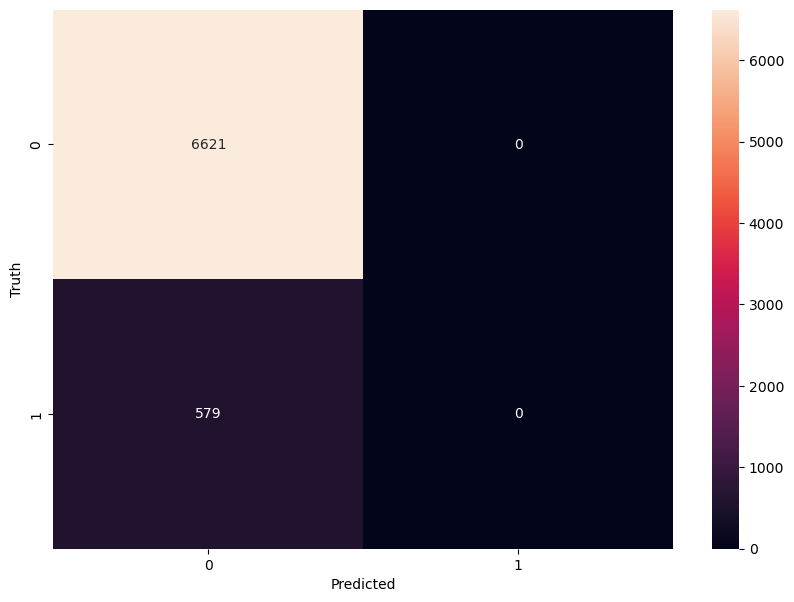

In [32]:
from sklearn.metrics import confusion_matrix
predictions = dnn_model.predict(X_valid_full)
predicted_classes = (predictions > 0.5).astype(int)
predicted_classes

cm = confusion_matrix(y_valid, predicted_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 4-3.기본 ML 모형들에 대한 성능 평가 <a id="s-4.3">

In [25]:
def Make_model_inputdata(Data):
    # 안쓸 컬럼 정의
    numeric_columns,categorical_columns,missing_values = columns_classification(Data)
    columns_to_exclude = ['SK_ID_CURR','TARGET']

    input_numeric_columns = [x for x in numeric_columns if x not in columns_to_exclude]
    input_numeric_columns


    X = Data[input_numeric_columns + categorical_columns].copy()
    y = Data['TARGET']

    # 범주형 변수 인코딩
    encoder = LabelEncoder()
    for col in categorical_columns:
        print(col)
        X[col] = encoder.fit_transform(X[col])

    # 데이터 스케일링
    scaler = StandardScaler()
    X[input_numeric_columns] = scaler.fit_transform(X[input_numeric_columns])


    # Split data into train and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=42)
    
    return  X_train, X_valid, y_train, y_valid




In [26]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb


# Train a RandomForest model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train,y_train)

# Train a SVM model
svm_model=SVC()
svm_model.fit(X_train,y_train)

# Train a LightGBM model
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)


# Train a XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train,y_train)

# Train a Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(n_estimators=100)
brf_model.fit(X_train,y_train)

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)




ModuleNotFoundError: No module named 'lightgbm'

### 4-3-1. ML 알고리즘(LightGBM, GB, XGB, RF)에 대한 기본 성능 평가  <a id="s-4.3.1">

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume that y_valid are the true labels and y_pred are the predicted labels.
y_pred_rf = random_forest_model.predict(X_valid)
y_pred_svm = svm_model.predict(X_valid)
y_pred_lgbm = lgbm_model.predict(X_valid)
y_pred_dnn = predicted_classes
y_pred_xgb = xgb_model.predict(X_valid)
y_pred_brf = brf_model.predict(X_valid)
y_pred_gb = gb_model.predict(X_valid)



models = ['Random Forest', 'lgbm', 'dnn', 'xgb', 'brf', 'gb']
predictions = [y_pred_rf, y_pred_lgbm,  y_pred_dnn, y_pred_xgb, y_pred_brf, y_pred_gb]

for i,model in enumerate(models):
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_valid,predictions[i]))
    print("Precision:", precision_score(y_valid,predictions[i]))
    print("Recall:", recall_score(y_valid,predictions[i]))
    print("F1-Score:", f1_score(y_valid,predictions[i]))
    # For AUC-ROC score we need probability estimates of the positive class
    # Not all models have a predict_proba method (like SVC), hence we check if it exists
    if hasattr(eval(model.lower().replace(' ', '_')+'_model'), "predict_proba"):
        print("AUC-ROC:", roc_auc_score(y_valid,
              eval(model.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
        print()

NameError: name 'random_forest_model' is not defined

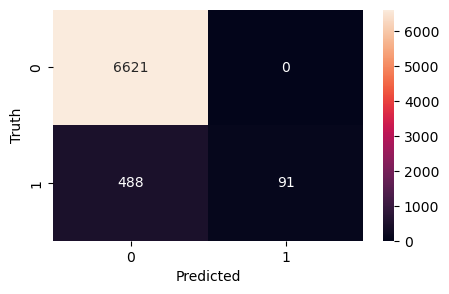

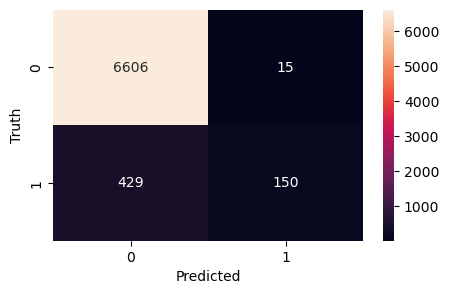

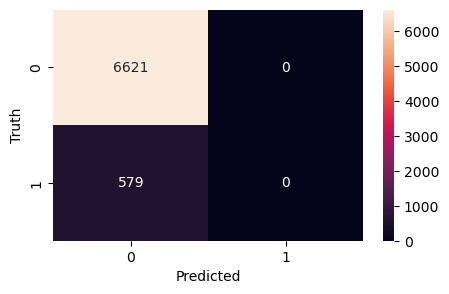

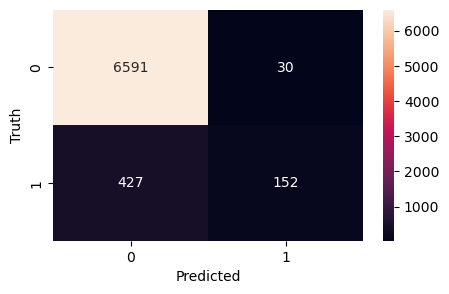

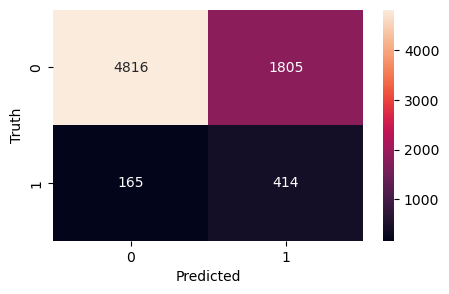

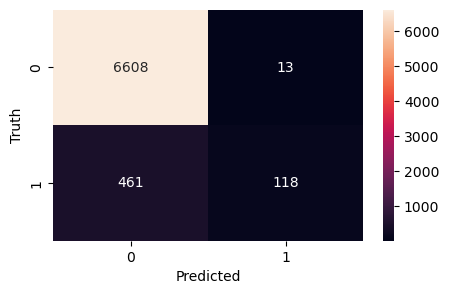

In [37]:
for i in predictions:
    cm = confusion_matrix(y_valid, i)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

### 파생변수 포함

In [42]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 64
numeric_columns : 27
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'STD_CB_SCORE', 'MAX_CB_SCORE', 'CHILDREN_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT', 'DAYS_BIRTH_SQUARE']
categorical_columns : 36
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_fla

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb

# Train a RandomForest model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train,y_train)

# Train a SVM model
svm_model=SVC()
svm_model.fit(X_train,y_train)

# Train a LightGBM model
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)


# Train a XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train,y_train)

# Train a Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(n_estimators=100)
brf_model.fit(X_train,y_train)

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)




ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\mlosv\anaconda3_v2\Lib\site-packages\sklearn\utils\_param_validation.py)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume that y_valid are the true labels and y_pred are the predicted labels.
y_pred_rf = random_forest_model.predict(X_valid)
y_pred_svm = svm_model.predict(X_valid)
y_pred_lgbm = lgbm_model.predict(X_valid)
y_pred_dnn = predicted_classes
y_pred_xgb = xgb_model.predict(X_valid)
y_pred_brf = brf_model.predict(X_valid)
y_pred_gb = gb_model.predict(X_valid)



models = ['Random Forest', 'lgbm', 'dnn', 'xgb', 'brf', 'gb']
predictions = [y_pred_rf, y_pred_lgbm,  y_pred_dnn, y_pred_xgb, y_pred_brf, y_pred_gb]

for i,model in enumerate(models):
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_valid,predictions[i]))
    print("Precision:", precision_score(y_valid,predictions[i]))
    print("Recall:", recall_score(y_valid,predictions[i]))
    print("F1-Score:", f1_score(y_valid,predictions[i]))
    # For AUC-ROC score we need probability estimates of the positive class
    # Not all models have a predict_proba method (like SVC), hence we check if it exists
    if hasattr(eval(model.lower().replace(' ', '_')+'_model'), "predict_proba"):
        print("AUC-ROC:", roc_auc_score(y_valid,
              eval(model.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
        print()

Model: Random Forest
Accuracy: 0.9305555555555556
Precision: 1.0
Recall: 0.13644214162348878
F1-Score: 0.2401215805471125
AUC-ROC: 0.7919610732481226

Model: lgbm
Accuracy: 0.9375
Precision: 0.8909090909090909
Recall: 0.2538860103626943
F1-Score: 0.3951612903225807
AUC-ROC: 0.8516730797673912

Model: dnn
Accuracy: 0.9195833333333333
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Model: xgb
Accuracy: 0.9351388888888889
Precision: 0.788659793814433
Recall: 0.26424870466321243
F1-Score: 0.3958602846054334
AUC-ROC: 0.8344293122917894

Model: brf
Accuracy: 0.71875
Precision: 0.1837270341207349
Recall: 0.7253886010362695
F1-Score: 0.2931937172774869


C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC-ROC: 0.79942776412206

Model: gb
Accuracy: 0.9348611111111111
Precision: 0.9166666666666666
Recall: 0.20898100172711573
F1-Score: 0.340365682137834
AUC-ROC: 0.8261571036209434



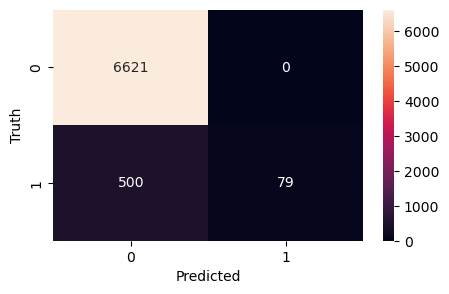

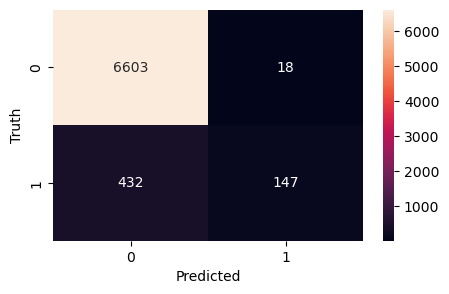

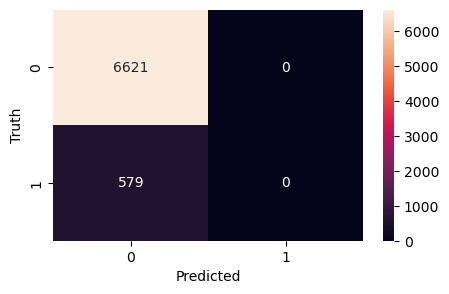

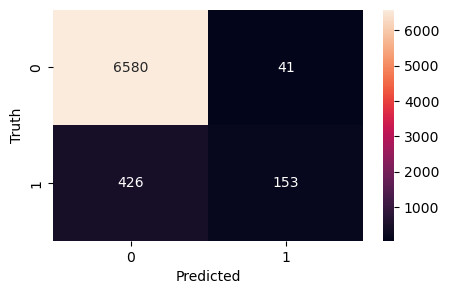

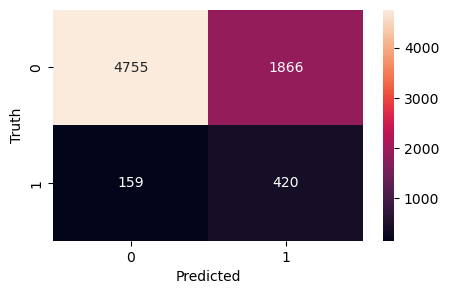

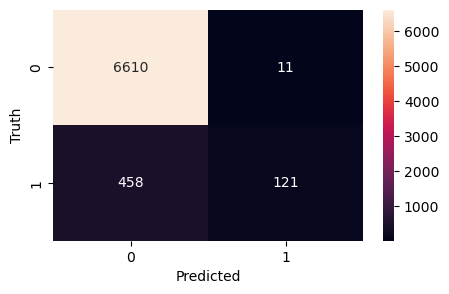

In [41]:
for i in predictions:
    cm = confusion_matrix(y_valid, i)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

### 4-4. LightGBM 방식  <a id="s-4.4">

- Learning rate 하이퍼파라미터 튜닝시에는 0.1~0.3 정도의 값을 사용하고, 최종 모형 학습시에는 0.05이하의 값을 사용하는 것이 좋다.  
- xgboost에서 디폴트 값은 0.3, lightgbm에서 디폴트 값은 0.1인
- lightgbm 같이 leaf-wise로 학습하는 경우에는 max_depth를 -1로 설정하는 것이 효과적이라고 알려져 있다. 경험적으로 보았을때도 lightgbm은 디폴트 설정을 사용할때가 보통 성능이 가장 좋았고, xgboost의 경우 max_depth에 따른 성능 차이가 큰 경우가 많았다.

- Maximum Leaves = 2^depth-1 의 관계가 있다. 예를 들어, Maximum Depth가 10인 경우 Maximum Leaves는 1023이다.



In [82]:
#X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 64
numeric_columns : 27
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'STD_CB_SCORE', 'MAX_CB_SCORE', 'CHILDREN_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT', 'DAYS_BIRTH_SQUARE']
categorical_columns : 36
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_fla

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a LightGBM model
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)

y_pred_lgbm = lgbm_model.predict(X_valid)
models = 'lgbm'
predictions = y_pred_lgbm


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

Model: lgbm
Accuracy: 0.9375
Precision: 0.8909090909090909
Recall: 0.2538860103626943
F1-Score: 0.3951612903225807
AUC-ROC: 0.8516730797673912



### 4-4-1 LightGBM Tunning : Random Search을 사용한 Best Parameter 탐색 <a id="s-4.4.1">

In [73]:
def random_search_func():
    param_grid = {
        'n_estimators': [100, 200, 220, 250, 280, 300],
        'learning_rate': [ 0.05, 0.1],
        'max_depth': [-1, 3, 5],
        'num_leaves': [23, 25,31, 50],
        'min_child_samples': [20, 30 ,35, 40,45],
        'objective': ['binary'],
        'is_unbalance' : [True],

    }

    lgbm_model = LGBMClassifier(random_state=42)

    # Use stratified k-fold cross-validation for better generalization
    cv = StratifiedKFold(n_splits=5)

    # Use randomized search over the parameter grid (more efficient than exhaustive grid search)
    random_search = RandomizedSearchCV(lgbm_model,
                                       param_distributions=param_grid,
                                       n_iter=20,
                                       scoring='roc_auc',
                                       cv=cv,
                                       random_state=42)
    # Fit it to your data and find optimal hyperparameters
    random_search.fit(X_train,y_train)

    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best score: {random_search.best_score_}")

    # Use the best estimator found by random search for prediction 
    y_pred_lgbm_random = random_search.best_estimator_.predict(X_valid)
    return random_search.best_params_



### 4-4-2 LightGBM Tunning : Bayesian Optimization을 사용한 Best Parameter 탐색 <a id="s-4.4.2">

In [74]:
def Bayesian_Optimization_func():
    # Suppress warnings
    warnings.filterwarnings("ignore")
    # Define the objective function to be optimized
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.003, 0.5),
            'max_depth': trial.suggest_int('max_depth', -1, 25),
            'num_leaves': trial.suggest_int('num_leaves', 2, 256),
            'min_child_samples': trial.suggest_int('min_child_samples', 3, 200),
            'min_child_weight': trial.suggest_loguniform('min_child_weight',1e-5 ,1e-2), 
            'subsample': trial.suggest_uniform('subsample',0.6 ,1.0), 
            'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.6 ,1.0),
            'reg_alpha': trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
            'reg_lambda': trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
            'is_unbalance' : True,
    # is_unbalace 변수 둘중 하나만 써야함
    #         'scale_pos_weight' : 11.042147516307075 ,
        }

        model = LGBMClassifier(verbose=-1, random_state=42 ,**params)
        model.fit(X_train,y_train)

        y_pred = model.predict_proba(X_valid)[:,1]

        return roc_auc_score(y_valid,y_pred)

    # Initialize a study object
    study = optuna.create_study(direction='maximize')

    # Optimize the study (this could take some time depending on how many evaluations we do)
    study.optimize(objective,n_trials=30)

    print(f"Best parameters: {study.best_params}")
    print(f"Best score: {study.best_value}")

    # Use the best estimator found by Optuna for prediction 
    best_params= study.best_params
    lgbm_model_best=LGBMClassifier(verbose=-1,**best_params)
    lgbm_model_best.fit(X_train,y_train)

    y_pred_lgbm_optuna = lgbm_model_best.predict(X_valid)
    return study.best_params

### Test Model

In [75]:
def test_model(best_param):

    # test model

    # Use the best estimator found by Optuna for prediction 
    best_params= best_param
    lgbm_model=LGBMClassifier(verbose=-1,**best_params)
    lgbm_model.fit(X_train,y_train)
    y_pred_lgbm = lgbm_model.predict(X_valid)
    models = 'lgbm'
    predictions = y_pred_lgbm
    print(f"Model: {models}")
    print("Accuracy:", accuracy_score(y_valid,predictions))
    print("Precision:", precision_score(y_valid,predictions))
    print("Recall:", recall_score(y_valid,predictions))
    print("F1-Score:", f1_score(y_valid,predictions))
    # For AUC-ROC score we need probability estimates of the positive class
    # Not all models have a predict_proba method (like SVC), hence we check if it exists
    if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
        print("AUC-ROC:", roc_auc_score(y_valid,
              eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
        print()
    cm = confusion_matrix(y_valid, y_pred_lgbm)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

### Best parmeter 탐색

In [77]:
# hyper parameter tune
lgbm_param_list=[]
lgbm_adj_param_list=[]
for i in range(2):
    if i==0:
        X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
        Bayesian_param = Bayesian_Optimization_func()
        Randomsearch_param = random_search_func()
        lgbm_param_list.append(Bayesian_param)
        lgbm_param_list.append(Randomsearch_param)
        
    elif i==1:
        X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)
        Bayesian_param = Bayesian_Optimization_func()
        Randomsearch_param = random_search_func()
        lgbm_adj_param_list.append(Bayesian_param)
        lgbm_adj_param_list.append(Randomsearch_param)   

total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

[I 2023-09-23 12:42:16,882] A new study created in memory with name: no-name-e8010b2b-f708-44d0-9386-79fed6cfb78d


DAYS_REGISTRATION_predicted_flag
DAYS_ID_PUBLISH_predicted_flag
CB_SCORE_1_predicted_flag
CB_SCORE_2_predicted_flag
CB_SCORE_3_predicted_flag
ORGANIZATION_TYPE_predicted_flag


[I 2023-09-23 12:42:29,755] Trial 0 finished with value: 0.8436893758515259 and parameters: {'n_estimators': 296, 'learning_rate': 0.021490412434365534, 'max_depth': 18, 'num_leaves': 120, 'min_child_samples': 61, 'min_child_weight': 0.005494455737472146, 'subsample': 0.7864446423748724, 'colsample_bytree': 0.8437873705451748, 'reg_alpha': 0.05164998717512754, 'reg_lambda': 3.844064144316928e-06}. Best is trial 0 with value: 0.8436893758515259.
[I 2023-09-23 12:42:39,191] Trial 1 finished with value: 0.8224939279661536 and parameters: {'n_estimators': 475, 'learning_rate': 0.3944008654103427, 'max_depth': 23, 'num_leaves': 219, 'min_child_samples': 106, 'min_child_weight': 0.0002144529326120596, 'subsample': 0.8386058468409532, 'colsample_bytree': 0.7234628566460114, 'reg_alpha': 0.00014550541102928977, 'reg_lambda': 6.884301119405094e-06}. Best is trial 0 with value: 0.8436893758515259.
[I 2023-09-23 12:42:40,846] Trial 2 finished with value: 0.8448423514546144 and parameters: {'n_est

Best parameters: {'n_estimators': 355, 'learning_rate': 0.03878289964327142, 'max_depth': 8, 'num_leaves': 88, 'min_child_samples': 107, 'min_child_weight': 0.007454351320487457, 'subsample': 0.9964939210890954, 'colsample_bytree': 0.7999127606920181, 'reg_alpha': 0.005993977405279238, 'reg_lambda': 0.1795154691019076}
Best score: 0.851791507578206
Best parameters: {'objective': 'binary', 'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 35, 'max_depth': -1, 'learning_rate': 0.05, 'is_unbalance': True}
Best score: 0.8396643064106604
total_columns : 64
numeric_columns : 27
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'S

[I 2023-09-23 12:48:21,177] A new study created in memory with name: no-name-1271c0f4-6c31-43e2-84cf-9ee0249ceca6


TIME_CATEGORY


[I 2023-09-23 12:48:22,705] Trial 0 finished with value: 0.8292453565994418 and parameters: {'n_estimators': 263, 'learning_rate': 0.4827484911966425, 'max_depth': 3, 'num_leaves': 223, 'min_child_samples': 140, 'min_child_weight': 0.0012243122234907595, 'subsample': 0.8116109729702115, 'colsample_bytree': 0.6407901056450074, 'reg_alpha': 8.995751633675286e-07, 'reg_lambda': 0.0001861680984073014}. Best is trial 0 with value: 0.8292453565994418.
[I 2023-09-23 12:48:40,963] Trial 1 finished with value: 0.8515989971720795 and parameters: {'n_estimators': 336, 'learning_rate': 0.08795551142282688, 'max_depth': 20, 'num_leaves': 147, 'min_child_samples': 65, 'min_child_weight': 9.408032771421997e-05, 'subsample': 0.7795009712898716, 'colsample_bytree': 0.8934853558713318, 'reg_alpha': 0.0007886405847125344, 'reg_lambda': 6.770295569558383e-08}. Best is trial 1 with value: 0.8515989971720795.
[I 2023-09-23 12:48:47,534] Trial 2 finished with value: 0.8348158982292955 and parameters: {'n_est

Best parameters: {'n_estimators': 478, 'learning_rate': 0.03920553977495737, 'max_depth': 6, 'num_leaves': 171, 'min_child_samples': 105, 'min_child_weight': 0.00039160645654488644, 'subsample': 0.7721392896932741, 'colsample_bytree': 0.9658205564265071, 'reg_alpha': 3.892981046508457e-06, 'reg_lambda': 1.0122207957232107e-06}
Best score: 0.8604145651599467
Best parameters: {'objective': 'binary', 'num_leaves': 25, 'n_estimators': 200, 'min_child_samples': 45, 'max_depth': -1, 'learning_rate': 0.05, 'is_unbalance': True}
Best score: 0.8464605596350839


### 4-4-3 최종 auc 확인 <a id="s-4.4.3">

In [78]:
lgbm_parm_total_list = [lgbm_param_list,lgbm_adj_param_list]
lgbm_parm_total_list

[[{'n_estimators': 355,
   'learning_rate': 0.03878289964327142,
   'max_depth': 8,
   'num_leaves': 88,
   'min_child_samples': 107,
   'min_child_weight': 0.007454351320487457,
   'subsample': 0.9964939210890954,
   'colsample_bytree': 0.7999127606920181,
   'reg_alpha': 0.005993977405279238,
   'reg_lambda': 0.1795154691019076},
  {'objective': 'binary',
   'num_leaves': 31,
   'n_estimators': 200,
   'min_child_samples': 35,
   'max_depth': -1,
   'learning_rate': 0.05,
   'is_unbalance': True}],
 [{'n_estimators': 478,
   'learning_rate': 0.03920553977495737,
   'max_depth': 6,
   'num_leaves': 171,
   'min_child_samples': 105,
   'min_child_weight': 0.00039160645654488644,
   'subsample': 0.7721392896932741,
   'colsample_bytree': 0.9658205564265071,
   'reg_alpha': 3.892981046508457e-06,
   'reg_lambda': 1.0122207957232107e-06},
  {'objective': 'binary',
   'num_leaves': 25,
   'n_estimators': 200,
   'min_child_samples': 45,
   'max_depth': -1,
   'learning_rate': 0.05,
   'is_

total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

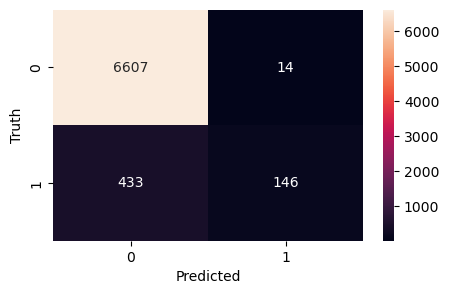

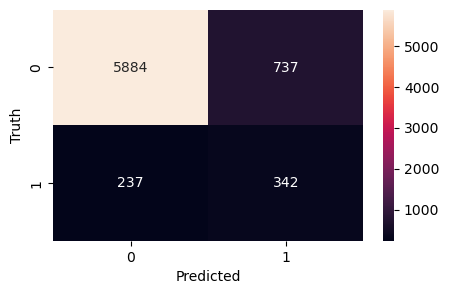

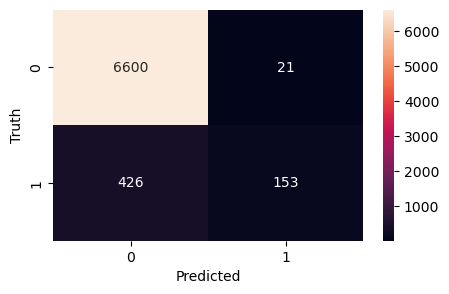

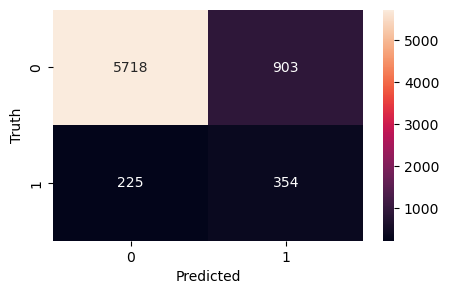

In [79]:
# test model

for i in range(2):
    if i==0:
        X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
        for param in lgbm_param_list:
            print("파생변수 미사용")
            print(param)
            test_model(param)
        
    elif i==1:
        for param in lgbm_adj_param_list:
            print("파생변수 사용")
            print(param)
            test_model(param) 

#### 주요변수 셀랙후 진행

Model: lgbm
Accuracy: 0.9379166666666666
Precision: 0.9074074074074074
Recall: 0.2538860103626943
F1-Score: 0.3967611336032389
AUC-ROC: 0.8485141352982959



Text(33.22222222222222, 0.5, 'Truth')

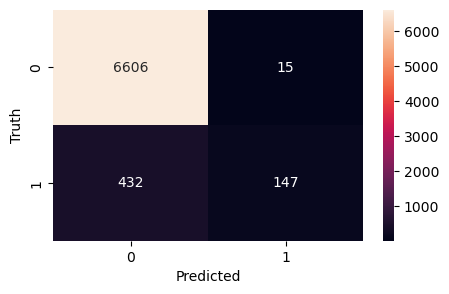

In [80]:

best_params= lgbm_parm_total_list[0][0]
lgbm_model=LGBMClassifier(verbose=-1,**best_params)
lgbm_model.fit(X_train,y_train)

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': lgbm_model.feature_importances_})
# Importance 순으로 정렬
feature_importances = feature_importances.sort_values('importance', ascending=False)

# 상위 N개의 중요한 특성 선택 (예: 상위 45)
top_n_features = feature_importances['feature'][:45]
top_n_features


# 선택된 특성만으로 새로운 train/valid set 생성 
X_train = X_train[top_n_features]
X_valid = X_valid[top_n_features]

# 선택된 특성으로 모델 재학습 
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_valid)
models = 'lgbm'
predictions = y_pred_lgbm


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()



cm = confusion_matrix(y_valid, y_pred_lgbm)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


[I 2023-09-23 12:57:21,387] A new study created in memory with name: no-name-7d157502-ce50-47fd-a9ac-267837db0758
[I 2023-09-23 12:57:22,152] Trial 0 finished with value: 0.7668018152322685 and parameters: {'n_estimators': 357, 'learning_rate': 0.15513971668875826, 'max_depth': 1, 'num_leaves': 50, 'min_child_samples': 7, 'min_child_weight': 7.037884732131615e-05, 'subsample': 0.7510118566190587, 'colsample_bytree': 0.7049651456817817, 'reg_alpha': 5.327654439517004e-08, 'reg_lambda': 0.00328437417607188}. Best is trial 0 with value: 0.7668018152322685.
[I 2023-09-23 12:57:23,052] Trial 1 finished with value: 0.8440070962778974 and parameters: {'n_estimators': 162, 'learning_rate': 0.05501721438029334, 'max_depth': 4, 'num_leaves': 180, 'min_child_samples': 171, 'min_child_weight': 1.0017673936824586e-05, 'subsample': 0.7765419860599674, 'colsample_bytree': 0.8955908769663072, 'reg_alpha': 0.013111557044676064, 'reg_lambda': 0.009052949010440233}. Best is trial 1 with value: 0.84400709

Best parameters: {'n_estimators': 261, 'learning_rate': 0.046994770086894684, 'max_depth': 7, 'num_leaves': 71, 'min_child_samples': 191, 'min_child_weight': 0.0019993124256762486, 'subsample': 0.9626816525447806, 'colsample_bytree': 0.7810872217154903, 'reg_alpha': 1.5380677931315214e-07, 'reg_lambda': 6.188996724496079e-07}
Best score: 0.8507293092397951
Best parameters: {'objective': 'binary', 'num_leaves': 25, 'n_estimators': 200, 'min_child_samples': 45, 'max_depth': -1, 'learning_rate': 0.05, 'is_unbalance': True}
Best score: 0.83969279241637
주요변수만 사용
{'n_estimators': 261, 'learning_rate': 0.046994770086894684, 'max_depth': 7, 'num_leaves': 71, 'min_child_samples': 191, 'min_child_weight': 0.0019993124256762486, 'subsample': 0.9626816525447806, 'colsample_bytree': 0.7810872217154903, 'reg_alpha': 1.5380677931315214e-07, 'reg_lambda': 6.188996724496079e-07}
Model: lgbm
Accuracy: 0.9379166666666666
Precision: 0.9285714285714286
Recall: 0.2469775474956822
F1-Score: 0.390177353342428

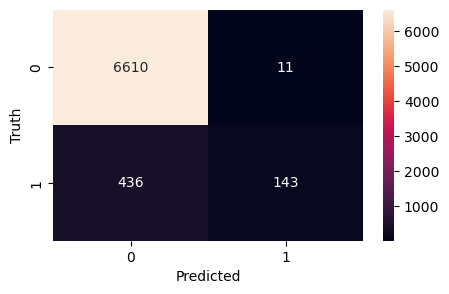

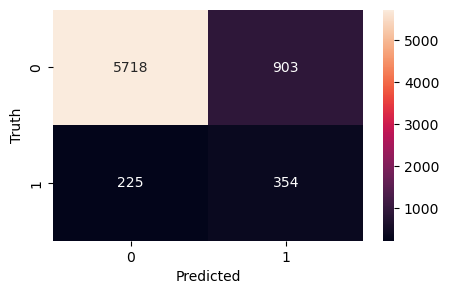

In [81]:
lgbm_param_list_importance_feautre=[]
Bayesian_param = Bayesian_Optimization_func()
Randomsearch_param = random_search_func()
lgbm_param_list_importance_feautre.append(Bayesian_param)
lgbm_param_list_importance_feautre.append(Randomsearch_param)

for param in lgbm_param_list_importance_feautre:
    print("주요변수만 사용")
    print(param)
    test_model(param)


### 4-5 Grandient Boosting(GB) 방식 <a id="s-4.5">

In [38]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

y_pred_gb = gb_model.predict(X_valid)
models = 'gb'
predictions = y_pred_gb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

Model: gb
Accuracy: 0.9341666666666667
Precision: 0.9007633587786259
Recall: 0.20379965457685664
F1-Score: 0.3323943661971831
AUC-ROC: 0.8191099967419309



### 4-5-1 GB Tunning : Random Search을 사용한 Best Parameter 탐색<a id="s-4.5.1">

In [40]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 150, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7 ,9],
    'min_samples_split': [2 ,4 ,6 ,8 ,10],
    'min_samples_leaf' : [1 ,2 ,3 ,4],
    'subsample' : [0.6, 0.7, 0.8, 0.85, 0.9], 
    
}

gb_model = GradientBoostingClassifier(random_state=42)

# Use stratified k-fold cross-validation for better generalization
cv = StratifiedKFold(n_splits=5)

# Use randomized search over the parameter grid (more efficient than exhaustive grid search)
random_search = RandomizedSearchCV(gb_model,
                                   param_distributions=param_grid,
                                   n_iter=30,
                                   scoring='roc_auc',
                                   cv=cv,
                                   random_state=42)
# Fit it to your data and find optimal hyperparameters
random_search.fit(X_train,y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator found by random search for prediction 
y_pred_gb = random_search.best_estimator_.predict(X_valid)



Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.02}
Best score: 0.8404961378153226


### 4-5-2 GB Tunning : Bayesian Optimization을 사용한 Best Parameter 탐색 <a id="s-4.5.2">

In [43]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define the objective function to be optimized
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf',1 ,10), 
        'subsample': trial.suggest_uniform('subsample',0.3 ,1.0), 
    }
    
    model = GradientBoostingClassifier(random_state=42 ,**params)
    model.fit(X_train,y_train)
    
    y_pred = model.predict_proba(X_valid)[:,1]
    
    return roc_auc_score(y_valid,y_pred)

# Initialize a study object
study = optuna.create_study(direction='maximize')

# Optimize the study (this could take some time depending on how many evaluations we do)
study.optimize(objective,n_trials=1)

print(f"Best parameters: {study.best_params}")
print(f"Best score: {study.best_value}")

# Use the best estimator found by Optuna for prediction 
best_params= study.best_params
gb_model_best=GradientBoostingClassifier(random_state=42,**best_params)
gb_model_best.fit(X_train,y_train)

y_pred_gb_optuna = gb_model_best.predict(X_valid)

[I 2023-09-24 08:34:16,490] A new study created in memory with name: no-name-d560c469-46db-490f-852a-02f7a529f036
[I 2023-09-24 08:34:50,614] Trial 0 finished with value: 0.8139403880310697 and parameters: {'n_estimators': 256, 'learning_rate': 0.0018798783900388846, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 7, 'subsample': 0.5649499331838539}. Best is trial 0 with value: 0.8139403880310697.


Best parameters: {'n_estimators': 256, 'learning_rate': 0.0018798783900388846, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 7, 'subsample': 0.5649499331838539}
Best score: 0.8139403880310697


#### Best parmeter 적용

- 파생변수 미적용
- 파생변수 적용

In [46]:
#X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 64
numeric_columns : 27
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'STD_CB_SCORE', 'MAX_CB_SCORE', 'CHILDREN_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT', 'DAYS_BIRTH_SQUARE']
categorical_columns : 36
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_fla

### 4-5-3 최종 auc 확인<a id="s-4.5.3">


In [47]:
# Use the best estimator found by Optuna for prediction 
# randomsearch
# best_params= {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}
best_params={'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.02}
# optuna
# best_params= {'n_estimators': 153, 'learning_rate': 0.07226568614896693, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2, 'subsample': 0.8224685258192438}

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(**best_params)
gb_model.fit(X_train,y_train)

y_pred_gb = gb_model.predict(X_valid)
models = 'gb'
predictions = y_pred_gb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()



cm = confusion_matrix(y_valid, y_pred_gb)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Model: gb
Accuracy: 0.9379166666666666
Precision: 0.94
Recall: 0.24352331606217617
F1-Score: 0.3868312757201646
AUC-ROC: 0.8412240427237457



NameError: name 'confusion_matrix' is not defined

수진추가

In [49]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 64
numeric_columns : 27
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'STD_CB_SCORE', 'MAX_CB_SCORE', 'CHILDREN_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT', 'DAYS_BIRTH_SQUARE']
categorical_columns : 36
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_fla

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

y_pred_gb = gb_model.predict(X_valid)
models = 'gb'
predictions = y_pred_gb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

Model: gb
Accuracy: 0.9348611111111111
Precision: 0.9166666666666666
Recall: 0.20898100172711573
F1-Score: 0.340365682137834
AUC-ROC: 0.8261158886559461



### random search

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7 ,9],
    'min_samples_split': [2 ,4 ,6 ,8 ,10],
    'min_samples_leaf' : [1 ,2 ,3 ,4],
    'subsample' : [0.6, 0.7, 0.8, 0.85, 0.9], 
    
}

gb_model = GradientBoostingClassifier(random_state=42)

# Use stratified k-fold cross-validation for better generalization
cv = StratifiedKFold(n_splits=5)

# Use randomized search over the parameter grid (more efficient than exhaustive grid search)
random_search = RandomizedSearchCV(gb_model,
                                   param_distributions=param_grid,
                                   n_iter=30,
                                   scoring='roc_auc',
                                   cv=cv,
                                   random_state=42)
# Fit it to your data and find optimal hyperparameters
random_search.fit(X_train,y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator found by random search for prediction 
y_pred_gb = random_search.best_estimator_.predict(X_valid)



### 4-6  XG Boosing(XGB) 방식<a id="s-4.6">

In [59]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a Gradient Boosting model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train,y_train)


y_pred_xgb = xgb_model.predict(X_valid)
models = 'xgb'
predictions = y_pred_xgb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

C:\Users\galaxy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: xgb
Accuracy: 0.9365277777777777
Precision: 0.8351648351648352
Recall: 0.26252158894645944
F1-Score: 0.39947437582128775
AUC-ROC: 0.8254121040004863



### 4-6-1 XGB Tunning : Random Search을 사용한 Best Parameter 탐색 <a id="s-4.6.1">

In [61]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1 ,2 ,4],
    'subsample': [0.8 ,1.0],
    'colsample_bytree' : [0.6 ,0.8 ,1.0]
}

xgb_model = XGBClassifier(random_state=42)

# Use stratified k-fold cross-validation for better generalization
cv = StratifiedKFold(n_splits=5)

# Use randomized search over the parameter grid (more efficient than exhaustive grid search)
random_search = RandomizedSearchCV(xgb_model,
                                   param_distributions=param_grid,
                                   n_iter=1,
                                   scoring='roc_auc',
                                   cv=cv,
                                   random_state=42)
# Fit it to your data and find optimal hyperparameters
random_search.fit(X_train,y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator found by random search for prediction 
y_pred_xgb_random = random_search.best_estimator_.predict(X_valid)

Best parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best score: 0.8419491230337804


### 4-6-2 XGB Tunning : Bayesian Optimization을 사용한 Best Parameter 탐색 <a id="s-4.6.2">

In [66]:

# # Define the objective function to be optimized
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_child_weight': trial.suggest_loguniform('min_child_weight',1e-3 ,1e2), 
#         'subsample' : trial.suggest_uniform('subsample',0.6 ,1.0), 
#         'colsample_bytree' :trial.suggest_uniform('colsample_bytree',0.6 ,1.0),
#         'scale_pos_weight' : trial.suggest_float("scale_pos_weight", 1, 10)
#     }
    
#     model = XGBClassifier(random_state=42,**params)
#     model.fit(X_train,y_train)
    
#     y_pred = model.predict_proba(X_valid)[:,1]
    
#     return roc_auc_score(y_valid,y_pred)

# # Initialize a study object
# study = optuna.create_study(direction='maximize')

# # Optimize the study (this could take some time depending on how many evaluations we do)
# study.optimize(objective,n_trials=100)

# print(f"Best parameters: {study.best_params}")
# print(f"Best score: {study.best_value}")

# # Use the best estimator found by Optuna for prediction 
# best_params= study.best_params
# xgb_model_best=XGBClassifier(random_state=42,**best_params)
# xgb_model_best.fit(X_train,y_train)

# y_pred_xgb_optuna = xgb_model_best.predict(X_valid)

#### Best parmeter 적용

- 파생변수 미적용
- 파생변수 적용 

In [70]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
#X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

### 4-6-3 최종 auc 확인<a id="s-4.6.3">

C:\Users\galaxy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: xgb
Accuracy: 0.9195833333333333
Precision: 0.5
Recall: 0.36787564766839376
F1-Score: 0.42388059701492536
AUC-ROC: 0.8454892698925462



Text(33.22222222222222, 0.5, 'Truth')

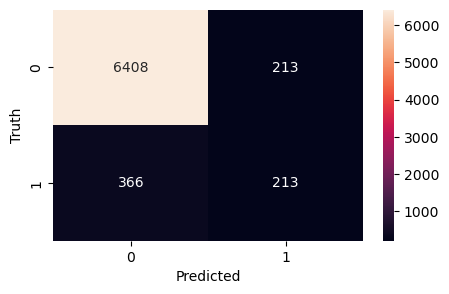

In [75]:
# Use the best estimator found by Optuna for prediction 
# randomsearch
#best_params= {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
# optuna
best_params= {'n_estimators': 258, 'learning_rate': 0.031968707036049, 'max_depth': 7, 'min_child_weight': 0.00463655506257617, 'subsample': 0.7079895906282183, 'colsample_bytree': 0.725007840678986, 'scale_pos_weight': 6.384854289063748}


# Train a Gradient Boosting model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',**best_params)
xgb_model.fit(X_train,y_train)


y_pred_xgb = xgb_model.predict(X_valid)
models = 'xgb'
predictions = y_pred_xgb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()
cm = confusion_matrix(y_valid, y_pred_xgb)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')    

### 4-7  Random Forest(RF) 방식<a id="s-4.7">

In [76]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a rF model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train,y_train)

y_pred_rf = random_forest_model.predict(X_valid)
models = 'Random forest'
predictions = y_pred_rf


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

Model: Random forest
Accuracy: 0.9294444444444444
Precision: 1.0
Recall: 0.1226252158894646
F1-Score: 0.21846153846153848
AUC-ROC: 0.7807886874833543



### 4-7-1 RF Tunning : Random Search을 사용한 Best Parameter 탐색 <a id="s-4.7.1">

In [78]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1 ,2 ,4],
    'max_features': ['auto', 'sqrt'],
    'class_weight' : ['balanced', None],
}

rf_model = RandomForestClassifier(random_state=42)

# Use stratified k-fold cross-validation for better generalization
cv = StratifiedKFold(n_splits=5)

# Use randomized search over the parameter grid (more efficient than exhaustive grid search)
random_search = RandomizedSearchCV(rf_model,
                                   param_distributions=param_grid,
                                   n_iter=30,
                                   scoring='roc_auc',
                                   cv=cv,
                                   random_state=42)
# Fit it to your data and find optimal hyperparameters
random_search.fit(X_train,y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator found by random search for prediction 
y_pred_rf_random = random_search.best_estimator_.predict(X_valid)

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 7, 'class_weight': None}
Best score: 0.8152254466885651


### 4-7-2 RF Tunning : Bayesian Optimization을 사용한 Best Parameter 탐색 <a id="s-4.7.2">

In [79]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define the objective function to be optimized
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1 ,10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt']),
        'class_weight' : trial.suggest_categorical("class_weight", [None, "balanced"])
    }
    
    model = RandomForestClassifier(random_state=42,**params)
    model.fit(X_train,y_train)
    
    y_pred = model.predict_proba(X_valid)[:,1]
    
    return roc_auc_score(y_valid,y_pred)

# Initialize a study object
study = optuna.create_study(direction='maximize')

# Optimize the study (this could take some time depending on how many evaluations we do)
study.optimize(objective,n_trials=1)

print(f"Best parameters: {study.best_params}")
print(f"Best score: {study.best_value}")

# Use the best estimator found by Optuna for prediction 
best_params= study.best_params
rf_model_best=RandomForestClassifier(random_state=42,**best_params)
rf_model_best.fit(X_train,y_train)

y_pred_rf_optuna = rf_model_best.predict(X_valid)

[I 2023-09-21 22:27:12,474] A new study created in memory with name: no-name-8ca25507-7d3c-4c78-b319-f86b88c86e28
[I 2023-09-21 22:27:28,754] Trial 0 finished with value: 0.7994443283643216 and parameters: {'n_estimators': 387, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': None}. Best is trial 0 with value: 0.7994443283643216.


Best parameters: {'n_estimators': 387, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': None}
Best score: 0.7994443283643216


#### Best parmeter 적용

- 파생변수 미적용
- 파생변수 적용 

In [80]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
#X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

### 4-7-3 최종 auc 확인<a id="s-4.7.3">

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model: Random forest
Accuracy: 0.8875
Precision: 0.3445491251682369
Recall: 0.4421416234887737
F1-Score: 0.38729198184568836
AUC-ROC: 0.8170225109356606



Text(33.22222222222222, 0.5, 'Truth')

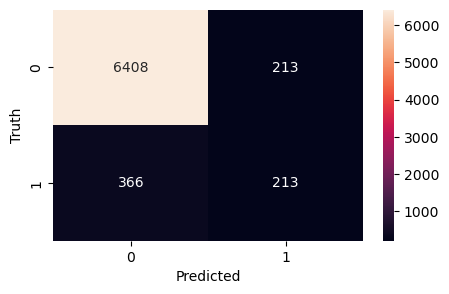

In [82]:
# Use the best estimator found by Optuna for prediction 
# randomsearch
best_params= {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 7, 'class_weight': None}
# optuna
best_params= {'n_estimators': 490, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'class_weight': 'balanced'}


# Train a rF model
random_forest_model = RandomForestClassifier(**best_params)
random_forest_model.fit(X_train,y_train)

y_pred_rf = random_forest_model.predict(X_valid)
models = 'Random forest'
predictions = y_pred_rf


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()
    
cm = confusion_matrix(y_valid, y_pred_xgb)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')    